DA6401 Assignment-1

NAME: MOUSINA BARMAN

ROLL: MA23M011



wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ma23m011 (ma23m011-iit-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


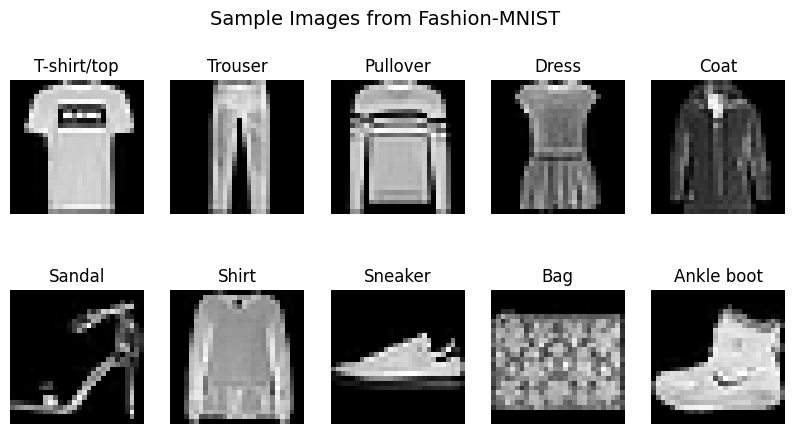

In [1]:
#For niumerical operation import numpy
import numpy as np
#For visualization import Matplotlib
import matplotlib.pyplot as plt
#For logging import Weights & Biases
import wandb
#import for fashion-mnist dataset from keras
from keras.datasets import fashion_mnist

# Initialize wandb for logging
wandb.init(project="DA6401_Assignment1_ma23m011", name="sample-images-1")

# Load fashion-mnist dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Class labels define based on fashion-mnist categories
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

#Initialize empty list to store sample  image and their labels
sample_images = []
sample_labels = []

#use for loop to add sample image and their class
for class_id in range(10):
    idx = np.where(y_train == class_id)[0][0] # Find the first index where y_train and class label equal
    sample_images.append(x_train[idx]) # Add the image to the list
    sample_labels.append(class_labels[class_id]) # Add the label to the list

# With caption log images to wandb
wandb.log({"Sample Images": [wandb.Image(img, caption=label) for img, label in zip(sample_images, sample_labels)]})


fig, axes = plt.subplots(2, 5, figsize=(10, 5)) # plot 2x5 grid image
fig.suptitle("Sample Images from Fashion-MNIST", fontsize=14)# Add a title

# Plot each image in the grid
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i], cmap='gray') # Display image in grayscale
    ax.set_title(sample_labels[i]) # Set the title as the class label
    ax.axis("off") # Hide axes

# Show the plotted images
plt.show()

# Finish the wandb logging run
wandb.finish()


In [2]:
#bad dite habe
import numpy as np
#import for fashion-mnist dataset from keras
from keras.datasets import fashion_mnist

# Load fashion-mnist dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize  0 to 1 pixel values and flatten images convert 1D vector
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# From training dataset 60000 sample images create validation set
x_val = x_train[54000:]
y_val = y_train[54000:]

# For training using 54000 images
x_train = x_train[:54000]
y_train = y_train[:54000]

# Convert labels into one-hot encoding
def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((y.size, num_classes))# Create a zero matrix
    one_hot[np.arange(y.size), y] = 1 # Set the corresponding class index to 1
    return one_hot # Return the one-hot encoded matrix

#training,test and validation labels apply one hot encoding
y_train = one_hot_encode(y_train)
y_val = one_hot_encode(y_val)
y_test = one_hot_encode(y_test)

#Define Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size=784, hidden_layers=[128, 64], output_size=10,
                 learning_rate=0.01, optimizer="sgd", weight_init="random",
                 activation="sigmoid", weight_decay=0.0):
        #initialize parameters for feedforward neural network
        self.layers = [input_size] + hidden_layers + [output_size] #layer size
        self.learning_rate = learning_rate #learning rate
        self.optimizer = optimizer #optimizer type
        self.weight_init = weight_init # weight initialization method
        self.activation = activation #activation function
        self.weight_decay = weight_decay # L2 regularization factor
        self.init_weights() # Initialize weights and biases


        # Optimizer-specific variables
        self.momentum = 0.9#Momentum
        self.beta1 = 0.9  # Adam/Nadam
        self.beta2 = 0.999 #Adam/Nadam
        self.epsilon = 1e-8 # Small value to prevent division by zero
        self.t = 0  # Time step

        # Momentum/Nesterov
        self.velocity = [np.zeros_like(w) for w in self.weights]  # For weights
        self.velocity_bias = [np.zeros_like(b) for b in self.biases]  #  For biases

        # RMSprop
        self.squared_grads = [np.zeros_like(w) for w in self.weights]  # For weights
        self.squared_grads_bias = [np.zeros_like(b) for b in self.biases]  #  For biases

        # Adam/Nadam
        self.m = [np.zeros_like(w) for w in self.weights]  # First moment estimate of weights
        self.v = [np.zeros_like(w) for w in self.weights]  # Second moment estimate of weights
        self.m_bias = [np.zeros_like(b) for b in self.biases]  #  First moment estimate of biases
        self.v_bias = [np.zeros_like(b) for b in self.biases]  #  Second moment estimate of biases

    def init_weights(self):
        # Initialize weights and biases
        self.weights = [] #Empty list define to store weight matrix
        self.biases = [] #Empty list define to store bias vector
        #loop use for random and xavier initialization
        for i in range(len(self.layers) - 1): # Loop through layers
            if self.weight_init == "random": # Random initialization
                self.weights.append(np.random.randn(self.layers[i], self.layers[i+1]) * 0.01)
            elif self.weight_init == "xavier": # Xavier initialization
                self.weights.append(np.random.randn(self.layers[i], self.layers[i+1]) * np.sqrt(1 / self.layers[i]))
            self.biases.append(np.zeros((1, self.layers[i+1]))) # Initialize biases to zero

    # Calculate activation function value based user expectation.
    def activation_function(self, z):
        if self.activation == "sigmoid":
            return 1 / (1 + np.exp(-np.clip(z, -10, 10))) # Sigmoid function
        elif self.activation == "tanh":
            return np.tanh(z)  # Tanh function
        elif self.activation == "relu":
            return np.maximum(0, z) # ReLU function

    #calculate activation function derivative
    def activation_derivative(self, a):
        if self.activation == "sigmoid":
            return a * (1 - a)   # Sigmoid derivative
        elif self.activation == "tanh":
            return 1 - a**2   # Tanh derivative
        elif self.activation == "relu":
            return (a > 0).astype(float) # ReLU derivative

    #For output layer calculate softmax function value
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) # Prevent overflow
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)  # Normalize values

    #Forward propagation
    def forward(self, X):
        #store each layer activation value
        activations = [X]
        #store weighted sum value
        z_values = []

         #Use for loop for calculate weighted sum and  apply activation function
        for i in range(len(self.weights) - 1):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i] # Compute weighted sum
            z_values.append(z)  # Store weighted sum value
            activations.append(self.activation_function(z)) # Apply activation function

        #Final layer computation using softmax function
        z_out = np.dot(activations[-1], self.weights[-1]) + self.biases[-1] # Final layer computation
        z_values.append(z_out) #store final layer computation values
        activations.append(self.softmax(z_out)) # Apply softmax
        return activations, z_values #  all activations and z values

    #Cross entropy loss computation with L2 ragularization
    def compute_loss(self, y_true, y_pred):
        #cross entropy loss
        loss = -np.sum(y_true * np.log(y_pred + self.epsilon)) / y_true.shape[0]
        #L2 regularization
        l2_penalty = self.weight_decay * sum(np.sum(w**2) for w in self.weights) / 2
        return loss + l2_penalty # Total loss

    #Compute accuracy by comparing true vs predicted labels.
    def compute_accuracy(self, y_true, y_pred):
        correct_predictions = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1)) # Count correct predictions
        return correct_predictions / y_true.shape[0] # Compute accuracy

     #Use backpropagation to calculate gradients.
    def backward(self, X, y_true, activations, z_values):
        gradients_w = [np.zeros_like(w) for w in self.weights]  # Initialize gradients for weights with zeros
        gradients_b = [np.zeros_like(b) for b in self.biases]  # Initialize gradients for biases with zeros

        #Compute output layer gradient
        dL_dz = activations[-1] - y_true # for loss
        gradients_w[-1] = np.dot(activations[-2].T, dL_dz) + self.weight_decay * self.weights[-1] #for weight
        gradients_b[-1] = np.sum(dL_dz, axis=0, keepdims=True)  #for bias

        # Compute Hidden layers gradient
        for i in reversed(range(len(self.weights) - 1)):
            dL_dz = np.dot(dL_dz, self.weights[i+1].T) * self.activation_derivative(activations[i+1]) #for loss
            gradients_w[i] = np.dot(activations[i].T, dL_dz) + self.weight_decay * self.weights[i] #for weight
            gradients_b[i] = np.sum(dL_dz, axis=0, keepdims=True) #for bias

        return gradients_w, gradients_b #return weight and bias

    # Apply gradient updates using different optimizers.
    def update_weights(self, gradients_w, gradients_b):
        """ Apply gradient updates using different optimizers. """
        self.t += 1  # Update time step for Adam/Nadam

        for i in range(len(self.weights)):
            if self.optimizer == "sgd":
                self.weights[i] -= self.learning_rate * gradients_w[i]
                self.biases[i] -= self.learning_rate * gradients_b[i]

            elif self.optimizer == "momentum":
                self.velocity[i] = self.momentum * self.velocity[i] - self.learning_rate * gradients_w[i]
                self.weights[i] += self.velocity[i]
                self.biases[i] -= self.learning_rate * gradients_b[i]

            elif self.optimizer == "nesterov":
                # Compute lookahead update for weights
                temp_weights = self.weights[i] + self.momentum * self.velocity[i]
                temp_biases = self.biases[i] + self.momentum * self.velocity_bias[i]

                # Compute velocity update
                self.velocity[i] = self.momentum * self.velocity[i] - self.learning_rate * gradients_w[i]
                self.velocity_bias[i] = self.momentum * self.velocity_bias[i] - self.learning_rate * gradients_b[i]

                # Apply Nesterov update
                self.weights[i] = temp_weights + self.velocity[i]
                self.biases[i] = temp_biases + self.velocity_bias[i]

            elif self.optimizer == "rmsprop":
                # Update squared gradients for weights
                self.squared_grads[i] = 0.9 * self.squared_grads[i] + 0.1 * (gradients_w[i] ** 2)
                self.weights[i] -= self.learning_rate * gradients_w[i] / (np.sqrt(self.squared_grads[i]) + self.epsilon)

                # Update squared gradients for biases
                self.squared_grads_bias[i] = 0.9 * self.squared_grads_bias[i] + 0.1 * (gradients_b[i] ** 2)
                self.biases[i] -= self.learning_rate * gradients_b[i] / (np.sqrt(self.squared_grads_bias[i]) + self.epsilon)

            elif self.optimizer == "adam":
                # Update biased first moment estimate (momentum) for weights
                self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * gradients_w[i]
                self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (gradients_w[i] ** 2)

                # Bias correction for weights
                m_hat = self.m[i] / (1 - self.beta1 ** self.t)
                v_hat = self.v[i] / (1 - self.beta2 ** self.t)

                # Weight update
                self.weights[i] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

                # Update biased first moment estimate (momentum) for biases
                self.m_bias[i] = self.beta1 * self.m_bias[i] + (1 - self.beta1) * gradients_b[i]
                self.v_bias[i] = self.beta2 * self.v_bias[i] + (1 - self.beta2) * (gradients_b[i] ** 2)

                # Bias correction for biases
                m_hat_bias = self.m_bias[i] / (1 - self.beta1 ** self.t)
                v_hat_bias = self.v_bias[i] / (1 - self.beta2 ** self.t)

                #  Bias update
                self.biases[i] -= self.learning_rate * m_hat_bias / (np.sqrt(v_hat_bias) + self.epsilon)

            elif self.optimizer == "nadam":
                #  Compute momentum update for weights
                self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * gradients_w[i]
                self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (gradients_w[i] ** 2)

                #  Bias correction for weights
                m_hat = self.m[i] / (1 - self.beta1 ** self.t)
                v_hat = self.v[i] / (1 - self.beta2 ** self.t)

                #  Weight update with Nadam formula
                self.weights[i] -= self.learning_rate * (self.momentum * m_hat + (1 - self.momentum) * gradients_w[i]) / (np.sqrt(v_hat) + self.epsilon)

                #  Compute momentum update for biases
                self.m_bias[i] = self.beta1 * self.m_bias[i] + (1 - self.beta1) * gradients_b[i]
                self.v_bias[i] = self.beta2 * self.v_bias[i] + (1 - self.beta2) * (gradients_b[i] ** 2)

                #  Bias correction for biases
                m_hat_bias = self.m_bias[i] / (1 - self.beta1 ** self.t)
                v_hat_bias = self.v_bias[i] / (1 - self.beta2 ** self.t)

                #  Bias update with Nadam formula
                self.biases[i] -= self.learning_rate * (self.momentum * m_hat_bias + (1 - self.momentum) * gradients_b[i]) / (np.sqrt(v_hat_bias) + self.epsilon)
    def train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
        #Train nural network using mini-batch gradient descent.
        num_samples = X_train.shape[0] # number of samples

        #use for loop for shuffle training data
        for epoch in range(epochs): # Loop through epochs
            indices = np.arange(num_samples) # Create index array
            np.random.shuffle(indices) # Shuffle data
            X_train, y_train = X_train[indices], y_train[indices] # Shuffle training data

            # Mini-batch training
            for i in range(0, num_samples, batch_size):# Loop through batches
                X_batch = X_train[i:i + batch_size] # batch inputs
                y_batch = y_train[i:i + batch_size] # batch labels

                #Use forward pass
                activations, z_values = self.forward(X_batch)

                # Compute gradients of weight and bias using backpropagation
                gradients_w, gradients_b = self.backward(X_batch, y_batch, activations, z_values)

                # Update weights and bias
                self.update_weights(gradients_w, gradients_b)

            # Compute training loss & accuracy
            train_activations, _ = self.forward(X_train)
            Train_loss = self.compute_loss(y_train, train_activations[-1])
            Train_accuracy = compute_accuracy(y_train, train_activations[-1])

            # Compute validation loss & accuracy
            val_activations, _ = self.forward(X_val)
            Val_loss = self.compute_loss(y_val, val_activations[-1])
            Val_accuracy = compute_accuracy(y_val, val_activations[-1])
            wandb.log({'Train_loss': Train_loss})
            wandb.log({'Train_accuracy': Train_accuracy })
            wandb.log({'epoch': epoch + 1})
            wandb.log({'Val_loss': Val_loss})
            wandb.log({'Val_accuracy': Val_accuracy })

            print(f"Epoch {epoch+1}: Train Loss = {Train_loss:.4f}, Train Acc = {Train_accuracy:.4f}, Val Loss = {Val_loss:.4f}, Val Acc = {Val_accuracy:.4f}")

def compute_accuracy(y_true, y_pred):
        #Compute accuracy by comparing true vs predicted labels.
        correct_predictions = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))
        accuracy = correct_predictions / y_true.shape[0]
        return accuracy*100

In [3]:
# Create a neural network with a flexible architecture
nn = NeuralNetwork(input_size=784, hidden_layers=[128, 64], output_size=10)

# Forward pass example
sample_input = x_train[:50]  # Take 5 sample images
# print(sample_input.shape)
output_probs = nn.forward(sample_input)[0]  # Get output probability distribution

# Print predictions
#print("Predicted class probabilities:\n", output_probs)
print("Predicted classes:", np.argmax(output_probs[3], axis=1))

Predicted classes: [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [4]:
# # Create Neural Network
# nn = NeuralNetwork(input_size=784, hidden_layers=[128, 64], output_size=10, learning_rate=0.01, optimizer="sgd", weight_init="xavier", activation="relu", weight_decay=0.0005)

# # Train the model and track accuracy
# nn.train(x_train, y_train, x_val, y_val, epochs=10, batch_size=32)


In [5]:
!pip install wandb

In [6]:
import wandb
import numpy as np
#For easy attribute access import SimpleNamespace
from types import SimpleNamespace
# import Random  for randomization
import random

In [7]:
key = input('Enter your API:')
wandb.login(key=key)

Enter your API:580e769ee2f34eafdded556ce52aaf31c265ad3b


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [8]:
# Define the sweep configuration
sweep_config = {
    'method': 'bayes',# Use Bayesian optimization
    'name' : 'sweep cross entropy-18', #sweep name
    'metric': {
      'name': 'Val_accuracy',
      'goal': 'maximize' # maximize validation accuracy
    },
    'parameters': {
        'epochs': {
            'values': [5,10] #number of training epoch
        },
        'hidden_layers':{
            'values':[3,4,5] #number of hidden layer
        },
         'hidden_size':{
            'values':[32,64,128] #hidden layer size
        },
        'weight_decay':{
            'values':[0, 0.0005, 0.5] # Regularization
        },
        'learning_rate': {
            'values': [1e-3, 1e-4] # Learning rate
        },
        'optimizer': {
            'values': ['rmsprop', 'nadam','adam', 'nag','mgd','sgd'] # Optimizers
        },
        'batch_size':{
            'values':[16,32,64] # Batch sizes for training
        },
        'weight_init': {
            'values': ['xavier','random'] # Weight initialization
        },
        'activation': {
            'values': ['relu','tanh','sigmoid'] # Activation function
        },
    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project='DA6401_Assignment1_ma23m011')

Create sweep with ID: zohaau1u
Sweep URL: https://wandb.ai/ma23m011-iit-madras/DA6401_Assignment1_ma23m011/sweeps/zohaau1u


In [9]:
def main():
    with wandb.init() as run:
      # Generate a unique run name based on the hyperparameters
        run_name="-ac_"+wandb.config.activation+"-hs_"+str(wandb.config.hidden_size)+"-epc_"+str(wandb.config.epochs)+"-hl_"+str(wandb.config.hidden_layers)+"-regu_"+str(wandb.config.weight_decay)+"-eta_"+str(wandb.config.learning_rate)+"-optmz_"+wandb.config.optimizer+"-batch_"+str(wandb.config.batch_size)+"-wght_"+wandb.config.weight_init
        wandb.run.name=run_name
        # Create a Neural Network with the selected hyperparameters
        nn = NeuralNetwork(input_size=784, hidden_layers=[wandb.config.hidden_size] * wandb.config.hidden_layers, output_size=10, learning_rate=wandb.config.learning_rate, optimizer=wandb.config.optimizer, weight_init=wandb.config.weight_init, activation=wandb.config.activation, weight_decay=wandb.config.weight_decay)
        nn.train(x_train, y_train, x_val, y_val, epochs=wandb.config.epochs, batch_size=wandb.config.batch_size)


# # Create Neural Network
# nn = NeuralNetwork(input_size=784, hidden_layers=[128, 64], output_size=10, learning_rate=0.01, optimizer="sgd")

# # Train the model and track accuracy
# nn.train(x_train, y_train, x_val, y_val, epochs=10, batch_size=32)

wandb.agent(sweep_id, function=main,count=100) # calls main function for count number of times.
# Finish the W&B run
wandb.finish()

wandb: Agent Starting Run: bneg6zhx with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 2.1172, Train Acc = 19.8963, Val Loss = 2.1185, Val Acc = 19.5500
Epoch 2: Train Loss = 1.8535, Train Acc = 19.5407, Val Loss = 1.8559, Val Acc = 20.4833
Epoch 3: Train Loss = 1.8184, Train Acc = 22.1407, Val Loss = 1.8210, Val Acc = 23.1500
Epoch 4: Train Loss = 1.6943, Train Acc = 33.1889, Val Loss = 1.6967, Val Acc = 32.5167
Epoch 5: Train Loss = 1.5764, Train Acc = 40.1111, Val Loss = 1.5775, Val Acc = 39.7500


Train_accuracy,▁▁▂▆█
Train_loss,█▅▄▃▁
Val_accuracy,▁▁▂▅█
Val_loss,█▅▄▃▁
epoch,▁▃▅▆█
Train_accuracy,40.11111
Train_loss,1.5764
Val_accuracy,39.75
Val_loss,1.57748
epoch,5


wandb: Agent Starting Run: h2p2ubw4 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 2.0475, Train Acc = 22.9111, Val Loss = 2.0507, Val Acc = 22.0333
Epoch 2: Train Loss = 1.5411, Train Acc = 46.3111, Val Loss = 1.5375, Val Acc = 45.7833
Epoch 3: Train Loss = 1.2754, Train Acc = 58.2519, Val Loss = 1.2704, Val Acc = 58.2500
Epoch 4: Train Loss = 1.0580, Train Acc = 63.9315, Val Loss = 1.0540, Val Acc = 63.9500
Epoch 5: Train Loss = 0.9412, Train Acc = 67.7167, Val Loss = 0.9396, Val Acc = 67.8000
Epoch 6: Train Loss = 0.8731, Train Acc = 71.5574, Val Loss = 0.8722, Val Acc = 72.3167
Epoch 7: Train Loss = 0.8239, Train Acc = 74.7222, Val Loss = 0.8249, Val Acc = 74.9333
Epoch 8: Train Loss = 0.7861, Train Acc = 75.2981, Val Loss = 0.7901, Val Acc = 75.0333
Epoch 9: Train Loss = 0.7547, Train Acc = 78.2185, Val Loss = 0.7626, Val Acc = 77.6500
Epoch 10: Train Loss = 0.7179, Train Acc = 80.0315, Val Loss = 0.7241, Val Acc = 79.5000


Train_accuracy,▁▄▅▆▆▇▇▇██
Train_loss,█▅▄▃▂▂▂▁▁▁
Val_accuracy,▁▄▅▆▇▇▇▇██
Val_loss,█▅▄▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,80.03148
Train_loss,0.71794
Val_accuracy,79.5
Val_loss,0.72411
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: mx93jqkv with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.6851, Train Acc = 75.9648, Val Loss = 0.6816, Val Acc = 76.2000
Epoch 2: Train Loss = 0.5905, Train Acc = 79.1704, Val Loss = 0.5995, Val Acc = 79.5833
Epoch 3: Train Loss = 0.5059, Train Acc = 81.5481, Val Loss = 0.5213, Val Acc = 81.0167
Epoch 4: Train Loss = 0.4670, Train Acc = 83.5130, Val Loss = 0.4832, Val Acc = 83.0833
Epoch 5: Train Loss = 0.4156, Train Acc = 85.4148, Val Loss = 0.4394, Val Acc = 84.4500
Epoch 6: Train Loss = 0.4212, Train Acc = 85.3222, Val Loss = 0.4435, Val Acc = 84.4667
Epoch 7: Train Loss = 0.3781, Train Acc = 86.5963, Val Loss = 0.4097, Val Acc = 85.7333
Epoch 8: Train Loss = 0.3561, Train Acc = 87.5037, Val Loss = 0.3908, Val Acc = 85.6333
Epoch 9: Train Loss = 0.3520, Train Acc = 87.0352, Val Loss = 0.3985, Val Acc = 85.5500
Epoch 10: Train Loss = 0.3662, Train Acc = 86.7259, Val Loss = 0.4157, Val Acc = 85.3167


Train_accuracy,▁▃▄▆▇▇▇███
Train_loss,█▆▄▃▂▂▂▁▁▁
Val_accuracy,▁▃▅▆▇▇████
Val_loss,█▆▄▃▂▂▁▁▁▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,86.72593
Train_loss,0.36615
Val_accuracy,85.31667
Val_loss,0.41567
epoch,10


wandb: Agent Starting Run: j5cycfqe with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: mgd
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 2.3112, Train Acc = 8.9944, Val Loss = 2.3113, Val Acc = 8.7833
Epoch 2: Train Loss = 2.3112, Train Acc = 8.9944, Val Loss = 2.3113, Val Acc = 8.7833
Epoch 3: Train Loss = 2.3112, Train Acc = 8.9944, Val Loss = 2.3113, Val Acc = 8.7833
Epoch 4: Train Loss = 2.3112, Train Acc = 8.9944, Val Loss = 2.3113, Val Acc = 8.7833
Epoch 5: Train Loss = 2.3112, Train Acc = 8.9944, Val Loss = 2.3113, Val Acc = 8.7833
Epoch 6: Train Loss = 2.3112, Train Acc = 8.9944, Val Loss = 2.3113, Val Acc = 8.7833
Epoch 7: Train Loss = 2.3112, Train Acc = 8.9944, Val Loss = 2.3113, Val Acc = 8.7833
Epoch 8: Train Loss = 2.3112, Train Acc = 8.9944, Val Loss = 2.3113, Val Acc = 8.7833
Epoch 9: Train Loss = 2.3112, Train Acc = 8.9944, Val Loss = 2.3113, Val Acc = 8.7833
Epoch 10: Train Loss = 2.3112, Train Acc = 8.9944, Val Loss = 2.3113, Val Acc = 8.7833


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Train_loss,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,8.99444
Train_loss,2.31116
Val_accuracy,8.78333
Val_loss,2.31133
epoch,10


wandb: Agent Starting Run: svikyrt3 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.5297, Train Acc = 85.4130, Val Loss = 0.5370, Val Acc = 85.2333
Epoch 2: Train Loss = 0.5051, Train Acc = 87.1648, Val Loss = 0.5292, Val Acc = 85.9500
Epoch 3: Train Loss = 0.5561, Train Acc = 85.6537, Val Loss = 0.5886, Val Acc = 84.8833
Epoch 4: Train Loss = 0.5253, Train Acc = 88.1278, Val Loss = 0.5651, Val Acc = 87.0333
Epoch 5: Train Loss = 0.5282, Train Acc = 88.8000, Val Loss = 0.5850, Val Acc = 87.2500
Epoch 6: Train Loss = 0.5413, Train Acc = 89.1167, Val Loss = 0.5956, Val Acc = 87.3833
Epoch 7: Train Loss = 0.5517, Train Acc = 89.0037, Val Loss = 0.6167, Val Acc = 86.5333
Epoch 8: Train Loss = 0.5471, Train Acc = 90.1370, Val Loss = 0.6177, Val Acc = 87.6500
Epoch 9: Train Loss = 0.5582, Train Acc = 90.2185, Val Loss = 0.6442, Val Acc = 87.9667
Epoch 10: Train Loss = 0.5799, Train Acc = 90.2111, Val Loss = 0.6685, Val Acc = 87.3333


Train_accuracy,▁▄▁▅▆▆▆███
Train_loss,▃▁▆▃▃▄▅▅▆█
Val_accuracy,▂▃▁▆▆▇▅▇█▇
Val_loss,▁▁▄▃▄▄▅▅▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.21111
Train_loss,0.57989
Val_accuracy,87.33333
Val_loss,0.66849
epoch,10


wandb: Agent Starting Run: 7g1cvv45 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.9129, Train Acc = 62.9556, Val Loss = 0.9158, Val Acc = 63.2833
Epoch 2: Train Loss = 0.6128, Train Acc = 80.1333, Val Loss = 0.6282, Val Acc = 79.1333
Epoch 3: Train Loss = 0.5152, Train Acc = 85.5352, Val Loss = 0.5330, Val Acc = 84.6333
Epoch 4: Train Loss = 0.4838, Train Acc = 87.1519, Val Loss = 0.5169, Val Acc = 85.7667
Epoch 5: Train Loss = 0.4692, Train Acc = 88.1870, Val Loss = 0.5023, Val Acc = 86.4833
Epoch 6: Train Loss = 0.4713, Train Acc = 88.2981, Val Loss = 0.5115, Val Acc = 86.9667
Epoch 7: Train Loss = 0.4818, Train Acc = 88.1611, Val Loss = 0.5350, Val Acc = 86.2500
Epoch 8: Train Loss = 0.4759, Train Acc = 88.6870, Val Loss = 0.5269, Val Acc = 87.0000
Epoch 9: Train Loss = 0.4851, Train Acc = 88.6759, Val Loss = 0.5416, Val Acc = 87.0167
Epoch 10: Train Loss = 0.4910, Train Acc = 88.9259, Val Loss = 0.5526, Val Acc = 87.2667


Train_accuracy,▁▆▇███████
Train_loss,█▃▂▁▁▁▁▁▁▁
Val_accuracy,▁▆▇███████
Val_loss,█▃▂▁▁▁▂▁▂▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.92593
Train_loss,0.49104
Val_accuracy,87.26667
Val_loss,0.55261
epoch,10


wandb: Agent Starting Run: hmnx6dx7 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.4079, Train Acc = 41.8315, Val Loss = 1.4072, Val Acc = 42.2167
Epoch 2: Train Loss = 1.1573, Train Acc = 65.4852, Val Loss = 1.1634, Val Acc = 66.3500
Epoch 3: Train Loss = 1.0669, Train Acc = 73.0278, Val Loss = 1.0722, Val Acc = 73.5500
Epoch 4: Train Loss = 1.0075, Train Acc = 79.6889, Val Loss = 1.0208, Val Acc = 79.9833
Epoch 5: Train Loss = 0.9605, Train Acc = 84.5463, Val Loss = 0.9765, Val Acc = 84.0667
Epoch 6: Train Loss = 0.9399, Train Acc = 86.9870, Val Loss = 0.9700, Val Acc = 85.8833
Epoch 7: Train Loss = 0.9574, Train Acc = 87.1074, Val Loss = 0.9976, Val Acc = 85.5167
Epoch 8: Train Loss = 0.9697, Train Acc = 87.5704, Val Loss = 1.0144, Val Acc = 85.8333
Epoch 9: Train Loss = 0.9726, Train Acc = 88.2630, Val Loss = 1.0167, Val Acc = 86.8833
Epoch 10: Train Loss = 0.9847, Train Acc = 88.6556, Val Loss = 1.0341, Val Acc = 87.2500


Train_accuracy,▁▅▆▇▇█████
Train_loss,█▄▃▂▁▁▁▁▁▂
Val_accuracy,▁▅▆▇██████
Val_loss,█▄▃▂▁▁▁▂▂▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.65556
Train_loss,0.98474
Val_accuracy,87.25
Val_loss,1.03405
epoch,10


wandb: Agent Starting Run: iqux9u10 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.2886, Train Acc = 19.9981, Val Loss = 2.2890, Val Acc = 19.5000
Epoch 2: Train Loss = 1.8457, Train Acc = 20.0963, Val Loss = 1.8477, Val Acc = 18.6667
Epoch 3: Train Loss = 1.7728, Train Acc = 20.4167, Val Loss = 1.7749, Val Acc = 20.5500
Epoch 4: Train Loss = 1.7533, Train Acc = 20.3833, Val Loss = 1.7563, Val Acc = 19.5833
Epoch 5: Train Loss = 1.7388, Train Acc = 21.7667, Val Loss = 1.7405, Val Acc = 21.3000
Epoch 6: Train Loss = 1.6654, Train Acc = 31.5000, Val Loss = 1.6661, Val Acc = 31.1500
Epoch 7: Train Loss = 1.6133, Train Acc = 31.1907, Val Loss = 1.6155, Val Acc = 30.4333
Epoch 8: Train Loss = 1.5941, Train Acc = 36.1759, Val Loss = 1.5955, Val Acc = 35.6833
Epoch 9: Train Loss = 1.5780, Train Acc = 36.9481, Val Loss = 1.5802, Val Acc = 37.1167
Epoch 10: Train Loss = 1.4931, Train Acc = 39.4463, Val Loss = 1.4930, Val Acc = 38.6667


Train_accuracy,▁▁▁▁▂▅▅▇▇█
Train_loss,█▄▃▃▃▃▂▂▂▁
Val_accuracy,▁▁▂▁▂▅▅▇▇█
Val_loss,█▄▃▃▃▃▂▂▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,39.4463
Train_loss,1.4931
Val_accuracy,38.66667
Val_loss,1.49303
epoch,10


wandb: Agent Starting Run: s7vfisq8 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.1111, Train Acc = 67.3963, Val Loss = 1.1216, Val Acc = 67.5000
Epoch 2: Train Loss = 0.9786, Train Acc = 80.1130, Val Loss = 0.9927, Val Acc = 79.8833
Epoch 3: Train Loss = 0.9817, Train Acc = 82.0389, Val Loss = 0.9997, Val Acc = 82.2167
Epoch 4: Train Loss = 0.9734, Train Acc = 83.9722, Val Loss = 0.9996, Val Acc = 83.0167
Epoch 5: Train Loss = 1.0073, Train Acc = 84.2926, Val Loss = 1.0342, Val Acc = 82.8333
Epoch 6: Train Loss = 1.0046, Train Acc = 86.0778, Val Loss = 1.0432, Val Acc = 84.3833
Epoch 7: Train Loss = 1.0221, Train Acc = 86.6370, Val Loss = 1.0728, Val Acc = 84.5000
Epoch 8: Train Loss = 1.0386, Train Acc = 86.9296, Val Loss = 1.0928, Val Acc = 85.0833
Epoch 9: Train Loss = 1.0412, Train Acc = 88.0259, Val Loss = 1.1045, Val Acc = 85.8667
Epoch 10: Train Loss = 1.0583, Train Acc = 88.2463, Val Loss = 1.1238, Val Acc = 86.0167


Train_accuracy,▁▅▆▇▇▇▇███
Train_loss,█▁▁▁▃▃▃▄▄▅
Val_accuracy,▁▆▇▇▇▇▇███
Val_loss,█▁▁▁▃▄▅▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.2463
Train_loss,1.05826
Val_accuracy,86.01667
Val_loss,1.12385
epoch,10


wandb: Agent Starting Run: 372zmps2 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: mgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1: Train Loss = 3.8748, Train Acc = 9.9444, Val Loss = 3.8737, Val Acc = 10.5000
Epoch 2: Train Loss = 3.8748, Train Acc = 9.9444, Val Loss = 3.8737, Val Acc = 10.5000
Epoch 3: Train Loss = 3.8748, Train Acc = 9.9444, Val Loss = 3.8737, Val Acc = 10.5000
Epoch 4: Train Loss = 3.8748, Train Acc = 9.9444, Val Loss = 3.8737, Val Acc = 10.5000
Epoch 5: Train Loss = 3.8748, Train Acc = 9.9444, Val Loss = 3.8737, Val Acc = 10.5000
Epoch 6: Train Loss = 3.8748, Train Acc = 9.9444, Val Loss = 3.8737, Val Acc = 10.5000
Epoch 7: Train Loss = 3.8748, Train Acc = 9.9444, Val Loss = 3.8737, Val Acc = 10.5000
Epoch 8: Train Loss = 3.8748, Train Acc = 9.9444, Val Loss = 3.8737, Val Acc = 10.5000
Epoch 9: Train Loss = 3.8748, Train Acc = 9.9444, Val Loss = 3.8737, Val Acc = 10.5000
Epoch 10: Train Loss = 3.8748, Train Acc = 9.9444, Val Loss = 3.8737, Val Acc = 10.5000


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Train_loss,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.94444
Train_loss,3.87485
Val_accuracy,10.5
Val_loss,3.87371
epoch,10


wandb: Agent Starting Run: gi4kg3af with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 32.0680, Train Acc = 9.9704, Val Loss = 32.0678, Val Acc = 10.2667
Epoch 2: Train Loss = 15.7692, Train Acc = 10.0167, Val Loss = 15.7693, Val Acc = 9.8500
Epoch 3: Train Loss = 9.0293, Train Acc = 10.0167, Val Loss = 9.0298, Val Acc = 9.8500
Epoch 4: Train Loss = 6.1545, Train Acc = 10.0648, Val Loss = 6.1544, Val Acc = 9.4167
Epoch 5: Train Loss = 4.9060, Train Acc = 10.0167, Val Loss = 4.9059, Val Acc = 9.8500
Epoch 6: Train Loss = 4.3257, Train Acc = 10.0648, Val Loss = 4.3259, Val Acc = 9.4167
Epoch 7: Train Loss = 4.0186, Train Acc = 9.9963, Val Loss = 4.0191, Val Acc = 10.0333
Epoch 8: Train Loss = 3.8264, Train Acc = 10.0167, Val Loss = 3.8266, Val Acc = 9.8500
Epoch 9: Train Loss = 3.6877, Train Acc = 10.0833, Val Loss = 3.6886, Val Acc = 9.2500
Epoch 10: Train Loss = 3.5779, Train Acc = 9.9389, Val Loss = 3.5779, Val Acc = 10.5500


Train_accuracy,▃▅▅▇▅▇▄▅█▁
Train_loss,█▄▂▂▁▁▁▁▁▁
Val_accuracy,▆▄▄▂▄▂▅▄▁█
Val_loss,█▄▂▂▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.93889
Train_loss,3.57793
Val_accuracy,10.55
Val_loss,3.57786
epoch,10


wandb: Agent Starting Run: ez0c0qpz with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.0573, Train Acc = 52.9944, Val Loss = 1.0560, Val Acc = 53.1000
Epoch 2: Train Loss = 1.0163, Train Acc = 58.1778, Val Loss = 1.0207, Val Acc = 57.9167
Epoch 3: Train Loss = 0.9654, Train Acc = 61.8315, Val Loss = 0.9694, Val Acc = 61.7333
Epoch 4: Train Loss = 0.9250, Train Acc = 65.3481, Val Loss = 0.9237, Val Acc = 65.6333
Epoch 5: Train Loss = 0.8914, Train Acc = 68.9259, Val Loss = 0.8911, Val Acc = 69.5333
Epoch 6: Train Loss = 0.8203, Train Acc = 71.1648, Val Loss = 0.8254, Val Acc = 70.8000
Epoch 7: Train Loss = 0.7821, Train Acc = 74.6407, Val Loss = 0.7851, Val Acc = 75.2000
Epoch 8: Train Loss = 0.7601, Train Acc = 75.2222, Val Loss = 0.7595, Val Acc = 75.3667
Epoch 9: Train Loss = 0.7359, Train Acc = 76.2407, Val Loss = 0.7360, Val Acc = 76.4667
Epoch 10: Train Loss = 0.7350, Train Acc = 76.4463, Val Loss = 0.7395, Val Acc = 76.7167


Train_accuracy,▁▃▄▅▆▆▇███
Train_loss,█▇▆▅▄▃▂▂▁▁
Val_accuracy,▁▂▄▅▆▆████
Val_loss,█▇▆▅▄▃▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,76.4463
Train_loss,0.73497
Val_accuracy,76.71667
Val_loss,0.73952
epoch,10


wandb: Agent Starting Run: 3m5kypkq with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3361, Train Acc = 10.0833, Val Loss = 2.3368, Val Acc = 9.2500
Epoch 2: Train Loss = 2.3331, Train Acc = 10.0648, Val Loss = 2.3335, Val Acc = 9.4167
Epoch 3: Train Loss = 2.3324, Train Acc = 10.0167, Val Loss = 2.3334, Val Acc = 9.8500
Epoch 4: Train Loss = 2.3326, Train Acc = 9.9648, Val Loss = 2.3331, Val Acc = 10.3167
Epoch 5: Train Loss = 2.3336, Train Acc = 10.0296, Val Loss = 2.3337, Val Acc = 9.7333
Epoch 6: Train Loss = 2.3344, Train Acc = 10.0833, Val Loss = 2.3354, Val Acc = 9.2500
Epoch 7: Train Loss = 2.3363, Train Acc = 10.0296, Val Loss = 2.3363, Val Acc = 9.7333
Epoch 8: Train Loss = 2.3380, Train Acc = 9.9963, Val Loss = 2.3383, Val Acc = 10.0333
Epoch 9: Train Loss = 2.3401, Train Acc = 10.0833, Val Loss = 2.3410, Val Acc = 9.2500
Epoch 10: Train Loss = 2.3406, Train Acc = 10.0167, Val Loss = 2.3409, Val Acc = 9.8500


Train_accuracy,█▇▄▁▅█▅▃█▄
Train_loss,▄▂▁▁▂▃▄▆██
Val_accuracy,▁▂▅█▄▁▄▆▁▅
Val_loss,▄▁▁▁▂▃▄▆██
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,10.01667
Train_loss,2.34057
Val_accuracy,9.85
Val_loss,2.34093
epoch,10


wandb: Agent Starting Run: e0dcukns with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.7882, Train Acc = 74.2611, Val Loss = 0.7966, Val Acc = 74.3500
Epoch 2: Train Loss = 0.5601, Train Acc = 83.1296, Val Loss = 0.5793, Val Acc = 82.8833
Epoch 3: Train Loss = 0.4989, Train Acc = 86.2315, Val Loss = 0.5206, Val Acc = 85.0500
Epoch 4: Train Loss = 0.4744, Train Acc = 87.7889, Val Loss = 0.5142, Val Acc = 86.1167
Epoch 5: Train Loss = 0.4850, Train Acc = 87.6981, Val Loss = 0.5181, Val Acc = 86.2000
Epoch 6: Train Loss = 0.4847, Train Acc = 88.3630, Val Loss = 0.5254, Val Acc = 86.8333
Epoch 7: Train Loss = 0.4892, Train Acc = 88.8204, Val Loss = 0.5395, Val Acc = 87.3667
Epoch 8: Train Loss = 0.4804, Train Acc = 89.5167, Val Loss = 0.5338, Val Acc = 87.5667
Epoch 9: Train Loss = 0.4813, Train Acc = 90.2204, Val Loss = 0.5403, Val Acc = 88.2167
Epoch 10: Train Loss = 0.5015, Train Acc = 89.9815, Val Loss = 0.5678, Val Acc = 87.8667


Train_accuracy,▁▅▆▇▇▇▇███
Train_loss,█▃▂▁▁▁▁▁▁▂
Val_accuracy,▁▅▆▇▇▇████
Val_loss,█▃▁▁▁▁▂▁▂▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.98148
Train_loss,0.50151
Val_accuracy,87.86667
Val_loss,0.56782
epoch,10


wandb: Agent Starting Run: 8cjv2i1q with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.6275, Train Acc = 78.8963, Val Loss = 0.6268, Val Acc = 79.2333
Epoch 2: Train Loss = 0.4749, Train Acc = 86.6037, Val Loss = 0.4977, Val Acc = 85.5500
Epoch 3: Train Loss = 0.4582, Train Acc = 87.6056, Val Loss = 0.4823, Val Acc = 86.7500
Epoch 4: Train Loss = 0.4678, Train Acc = 87.3556, Val Loss = 0.5095, Val Acc = 86.0167
Epoch 5: Train Loss = 0.4395, Train Acc = 89.3241, Val Loss = 0.4813, Val Acc = 87.6833
Epoch 6: Train Loss = 0.4482, Train Acc = 89.6204, Val Loss = 0.5110, Val Acc = 87.4333
Epoch 7: Train Loss = 0.4670, Train Acc = 89.3222, Val Loss = 0.5282, Val Acc = 87.1167
Epoch 8: Train Loss = 0.4596, Train Acc = 90.0796, Val Loss = 0.5203, Val Acc = 88.0333
Epoch 9: Train Loss = 0.4592, Train Acc = 90.7148, Val Loss = 0.5327, Val Acc = 88.1333
Epoch 10: Train Loss = 0.4888, Train Acc = 89.9667, Val Loss = 0.5683, Val Acc = 87.4333


Train_accuracy,▁▆▆▆▇▇▇███
Train_loss,█▂▂▂▁▁▂▂▂▃
Val_accuracy,▁▆▇▆█▇▇██▇
Val_loss,█▂▁▂▁▂▃▃▃▅
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.96667
Train_loss,0.48881
Val_accuracy,87.43333
Val_loss,0.56834
epoch,10


wandb: Agent Starting Run: f671pz0l with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.5690, Train Acc = 81.3481, Val Loss = 0.5820, Val Acc = 80.8667
Epoch 2: Train Loss = 0.5074, Train Acc = 85.6759, Val Loss = 0.5265, Val Acc = 84.5500
Epoch 3: Train Loss = 0.4858, Train Acc = 87.5444, Val Loss = 0.5182, Val Acc = 86.6500
Epoch 4: Train Loss = 0.4837, Train Acc = 88.3759, Val Loss = 0.5265, Val Acc = 87.0000
Epoch 5: Train Loss = 0.5227, Train Acc = 88.2611, Val Loss = 0.5715, Val Acc = 86.4500
Epoch 6: Train Loss = 0.5307, Train Acc = 89.0778, Val Loss = 0.5859, Val Acc = 87.1833
Epoch 7: Train Loss = 0.5391, Train Acc = 89.6148, Val Loss = 0.5971, Val Acc = 87.8167
Epoch 8: Train Loss = 0.5691, Train Acc = 89.7463, Val Loss = 0.6426, Val Acc = 87.3667
Epoch 9: Train Loss = 0.5925, Train Acc = 89.6685, Val Loss = 0.6659, Val Acc = 87.5000
Epoch 10: Train Loss = 0.6009, Train Acc = 90.3833, Val Loss = 0.6758, Val Acc = 88.2333


Train_accuracy,▁▄▆▆▆▇▇█▇█
Train_loss,▆▂▁▁▃▄▄▆▇█
Val_accuracy,▁▅▆▇▆▇█▇▇█
Val_loss,▄▁▁▁▃▄▅▇██
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.38333
Train_loss,0.60095
Val_accuracy,88.23333
Val_loss,0.67584
epoch,10


wandb: Agent Starting Run: caveotx0 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.3806, Train Acc = 59.1685, Val Loss = 1.3832, Val Acc = 58.5667
Epoch 2: Train Loss = 1.3010, Train Acc = 73.7000, Val Loss = 1.3076, Val Acc = 73.5833
Epoch 3: Train Loss = 1.3653, Train Acc = 77.5611, Val Loss = 1.3860, Val Acc = 77.9333
Epoch 4: Train Loss = 1.3610, Train Acc = 81.3074, Val Loss = 1.3902, Val Acc = 80.5500
Epoch 5: Train Loss = 1.4025, Train Acc = 82.8944, Val Loss = 1.4521, Val Acc = 81.5500
Epoch 6: Train Loss = 1.3907, Train Acc = 84.6852, Val Loss = 1.4390, Val Acc = 83.1000
Epoch 7: Train Loss = 1.3941, Train Acc = 86.0093, Val Loss = 1.4437, Val Acc = 84.2000
Epoch 8: Train Loss = 1.4181, Train Acc = 86.3722, Val Loss = 1.4693, Val Acc = 84.5000
Epoch 9: Train Loss = 1.4412, Train Acc = 86.6204, Val Loss = 1.5103, Val Acc = 84.2333
Epoch 10: Train Loss = 1.4220, Train Acc = 88.2611, Val Loss = 1.4864, Val Acc = 85.4000


Train_accuracy,▁▄▅▆▇▇▇███
Train_loss,▅▁▄▄▆▅▆▇█▇
Val_accuracy,▁▅▆▇▇▇████
Val_loss,▄▁▄▄▆▆▆▇█▇
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.26111
Train_loss,1.42199
Val_accuracy,85.4
Val_loss,1.48639
epoch,10


wandb: Agent Starting Run: 3fqq8mfa with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.7997, Train Acc = 28.4407, Val Loss = 1.8065, Val Acc = 27.9667
Epoch 2: Train Loss = 1.4770, Train Acc = 60.3981, Val Loss = 1.4770, Val Acc = 60.6000
Epoch 3: Train Loss = 1.2812, Train Acc = 71.5815, Val Loss = 1.2879, Val Acc = 71.8000
Epoch 4: Train Loss = 1.2343, Train Acc = 79.8926, Val Loss = 1.2523, Val Acc = 80.0667
Epoch 5: Train Loss = 1.2487, Train Acc = 81.5333, Val Loss = 1.2685, Val Acc = 81.5833
Epoch 6: Train Loss = 1.2975, Train Acc = 81.0444, Val Loss = 1.3218, Val Acc = 80.4000
Epoch 7: Train Loss = 1.2468, Train Acc = 86.2759, Val Loss = 1.2785, Val Acc = 85.0500
Epoch 8: Train Loss = 1.2577, Train Acc = 86.9222, Val Loss = 1.3018, Val Acc = 85.6000
Epoch 9: Train Loss = 1.2756, Train Acc = 87.4833, Val Loss = 1.3287, Val Acc = 85.6500
Epoch 10: Train Loss = 1.3170, Train Acc = 86.9685, Val Loss = 1.3720, Val Acc = 85.5000


Train_accuracy,▁▅▆▇▇▇████
Train_loss,█▄▂▁▁▂▁▁▂▂
Val_accuracy,▁▅▆▇█▇████
Val_loss,█▄▁▁▁▂▁▂▂▃
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,86.96852
Train_loss,1.31702
Val_accuracy,85.5
Val_loss,1.37199
epoch,10


wandb: Agent Starting Run: 287x3tya with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.3807, Train Acc = 42.4926, Val Loss = 1.3731, Val Acc = 42.9000
Epoch 2: Train Loss = 0.9026, Train Acc = 59.5148, Val Loss = 0.9092, Val Acc = 58.3000
Epoch 3: Train Loss = 0.7772, Train Acc = 65.1907, Val Loss = 0.7912, Val Acc = 65.5833
Epoch 4: Train Loss = 0.5675, Train Acc = 82.1093, Val Loss = 0.5894, Val Acc = 81.1000
Epoch 5: Train Loss = 0.4479, Train Acc = 85.3111, Val Loss = 0.4814, Val Acc = 83.9500
Epoch 6: Train Loss = 0.4220, Train Acc = 86.3574, Val Loss = 0.4552, Val Acc = 85.3000
Epoch 7: Train Loss = 0.4087, Train Acc = 86.4056, Val Loss = 0.4557, Val Acc = 84.7333
Epoch 8: Train Loss = 0.3677, Train Acc = 88.0870, Val Loss = 0.4269, Val Acc = 86.2000
Epoch 9: Train Loss = 0.3763, Train Acc = 87.3093, Val Loss = 0.4303, Val Acc = 85.6500
Epoch 10: Train Loss = 0.3399, Train Acc = 88.6574, Val Loss = 0.3942, Val Acc = 86.9333


Train_accuracy,▁▄▄▇▇█████
Train_loss,█▅▄▃▂▂▁▁▁▁
Val_accuracy,▁▃▅▇██████
Val_loss,█▅▄▂▂▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.65741
Train_loss,0.33987
Val_accuracy,86.93333
Val_loss,0.39422
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: fabfrexm with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3252, Train Acc = 10.0296, Val Loss = 2.3249, Val Acc = 9.7333
Epoch 2: Train Loss = 1.9910, Train Acc = 20.9463, Val Loss = 1.9871, Val Acc = 20.6333
Epoch 3: Train Loss = 1.7707, Train Acc = 33.0204, Val Loss = 1.7676, Val Acc = 32.6000
Epoch 4: Train Loss = 1.5608, Train Acc = 43.5463, Val Loss = 1.5562, Val Acc = 43.6333
Epoch 5: Train Loss = 1.3926, Train Acc = 54.9167, Val Loss = 1.3946, Val Acc = 54.5667
Epoch 6: Train Loss = 1.3468, Train Acc = 55.8944, Val Loss = 1.3570, Val Acc = 55.1000
Epoch 7: Train Loss = 1.3304, Train Acc = 57.7667, Val Loss = 1.3414, Val Acc = 57.6333
Epoch 8: Train Loss = 1.3209, Train Acc = 60.3481, Val Loss = 1.3390, Val Acc = 60.0333
Epoch 9: Train Loss = 1.3150, Train Acc = 61.4611, Val Loss = 1.3381, Val Acc = 60.1667
Epoch 10: Train Loss = 1.3165, Train Acc = 61.0148, Val Loss = 1.3421, Val Acc = 59.7500


Train_accuracy,▁▂▄▆▇▇▇███
Train_loss,█▆▄▃▂▁▁▁▁▁
Val_accuracy,▁▃▄▆▇▇████
Val_loss,█▆▄▃▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,61.01481
Train_loss,1.31646
Val_accuracy,59.75
Val_loss,1.34211
epoch,10


wandb: Agent Starting Run: ehjbb1fy with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.9502, Train Acc = 19.8796, Val Loss = 1.9552, Val Acc = 19.6500
Epoch 2: Train Loss = 1.7653, Train Acc = 29.2926, Val Loss = 1.7687, Val Acc = 28.2167
Epoch 3: Train Loss = 1.6172, Train Acc = 38.5907, Val Loss = 1.6172, Val Acc = 38.6000
Epoch 4: Train Loss = 1.4481, Train Acc = 50.3352, Val Loss = 1.4503, Val Acc = 49.8667
Epoch 5: Train Loss = 1.3922, Train Acc = 55.4519, Val Loss = 1.3978, Val Acc = 54.4833
Epoch 6: Train Loss = 1.4064, Train Acc = 56.5889, Val Loss = 1.4124, Val Acc = 56.0000
Epoch 7: Train Loss = 1.3633, Train Acc = 69.2167, Val Loss = 1.3688, Val Acc = 70.1833
Epoch 8: Train Loss = 1.3783, Train Acc = 71.4056, Val Loss = 1.3895, Val Acc = 71.6500
Epoch 9: Train Loss = 1.3539, Train Acc = 74.8889, Val Loss = 1.3696, Val Acc = 74.8333
Epoch 10: Train Loss = 1.3774, Train Acc = 77.2296, Val Loss = 1.3938, Val Acc = 77.4500


Train_accuracy,▁▂▃▅▅▅▇▇██
Train_loss,█▆▄▂▁▂▁▁▁▁
Val_accuracy,▁▂▃▅▅▅▇▇██
Val_loss,█▆▄▂▁▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,77.22963
Train_loss,1.37743
Val_accuracy,77.45
Val_loss,1.39382
epoch,10


wandb: Agent Starting Run: l48ut7lz with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.6128, Train Acc = 77.4759, Val Loss = 0.6143, Val Acc = 78.0667
Epoch 2: Train Loss = 0.4582, Train Acc = 83.7852, Val Loss = 0.4793, Val Acc = 82.7833
Epoch 3: Train Loss = 0.3832, Train Acc = 86.6870, Val Loss = 0.4037, Val Acc = 85.4333
Epoch 4: Train Loss = 0.3486, Train Acc = 87.8204, Val Loss = 0.3842, Val Acc = 86.5167
Epoch 5: Train Loss = 0.3269, Train Acc = 88.4222, Val Loss = 0.3614, Val Acc = 86.9500
Epoch 6: Train Loss = 0.3238, Train Acc = 88.6593, Val Loss = 0.3634, Val Acc = 86.9833
Epoch 7: Train Loss = 0.3058, Train Acc = 89.1815, Val Loss = 0.3541, Val Acc = 87.3333
Epoch 8: Train Loss = 0.2880, Train Acc = 89.8000, Val Loss = 0.3422, Val Acc = 87.1667
Epoch 9: Train Loss = 0.2834, Train Acc = 89.8574, Val Loss = 0.3466, Val Acc = 87.7000
Epoch 10: Train Loss = 0.2787, Train Acc = 90.0389, Val Loss = 0.3482, Val Acc = 87.5833


Train_accuracy,▁▅▆▇▇▇████
Train_loss,█▅▃▂▂▂▂▁▁▁
Val_accuracy,▁▄▆▇▇▇████
Val_loss,█▅▃▂▁▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.03889
Train_loss,0.27874
Val_accuracy,87.58333
Val_loss,0.34823
epoch,10


wandb: Agent Starting Run: h9urf5ek with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.5119, Train Acc = 85.7241, Val Loss = 0.5335, Val Acc = 84.8333
Epoch 2: Train Loss = 0.4756, Train Acc = 87.3370, Val Loss = 0.5031, Val Acc = 86.4333
Epoch 3: Train Loss = 0.4570, Train Acc = 88.9407, Val Loss = 0.4955, Val Acc = 87.4500
Epoch 4: Train Loss = 0.4867, Train Acc = 87.8593, Val Loss = 0.5319, Val Acc = 86.3167
Epoch 5: Train Loss = 0.4694, Train Acc = 89.4037, Val Loss = 0.5262, Val Acc = 87.2667
Epoch 6: Train Loss = 0.4869, Train Acc = 89.2630, Val Loss = 0.5459, Val Acc = 87.2167
Epoch 7: Train Loss = 0.4899, Train Acc = 89.9907, Val Loss = 0.5617, Val Acc = 87.5333
Epoch 8: Train Loss = 0.4873, Train Acc = 90.7519, Val Loss = 0.5674, Val Acc = 87.9667
Epoch 9: Train Loss = 0.5121, Train Acc = 90.4574, Val Loss = 0.5924, Val Acc = 88.0667
Epoch 10: Train Loss = 0.5204, Train Acc = 90.8907, Val Loss = 0.6008, Val Acc = 88.3667


Train_accuracy,▁▃▅▄▆▆▇█▇█
Train_loss,▇▃▁▄▂▄▅▄▇█
Val_accuracy,▁▄▆▄▆▆▆▇▇█
Val_loss,▄▂▁▃▃▄▅▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.89074
Train_loss,0.52043
Val_accuracy,88.36667
Val_loss,0.60084
epoch,10


wandb: Agent Starting Run: 690i4dwj with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.5086, Train Acc = 55.4056, Val Loss = 1.5109, Val Acc = 55.1333
Epoch 2: Train Loss = 1.3110, Train Acc = 63.4648, Val Loss = 1.3079, Val Acc = 64.0667
Epoch 3: Train Loss = 1.0736, Train Acc = 85.7389, Val Loss = 1.0862, Val Acc = 85.0167
Epoch 4: Train Loss = 1.0780, Train Acc = 87.1944, Val Loss = 1.1011, Val Acc = 86.1667
Epoch 5: Train Loss = 1.1039, Train Acc = 87.7278, Val Loss = 1.1330, Val Acc = 86.2167
Epoch 6: Train Loss = 1.1253, Train Acc = 88.3667, Val Loss = 1.1721, Val Acc = 86.7333
Epoch 7: Train Loss = 1.1477, Train Acc = 88.6056, Val Loss = 1.1948, Val Acc = 86.7333
Epoch 8: Train Loss = 1.1538, Train Acc = 89.6537, Val Loss = 1.2113, Val Acc = 87.6833
Epoch 9: Train Loss = 1.1815, Train Acc = 89.8056, Val Loss = 1.2487, Val Acc = 87.6167
Epoch 10: Train Loss = 1.1951, Train Acc = 90.5685, Val Loss = 1.2699, Val Acc = 87.8667


Train_accuracy,▁▃▇▇▇█████
Train_loss,█▅▁▁▁▂▂▂▃▃
Val_accuracy,▁▃▇███████
Val_loss,█▅▁▁▂▂▃▃▄▄
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.56852
Train_loss,1.19513
Val_accuracy,87.86667
Val_loss,1.26993
epoch,10


wandb: Agent Starting Run: 7m6r7e3e with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.1788, Train Acc = 46.5241, Val Loss = 1.1758, Val Acc = 47.2500
Epoch 2: Train Loss = 0.7385, Train Acc = 71.8741, Val Loss = 0.7549, Val Acc = 71.6167
Epoch 3: Train Loss = 0.6761, Train Acc = 75.1074, Val Loss = 0.6972, Val Acc = 75.4667
Epoch 4: Train Loss = 0.6049, Train Acc = 79.0796, Val Loss = 0.6336, Val Acc = 79.4333
Epoch 5: Train Loss = 0.5303, Train Acc = 82.9574, Val Loss = 0.5784, Val Acc = 81.8667
Epoch 6: Train Loss = 0.5201, Train Acc = 83.0444, Val Loss = 0.5784, Val Acc = 81.5667
Epoch 7: Train Loss = 0.4886, Train Acc = 85.1093, Val Loss = 0.5494, Val Acc = 83.5500
Epoch 8: Train Loss = 0.4670, Train Acc = 85.5259, Val Loss = 0.5277, Val Acc = 83.9833
Epoch 9: Train Loss = 0.4590, Train Acc = 85.7056, Val Loss = 0.5358, Val Acc = 83.8167
Epoch 10: Train Loss = 0.4739, Train Acc = 85.0093, Val Loss = 0.5411, Val Acc = 83.1833


Train_accuracy,▁▆▆▇██████
Train_loss,█▄▃▂▂▂▁▁▁▁
Val_accuracy,▁▆▆▇██████
Val_loss,█▃▃▂▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,85.00926
Train_loss,0.47386
Val_accuracy,83.18333
Val_loss,0.54113
epoch,10


wandb: Agent Starting Run: zfn54g1w with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.0618, Train Acc = 71.2167, Val Loss = 1.0641, Val Acc = 71.9333
Epoch 2: Train Loss = 0.9686, Train Acc = 80.6093, Val Loss = 0.9828, Val Acc = 80.4833
Epoch 3: Train Loss = 0.9482, Train Acc = 84.2056, Val Loss = 0.9680, Val Acc = 83.4167
Epoch 4: Train Loss = 0.9417, Train Acc = 86.0907, Val Loss = 0.9693, Val Acc = 84.6833
Epoch 5: Train Loss = 0.9431, Train Acc = 86.9130, Val Loss = 0.9784, Val Acc = 85.3833
Epoch 6: Train Loss = 0.9431, Train Acc = 88.0352, Val Loss = 0.9797, Val Acc = 86.1833
Epoch 7: Train Loss = 0.9746, Train Acc = 87.3556, Val Loss = 1.0205, Val Acc = 85.0333
Epoch 8: Train Loss = 0.9613, Train Acc = 88.9426, Val Loss = 1.0038, Val Acc = 86.9000
Epoch 9: Train Loss = 0.9713, Train Acc = 89.0130, Val Loss = 1.0202, Val Acc = 87.3500
Epoch 10: Train Loss = 0.9958, Train Acc = 88.8074, Val Loss = 1.0504, Val Acc = 86.9500


Train_accuracy,▁▅▆▇▇█▇███
Train_loss,█▃▁▁▁▁▃▂▃▄
Val_accuracy,▁▅▆▇▇▇▇███
Val_loss,█▂▁▁▂▂▅▄▅▇
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.80741
Train_loss,0.99583
Val_accuracy,86.95
Val_loss,1.05039
epoch,10


wandb: Agent Starting Run: 3hj4dgz0 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.4584, Train Acc = 29.3241, Val Loss = 1.4638, Val Acc = 28.1500
Epoch 2: Train Loss = 0.9740, Train Acc = 55.8500, Val Loss = 0.9769, Val Acc = 56.8167
Epoch 3: Train Loss = 0.7541, Train Acc = 65.3037, Val Loss = 0.7651, Val Acc = 66.3333
Epoch 4: Train Loss = 0.6313, Train Acc = 77.6241, Val Loss = 0.6490, Val Acc = 77.1333
Epoch 5: Train Loss = 0.5797, Train Acc = 79.6722, Val Loss = 0.6168, Val Acc = 78.4667
Epoch 6: Train Loss = 0.5289, Train Acc = 83.1130, Val Loss = 0.5725, Val Acc = 81.6000
Epoch 7: Train Loss = 0.5073, Train Acc = 83.5722, Val Loss = 0.5502, Val Acc = 82.4333
Epoch 8: Train Loss = 0.4778, Train Acc = 84.9407, Val Loss = 0.5422, Val Acc = 82.5833
Epoch 9: Train Loss = 0.4644, Train Acc = 85.1759, Val Loss = 0.5184, Val Acc = 83.4833
Epoch 10: Train Loss = 0.4574, Train Acc = 85.5407, Val Loss = 0.5244, Val Acc = 83.8167


Train_accuracy,▁▄▅▇▇█████
Train_loss,█▅▃▂▂▂▁▁▁▁
Val_accuracy,▁▅▆▇▇█████
Val_loss,█▄▃▂▂▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,85.54074
Train_loss,0.45738
Val_accuracy,83.81667
Val_loss,0.52443
epoch,10


wandb: Agent Starting Run: hwqt2xek with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.1086, Train Acc = 19.2426, Val Loss = 2.1161, Val Acc = 19.0167
Epoch 2: Train Loss = 1.7833, Train Acc = 38.3630, Val Loss = 1.7892, Val Acc = 38.1333
Epoch 3: Train Loss = 1.4773, Train Acc = 68.0037, Val Loss = 1.4834, Val Acc = 68.0000
Epoch 4: Train Loss = 1.3489, Train Acc = 80.6111, Val Loss = 1.3700, Val Acc = 80.3833
Epoch 5: Train Loss = 1.4086, Train Acc = 81.8870, Val Loss = 1.4482, Val Acc = 81.4833
Epoch 6: Train Loss = 1.4353, Train Acc = 83.3667, Val Loss = 1.4753, Val Acc = 82.6333
Epoch 7: Train Loss = 1.4214, Train Acc = 85.4463, Val Loss = 1.4607, Val Acc = 84.5000
Epoch 8: Train Loss = 1.4336, Train Acc = 85.8981, Val Loss = 1.4776, Val Acc = 84.5167
Epoch 9: Train Loss = 1.4206, Train Acc = 87.6296, Val Loss = 1.4663, Val Acc = 86.3500
Epoch 10: Train Loss = 1.4249, Train Acc = 88.5759, Val Loss = 1.4700, Val Acc = 86.9667


Train_accuracy,▁▃▆▇▇▇████
Train_loss,█▅▂▁▂▂▂▂▂▂
Val_accuracy,▁▃▆▇▇█████
Val_loss,█▅▂▁▂▂▂▂▂▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.57593
Train_loss,1.42487
Val_accuracy,86.96667
Val_loss,1.47002
epoch,10


wandb: Agent Starting Run: slor7ogr with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.0077, Train Acc = 72.9537, Val Loss = 1.0106, Val Acc = 72.8167
Epoch 2: Train Loss = 0.9445, Train Acc = 80.2481, Val Loss = 0.9565, Val Acc = 80.4000
Epoch 3: Train Loss = 0.9365, Train Acc = 83.4648, Val Loss = 0.9560, Val Acc = 82.9167
Epoch 4: Train Loss = 0.9560, Train Acc = 83.9426, Val Loss = 0.9796, Val Acc = 83.3333
Epoch 5: Train Loss = 0.9995, Train Acc = 83.6037, Val Loss = 1.0123, Val Acc = 83.5500
Epoch 6: Train Loss = 0.9726, Train Acc = 85.7926, Val Loss = 1.0030, Val Acc = 85.1833
Epoch 7: Train Loss = 0.9693, Train Acc = 87.6315, Val Loss = 1.0075, Val Acc = 86.5500
Epoch 8: Train Loss = 0.9671, Train Acc = 88.4037, Val Loss = 1.0125, Val Acc = 87.0667
Epoch 9: Train Loss = 0.9822, Train Acc = 88.6426, Val Loss = 1.0242, Val Acc = 87.2500
Epoch 10: Train Loss = 0.9874, Train Acc = 89.3130, Val Loss = 1.0366, Val Acc = 87.3500


Train_accuracy,▁▄▅▆▆▆▇███
Train_loss,█▂▁▃▇▅▄▄▅▆
Val_accuracy,▁▅▆▆▆▇████
Val_loss,▆▁▁▃▆▅▅▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.31296
Train_loss,0.98742
Val_accuracy,87.35
Val_loss,1.03658
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: b1n3f6d8 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.8568, Train Acc = 29.0519, Val Loss = 1.8597, Val Acc = 29.7333
Epoch 2: Train Loss = 1.7193, Train Acc = 36.5926, Val Loss = 1.7246, Val Acc = 35.7167
Epoch 3: Train Loss = 1.4999, Train Acc = 53.1019, Val Loss = 1.5017, Val Acc = 54.3500
Epoch 4: Train Loss = 1.3278, Train Acc = 71.6370, Val Loss = 1.3358, Val Acc = 71.8500
Epoch 5: Train Loss = 1.2481, Train Acc = 77.8278, Val Loss = 1.2632, Val Acc = 77.5667
Epoch 6: Train Loss = 1.2639, Train Acc = 76.8241, Val Loss = 1.2979, Val Acc = 75.8833
Epoch 7: Train Loss = 1.2499, Train Acc = 81.8148, Val Loss = 1.2738, Val Acc = 81.2167
Epoch 8: Train Loss = 1.2514, Train Acc = 82.9426, Val Loss = 1.2842, Val Acc = 82.0167
Epoch 9: Train Loss = 1.2706, Train Acc = 84.1685, Val Loss = 1.3054, Val Acc = 83.3167
Epoch 10: Train Loss = 1.2645, Train Acc = 86.2241, Val Loss = 1.3087, Val Acc = 84.9667


Train_accuracy,▁▂▄▆▇▇▇███
Train_loss,█▆▄▂▁▁▁▁▁▁
Val_accuracy,▁▂▄▆▇▇████
Val_loss,█▆▄▂▁▁▁▁▁▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,86.22407
Train_loss,1.26447
Val_accuracy,84.96667
Val_loss,1.30866
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: hbxl4209 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.2521, Train Acc = 67.8389, Val Loss = 1.2496, Val Acc = 69.1667
Epoch 2: Train Loss = 1.2950, Train Acc = 73.2556, Val Loss = 1.3000, Val Acc = 73.6000
Epoch 3: Train Loss = 1.2473, Train Acc = 79.2796, Val Loss = 1.2649, Val Acc = 79.5667
Epoch 4: Train Loss = 1.2746, Train Acc = 80.6870, Val Loss = 1.2821, Val Acc = 80.9167
Epoch 5: Train Loss = 1.2906, Train Acc = 81.9074, Val Loss = 1.3021, Val Acc = 81.8667
Epoch 6: Train Loss = 1.3272, Train Acc = 82.2019, Val Loss = 1.3560, Val Acc = 81.5833
Epoch 7: Train Loss = 1.3672, Train Acc = 82.4741, Val Loss = 1.3921, Val Acc = 82.1167
Epoch 8: Train Loss = 1.3365, Train Acc = 86.9019, Val Loss = 1.3775, Val Acc = 85.8000
Epoch 9: Train Loss = 1.3884, Train Acc = 86.3130, Val Loss = 1.4388, Val Acc = 84.7833
Epoch 10: Train Loss = 1.3946, Train Acc = 87.5296, Val Loss = 1.4463, Val Acc = 85.9667


Train_accuracy,▁▃▅▆▆▆▆███
Train_loss,▁▃▁▂▃▅▇▅██
Val_accuracy,▁▃▅▆▆▆▆███
Val_loss,▁▃▂▂▃▅▆▆██
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.52963
Train_loss,1.39456
Val_accuracy,85.96667
Val_loss,1.44633
epoch,10


wandb: Agent Starting Run: qzo7a748 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.6757, Train Acc = 79.1407, Val Loss = 0.6798, Val Acc = 78.8500
Epoch 2: Train Loss = 0.6099, Train Acc = 84.0296, Val Loss = 0.6239, Val Acc = 83.7333
Epoch 3: Train Loss = 0.6138, Train Acc = 86.1648, Val Loss = 0.6365, Val Acc = 85.3667
Epoch 4: Train Loss = 0.6217, Train Acc = 87.3481, Val Loss = 0.6467, Val Acc = 86.2833
Epoch 5: Train Loss = 0.6681, Train Acc = 85.7685, Val Loss = 0.7068, Val Acc = 84.6000
Epoch 6: Train Loss = 0.6585, Train Acc = 88.0981, Val Loss = 0.6976, Val Acc = 86.9333
Epoch 7: Train Loss = 0.6899, Train Acc = 87.3500, Val Loss = 0.7313, Val Acc = 85.9667
Epoch 8: Train Loss = 0.7091, Train Acc = 88.4333, Val Loss = 0.7653, Val Acc = 86.7500
Epoch 9: Train Loss = 0.7205, Train Acc = 88.9852, Val Loss = 0.7688, Val Acc = 87.5833
Epoch 10: Train Loss = 0.7411, Train Acc = 89.1926, Val Loss = 0.7973, Val Acc = 87.6500


Train_accuracy,▁▄▆▇▆▇▇▇██
Train_loss,▅▁▁▂▄▄▅▆▇█
Val_accuracy,▁▅▆▇▆▇▇▇██
Val_loss,▃▁▂▂▄▄▅▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.19259
Train_loss,0.74106
Val_accuracy,87.65
Val_loss,0.79732
epoch,10


wandb: Agent Starting Run: q0v4xf7l with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.1928, Train Acc = 17.0704, Val Loss = 2.1869, Val Acc = 16.2167
Epoch 2: Train Loss = 1.7471, Train Acc = 45.0759, Val Loss = 1.7435, Val Acc = 45.3833
Epoch 3: Train Loss = 1.5297, Train Acc = 63.9389, Val Loss = 1.5363, Val Acc = 63.7000
Epoch 4: Train Loss = 1.4863, Train Acc = 64.4815, Val Loss = 1.5037, Val Acc = 63.8667
Epoch 5: Train Loss = 1.4908, Train Acc = 65.3167, Val Loss = 1.5088, Val Acc = 64.5833
Epoch 6: Train Loss = 1.5281, Train Acc = 63.6370, Val Loss = 1.5512, Val Acc = 62.6833
Epoch 7: Train Loss = 1.4865, Train Acc = 67.1019, Val Loss = 1.5195, Val Acc = 65.3833
Epoch 8: Train Loss = 1.5152, Train Acc = 67.0352, Val Loss = 1.5423, Val Acc = 65.9833
Epoch 9: Train Loss = 1.5097, Train Acc = 67.6852, Val Loss = 1.5509, Val Acc = 66.9500
Epoch 10: Train Loss = 1.5145, Train Acc = 68.1704, Val Loss = 1.5641, Val Acc = 66.4167


Train_accuracy,▁▅▇▇█▇████
Train_loss,█▄▁▁▁▁▁▁▁▁
Val_accuracy,▁▅███▇████
Val_loss,█▃▁▁▁▁▁▁▁▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,68.17037
Train_loss,1.51446
Val_accuracy,66.41667
Val_loss,1.56412
epoch,10


wandb: Agent Starting Run: z7t2twz0 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.0345, Train Acc = 20.2630, Val Loss = 2.0344, Val Acc = 21.1333
Epoch 2: Train Loss = 1.5741, Train Acc = 53.3037, Val Loss = 1.5657, Val Acc = 53.7167
Epoch 3: Train Loss = 1.5349, Train Acc = 58.4537, Val Loss = 1.5506, Val Acc = 57.5500
Epoch 4: Train Loss = 1.4969, Train Acc = 63.9463, Val Loss = 1.5106, Val Acc = 64.2000
Epoch 5: Train Loss = 1.3895, Train Acc = 76.3722, Val Loss = 1.4079, Val Acc = 76.3667
Epoch 6: Train Loss = 1.3334, Train Acc = 84.8370, Val Loss = 1.3627, Val Acc = 84.0833
Epoch 7: Train Loss = 1.3427, Train Acc = 87.0833, Val Loss = 1.3929, Val Acc = 85.4500
Epoch 8: Train Loss = 1.3877, Train Acc = 87.0463, Val Loss = 1.4348, Val Acc = 85.6000
Epoch 9: Train Loss = 1.3844, Train Acc = 88.2426, Val Loss = 1.4438, Val Acc = 85.8167
Epoch 10: Train Loss = 1.4225, Train Acc = 87.9185, Val Loss = 1.4886, Val Acc = 85.7833


Train_accuracy,▁▄▅▅▇█████
Train_loss,█▃▃▃▂▁▁▂▂▂
Val_accuracy,▁▅▅▆▇█████
Val_loss,█▃▃▃▁▁▁▂▂▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.91852
Train_loss,1.42245
Val_accuracy,85.78333
Val_loss,1.48858
epoch,10


wandb: Agent Starting Run: j897c4ku with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.5164, Train Acc = 85.4537, Val Loss = 0.5253, Val Acc = 84.7833
Epoch 2: Train Loss = 0.4814, Train Acc = 87.1778, Val Loss = 0.5068, Val Acc = 86.0000
Epoch 3: Train Loss = 0.4676, Train Acc = 88.3148, Val Loss = 0.4997, Val Acc = 87.2500
Epoch 4: Train Loss = 0.4966, Train Acc = 88.0148, Val Loss = 0.5302, Val Acc = 86.7167
Epoch 5: Train Loss = 0.4870, Train Acc = 88.6926, Val Loss = 0.5285, Val Acc = 87.1000
Epoch 6: Train Loss = 0.4803, Train Acc = 89.8741, Val Loss = 0.5281, Val Acc = 88.1500
Epoch 7: Train Loss = 0.4896, Train Acc = 89.8500, Val Loss = 0.5535, Val Acc = 87.9167
Epoch 8: Train Loss = 0.4955, Train Acc = 90.4500, Val Loss = 0.5662, Val Acc = 87.9500
Epoch 9: Train Loss = 0.5161, Train Acc = 90.2648, Val Loss = 0.5918, Val Acc = 87.5167
Epoch 10: Train Loss = 0.5035, Train Acc = 91.6259, Val Loss = 0.5869, Val Acc = 88.4667


Train_accuracy,▁▃▄▄▅▆▆▇▆█
Train_loss,█▃▁▅▄▃▄▅█▆
Val_accuracy,▁▃▆▅▅▇▇▇▆█
Val_loss,▃▂▁▃▃▃▅▆██
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,91.62593
Train_loss,0.50355
Val_accuracy,88.46667
Val_loss,0.58688
epoch,10


wandb: Agent Starting Run: lu214eif with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3484, Train Acc = 9.9704, Val Loss = 2.3479, Val Acc = 10.2667
Epoch 2: Train Loss = 2.3741, Train Acc = 10.0167, Val Loss = 2.3743, Val Acc = 9.8500
Epoch 3: Train Loss = 2.3392, Train Acc = 10.0833, Val Loss = 2.3399, Val Acc = 9.2500
Epoch 4: Train Loss = 2.3902, Train Acc = 9.9907, Val Loss = 2.3917, Val Acc = 10.0833
Epoch 5: Train Loss = 2.3119, Train Acc = 10.0833, Val Loss = 2.3144, Val Acc = 9.2500
Epoch 6: Train Loss = 2.3311, Train Acc = 10.0167, Val Loss = 2.3314, Val Acc = 9.8500
Epoch 7: Train Loss = 2.3232, Train Acc = 9.9444, Val Loss = 2.3223, Val Acc = 10.5000
Epoch 8: Train Loss = 2.3141, Train Acc = 9.9907, Val Loss = 2.3146, Val Acc = 10.0833
Epoch 9: Train Loss = 2.3079, Train Acc = 10.0296, Val Loss = 2.3088, Val Acc = 9.7333
Epoch 10: Train Loss = 2.3075, Train Acc = 9.9704, Val Loss = 2.3080, Val Acc = 10.2667


Train_accuracy,▂▅█▃█▅▁▃▅▂
Train_loss,▄▇▄█▁▃▂▂▁▁
Val_accuracy,▇▄▁▆▁▄█▆▄▇
Val_loss,▄▇▄█▂▃▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.97037
Train_loss,2.30751
Val_accuracy,10.26667
Val_loss,2.30798
epoch,10


wandb: Agent Starting Run: eedxiso3 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.4593, Train Acc = 30.1037, Val Loss = 1.4637, Val Acc = 29.3333
Epoch 2: Train Loss = 0.9096, Train Acc = 60.3944, Val Loss = 0.9110, Val Acc = 60.4667
Epoch 3: Train Loss = 0.6608, Train Acc = 77.5241, Val Loss = 0.6837, Val Acc = 77.8833
Epoch 4: Train Loss = 0.5754, Train Acc = 79.8278, Val Loss = 0.6066, Val Acc = 79.6667
Epoch 5: Train Loss = 0.6003, Train Acc = 79.2981, Val Loss = 0.6386, Val Acc = 78.9333
Epoch 6: Train Loss = 0.5358, Train Acc = 81.3167, Val Loss = 0.5829, Val Acc = 80.7667
Epoch 7: Train Loss = 0.5091, Train Acc = 83.6574, Val Loss = 0.5477, Val Acc = 82.8167
Epoch 8: Train Loss = 0.4800, Train Acc = 84.5000, Val Loss = 0.5397, Val Acc = 83.0500
Epoch 9: Train Loss = 0.4727, Train Acc = 84.8315, Val Loss = 0.5304, Val Acc = 83.1333
Epoch 10: Train Loss = 0.4548, Train Acc = 85.5222, Val Loss = 0.5198, Val Acc = 83.7667


Train_accuracy,▁▅▇▇▇▇████
Train_loss,█▄▂▂▂▂▁▁▁▁
Val_accuracy,▁▅▇▇▇█████
Val_loss,█▄▂▂▂▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,85.52222
Train_loss,0.45479
Val_accuracy,83.76667
Val_loss,0.51976
epoch,10


wandb: Agent Starting Run: nv1g5ww1 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.1300, Train Acc = 20.2481, Val Loss = 2.1255, Val Acc = 19.5667
Epoch 2: Train Loss = 1.9753, Train Acc = 21.5907, Val Loss = 1.9725, Val Acc = 20.9167
Epoch 3: Train Loss = 1.6107, Train Acc = 47.8352, Val Loss = 1.6065, Val Acc = 47.5000
Epoch 4: Train Loss = 1.4725, Train Acc = 62.7537, Val Loss = 1.4772, Val Acc = 63.3000
Epoch 5: Train Loss = 1.3224, Train Acc = 80.4222, Val Loss = 1.3334, Val Acc = 80.2667
Epoch 6: Train Loss = 1.3377, Train Acc = 83.9148, Val Loss = 1.3678, Val Acc = 83.2000
Epoch 7: Train Loss = 1.3817, Train Acc = 84.7222, Val Loss = 1.4108, Val Acc = 83.8000
Epoch 8: Train Loss = 1.3816, Train Acc = 86.8185, Val Loss = 1.4255, Val Acc = 85.7000
Epoch 9: Train Loss = 1.4163, Train Acc = 87.2944, Val Loss = 1.4711, Val Acc = 85.6333
Epoch 10: Train Loss = 1.4261, Train Acc = 88.3648, Val Loss = 1.4934, Val Acc = 86.0500


Train_accuracy,▁▁▄▅▇█████
Train_loss,█▇▃▂▁▁▂▂▂▂
Val_accuracy,▁▁▄▆▇█████
Val_loss,█▇▃▂▁▁▂▂▂▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.36481
Train_loss,1.42606
Val_accuracy,86.05
Val_loss,1.49343
epoch,10


wandb: Agent Starting Run: 9fx7f9jc with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.2359, Train Acc = 52.4685, Val Loss = 1.2345, Val Acc = 53.5333
Epoch 2: Train Loss = 1.0859, Train Acc = 69.1148, Val Loss = 1.0876, Val Acc = 69.9500
Epoch 3: Train Loss = 1.0708, Train Acc = 72.0278, Val Loss = 1.0796, Val Acc = 71.8833
Epoch 4: Train Loss = 1.0871, Train Acc = 73.3037, Val Loss = 1.1087, Val Acc = 73.0833
Epoch 5: Train Loss = 1.0620, Train Acc = 76.7685, Val Loss = 1.0843, Val Acc = 76.0667
Epoch 6: Train Loss = 1.0392, Train Acc = 81.9019, Val Loss = 1.0635, Val Acc = 80.9667
Epoch 7: Train Loss = 1.0466, Train Acc = 82.5870, Val Loss = 1.0680, Val Acc = 81.4333
Epoch 8: Train Loss = 1.0281, Train Acc = 84.8648, Val Loss = 1.0564, Val Acc = 83.6500
Epoch 9: Train Loss = 1.0221, Train Acc = 86.1593, Val Loss = 1.0518, Val Acc = 85.0500
Epoch 10: Train Loss = 1.0332, Train Acc = 86.3648, Val Loss = 1.0725, Val Acc = 84.6167


Train_accuracy,▁▄▅▅▆▇▇███
Train_loss,█▃▃▃▂▂▂▁▁▁
Val_accuracy,▁▅▅▅▆▇▇███
Val_loss,█▂▂▃▂▁▂▁▁▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,86.36481
Train_loss,1.03325
Val_accuracy,84.61667
Val_loss,1.07251
epoch,10


wandb: Agent Starting Run: xqqbykyp with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.8811, Train Acc = 66.5907, Val Loss = 0.8835, Val Acc = 67.3500
Epoch 2: Train Loss = 0.5615, Train Acc = 83.7333, Val Loss = 0.5722, Val Acc = 83.2500
Epoch 3: Train Loss = 0.4976, Train Acc = 86.4037, Val Loss = 0.5111, Val Acc = 85.4500
Epoch 4: Train Loss = 0.4848, Train Acc = 87.4259, Val Loss = 0.5142, Val Acc = 86.3833
Epoch 5: Train Loss = 0.4651, Train Acc = 88.5259, Val Loss = 0.5034, Val Acc = 87.0333
Epoch 6: Train Loss = 0.4798, Train Acc = 88.3519, Val Loss = 0.5227, Val Acc = 86.7500
Epoch 7: Train Loss = 0.4888, Train Acc = 88.5537, Val Loss = 0.5358, Val Acc = 86.9333
Epoch 8: Train Loss = 0.4771, Train Acc = 89.5222, Val Loss = 0.5326, Val Acc = 87.5333
Epoch 9: Train Loss = 0.4877, Train Acc = 89.6389, Val Loss = 0.5521, Val Acc = 87.6000
Epoch 10: Train Loss = 0.4965, Train Acc = 89.8148, Val Loss = 0.5625, Val Acc = 87.7333


Train_accuracy,▁▆▇▇██████
Train_loss,█▃▂▁▁▁▁▁▁▂
Val_accuracy,▁▆▇███████
Val_loss,█▂▁▁▁▁▂▂▂▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.81481
Train_loss,0.49647
Val_accuracy,87.73333
Val_loss,0.56254
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: fw44qvtc with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.1662, Train Acc = 20.0278, Val Loss = 2.1651, Val Acc = 20.0667
Epoch 2: Train Loss = 1.8066, Train Acc = 37.4296, Val Loss = 1.7992, Val Acc = 37.9500
Epoch 3: Train Loss = 1.5193, Train Acc = 55.0574, Val Loss = 1.5227, Val Acc = 54.5167
Epoch 4: Train Loss = 1.4844, Train Acc = 55.5981, Val Loss = 1.4870, Val Acc = 55.1167
Epoch 5: Train Loss = 1.4747, Train Acc = 55.7426, Val Loss = 1.4824, Val Acc = 55.3667
Epoch 6: Train Loss = 1.4724, Train Acc = 56.9130, Val Loss = 1.4859, Val Acc = 57.1667
Epoch 7: Train Loss = 1.4706, Train Acc = 59.4611, Val Loss = 1.4864, Val Acc = 59.8333
Epoch 8: Train Loss = 1.4256, Train Acc = 68.3444, Val Loss = 1.4458, Val Acc = 68.3833
Epoch 9: Train Loss = 1.3546, Train Acc = 74.2778, Val Loss = 1.3791, Val Acc = 73.2833
Epoch 10: Train Loss = 1.3380, Train Acc = 76.6685, Val Loss = 1.3785, Val Acc = 75.3833


Train_accuracy,▁▃▅▅▅▆▆▇██
Train_loss,█▅▃▂▂▂▂▂▁▁
Val_accuracy,▁▃▅▅▅▆▆▇██
Val_loss,█▅▂▂▂▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,76.66852
Train_loss,1.33803
Val_accuracy,75.38333
Val_loss,1.37854
epoch,10


wandb: Agent Starting Run: xmh749np with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.4890, Train Acc = 86.4870, Val Loss = 0.5058, Val Acc = 85.4333
Epoch 2: Train Loss = 0.4734, Train Acc = 87.5944, Val Loss = 0.5037, Val Acc = 86.2167
Epoch 3: Train Loss = 0.4488, Train Acc = 88.7333, Val Loss = 0.4875, Val Acc = 87.6500
Epoch 4: Train Loss = 0.4520, Train Acc = 89.3315, Val Loss = 0.5007, Val Acc = 87.3667
Epoch 5: Train Loss = 0.4555, Train Acc = 89.6315, Val Loss = 0.5183, Val Acc = 87.4000
Epoch 6: Train Loss = 0.4889, Train Acc = 88.8111, Val Loss = 0.5451, Val Acc = 87.2000
Epoch 7: Train Loss = 0.4527, Train Acc = 90.9870, Val Loss = 0.5206, Val Acc = 88.4833
Epoch 8: Train Loss = 0.4847, Train Acc = 90.3037, Val Loss = 0.5632, Val Acc = 88.0167
Epoch 9: Train Loss = 0.4875, Train Acc = 90.6981, Val Loss = 0.5741, Val Acc = 87.7833
Epoch 10: Train Loss = 0.4836, Train Acc = 91.5407, Val Loss = 0.5827, Val Acc = 88.1833


Train_accuracy,▁▃▄▅▅▄▇▆▇█
Train_loss,█▅▁▂▂█▂▇█▇
Val_accuracy,▁▃▆▅▆▅█▇▆▇
Val_loss,▂▂▁▂▃▅▃▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,91.54074
Train_loss,0.48358
Val_accuracy,88.18333
Val_loss,0.58266
epoch,10


wandb: Agent Starting Run: 89nxe69t with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.8709, Train Acc = 23.5407, Val Loss = 1.8713, Val Acc = 22.5833
Epoch 2: Train Loss = 1.7215, Train Acc = 36.0111, Val Loss = 1.7249, Val Acc = 35.5000
Epoch 3: Train Loss = 1.4378, Train Acc = 57.1593, Val Loss = 1.4397, Val Acc = 58.3500
Epoch 4: Train Loss = 1.2681, Train Acc = 72.1370, Val Loss = 1.2839, Val Acc = 72.0667
Epoch 5: Train Loss = 1.2719, Train Acc = 73.5185, Val Loss = 1.2924, Val Acc = 73.0000
Epoch 6: Train Loss = 1.2745, Train Acc = 78.4463, Val Loss = 1.3104, Val Acc = 76.9500
Epoch 7: Train Loss = 1.2737, Train Acc = 78.9463, Val Loss = 1.3167, Val Acc = 77.3000
Epoch 8: Train Loss = 1.2723, Train Acc = 80.3685, Val Loss = 1.3205, Val Acc = 78.6333
Epoch 9: Train Loss = 1.2769, Train Acc = 81.8907, Val Loss = 1.3247, Val Acc = 80.5500
Epoch 10: Train Loss = 1.2588, Train Acc = 82.9981, Val Loss = 1.3204, Val Acc = 80.9667


Train_accuracy,▁▂▅▇▇▇████
Train_loss,█▆▃▁▁▁▁▁▁▁
Val_accuracy,▁▃▅▇▇█████
Val_loss,█▆▃▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,82.99815
Train_loss,1.2588
Val_accuracy,80.96667
Val_loss,1.32043
epoch,10


wandb: Agent Starting Run: 66o9kvhv with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.6232, Train Acc = 82.1926, Val Loss = 0.6205, Val Acc = 82.0667
Epoch 2: Train Loss = 0.6543, Train Acc = 82.1481, Val Loss = 0.6825, Val Acc = 81.4333
Epoch 3: Train Loss = 0.6094, Train Acc = 86.1000, Val Loss = 0.6387, Val Acc = 84.9833
Epoch 4: Train Loss = 0.6545, Train Acc = 86.8981, Val Loss = 0.6831, Val Acc = 85.7333
Epoch 5: Train Loss = 0.7383, Train Acc = 85.6074, Val Loss = 0.7677, Val Acc = 84.6000
Epoch 6: Train Loss = 0.7155, Train Acc = 88.2074, Val Loss = 0.7600, Val Acc = 86.6667
Epoch 7: Train Loss = 0.7388, Train Acc = 88.2630, Val Loss = 0.7855, Val Acc = 86.6167
Epoch 8: Train Loss = 0.7616, Train Acc = 88.8352, Val Loss = 0.8178, Val Acc = 87.0667
Epoch 9: Train Loss = 0.8039, Train Acc = 88.2259, Val Loss = 0.8523, Val Acc = 86.6333
Epoch 10: Train Loss = 0.8061, Train Acc = 89.3500, Val Loss = 0.8851, Val Acc = 86.6667


Train_accuracy,▁▁▅▆▄▇▇▇▇█
Train_loss,▁▃▁▃▆▅▆▆██
Val_accuracy,▂▁▅▆▅█▇█▇█
Val_loss,▁▃▁▃▅▅▅▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.35
Train_loss,0.80612
Val_accuracy,86.66667
Val_loss,0.88506
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2acugjfm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.7980, Train Acc = 71.3444, Val Loss = 0.8009, Val Acc = 71.3333
Epoch 2: Train Loss = 0.6013, Train Acc = 81.3370, Val Loss = 0.6293, Val Acc = 79.9500
Epoch 3: Train Loss = 0.5059, Train Acc = 86.8056, Val Loss = 0.5346, Val Acc = 85.7500
Epoch 4: Train Loss = 0.5145, Train Acc = 87.4148, Val Loss = 0.5541, Val Acc = 85.9500
Epoch 5: Train Loss = 0.5365, Train Acc = 87.1574, Val Loss = 0.5799, Val Acc = 85.5167
Epoch 6: Train Loss = 0.5288, Train Acc = 88.6019, Val Loss = 0.5803, Val Acc = 87.1167
Epoch 7: Train Loss = 0.5590, Train Acc = 88.7222, Val Loss = 0.6201, Val Acc = 87.0333
Epoch 8: Train Loss = 0.5471, Train Acc = 90.1981, Val Loss = 0.6189, Val Acc = 87.6833
Epoch 9: Train Loss = 0.5814, Train Acc = 89.6278, Val Loss = 0.6523, Val Acc = 87.2500
Epoch 10: Train Loss = 0.5923, Train Acc = 90.0222, Val Loss = 0.6669, Val Acc = 87.6500


Train_accuracy,▁▅▇▇▇▇▇███
Train_loss,█▃▁▁▂▂▂▂▃▃
Val_accuracy,▁▅▇▇▇█████
Val_loss,█▃▁▂▂▂▃▃▄▄
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.02222
Train_loss,0.5923
Val_accuracy,87.65
Val_loss,0.66691
epoch,10


wandb: Agent Starting Run: g2qh9ulh with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.1263, Train Acc = 49.1278, Val Loss = 1.1290, Val Acc = 48.8667
Epoch 2: Train Loss = 0.7613, Train Acc = 70.9185, Val Loss = 0.7665, Val Acc = 71.1833
Epoch 3: Train Loss = 0.6413, Train Acc = 72.8352, Val Loss = 0.6572, Val Acc = 72.9667
Epoch 4: Train Loss = 0.5530, Train Acc = 79.1444, Val Loss = 0.5767, Val Acc = 78.3333
Epoch 5: Train Loss = 0.4856, Train Acc = 82.2630, Val Loss = 0.5142, Val Acc = 81.5333
Epoch 6: Train Loss = 0.4405, Train Acc = 83.3833, Val Loss = 0.4677, Val Acc = 82.7167
Epoch 7: Train Loss = 0.3948, Train Acc = 86.6370, Val Loss = 0.4351, Val Acc = 85.2167
Epoch 8: Train Loss = 0.3712, Train Acc = 87.2130, Val Loss = 0.4131, Val Acc = 85.9667
Epoch 9: Train Loss = 0.3447, Train Acc = 88.0926, Val Loss = 0.3873, Val Acc = 86.6333
Epoch 10: Train Loss = 0.3232, Train Acc = 88.9500, Val Loss = 0.3754, Val Acc = 86.8000


Train_accuracy,▁▅▅▆▇▇████
Train_loss,█▅▄▃▂▂▂▁▁▁
Val_accuracy,▁▅▅▆▇▇████
Val_loss,█▅▄▃▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.95
Train_loss,0.32322
Val_accuracy,86.8
Val_loss,0.37543
epoch,10


wandb: Agent Starting Run: ivfu4kcv with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.0816, Train Acc = 76.6111, Val Loss = 1.0895, Val Acc = 76.8000
Epoch 2: Train Loss = 1.0117, Train Acc = 84.0630, Val Loss = 1.0258, Val Acc = 83.2500
Epoch 3: Train Loss = 1.0514, Train Acc = 85.6611, Val Loss = 1.0829, Val Acc = 84.2333
Epoch 4: Train Loss = 1.0486, Train Acc = 87.6759, Val Loss = 1.0793, Val Acc = 86.2833
Epoch 5: Train Loss = 1.0712, Train Acc = 88.4611, Val Loss = 1.1060, Val Acc = 86.8000
Epoch 6: Train Loss = 1.1047, Train Acc = 88.8981, Val Loss = 1.1563, Val Acc = 86.8167
Epoch 7: Train Loss = 1.1289, Train Acc = 89.2019, Val Loss = 1.1753, Val Acc = 87.6833
Epoch 8: Train Loss = 1.1577, Train Acc = 89.6481, Val Loss = 1.2110, Val Acc = 87.4833
Epoch 9: Train Loss = 1.1922, Train Acc = 89.5056, Val Loss = 1.2539, Val Acc = 87.7333
Epoch 10: Train Loss = 1.2239, Train Acc = 89.5778, Val Loss = 1.2983, Val Acc = 87.1833


Train_accuracy,▁▅▆▇▇█████
Train_loss,▃▁▂▂▃▄▅▆▇█
Val_accuracy,▁▅▆▇▇▇████
Val_loss,▃▁▂▂▃▄▅▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.57778
Train_loss,1.22386
Val_accuracy,87.18333
Val_loss,1.29834
epoch,10


wandb: Agent Starting Run: lzztwapi with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.5086, Train Acc = 49.9907, Val Loss = 1.5025, Val Acc = 52.3167
Epoch 2: Train Loss = 1.4025, Train Acc = 67.3611, Val Loss = 1.4057, Val Acc = 68.5000
Epoch 3: Train Loss = 1.3897, Train Acc = 77.8426, Val Loss = 1.4042, Val Acc = 77.7333
Epoch 4: Train Loss = 1.4497, Train Acc = 77.7241, Val Loss = 1.4797, Val Acc = 77.1333
Epoch 5: Train Loss = 1.4532, Train Acc = 82.9667, Val Loss = 1.4881, Val Acc = 82.3333
Epoch 6: Train Loss = 1.4715, Train Acc = 83.2426, Val Loss = 1.5139, Val Acc = 82.0000
Epoch 7: Train Loss = 1.4862, Train Acc = 85.0222, Val Loss = 1.5320, Val Acc = 83.5667
Epoch 8: Train Loss = 1.5038, Train Acc = 85.7333, Val Loss = 1.5445, Val Acc = 84.3167
Epoch 9: Train Loss = 1.5017, Train Acc = 87.2093, Val Loss = 1.5437, Val Acc = 85.6667
Epoch 10: Train Loss = 1.5346, Train Acc = 87.7056, Val Loss = 1.5871, Val Acc = 85.7667


Train_accuracy,▁▄▆▆▇▇████
Train_loss,▇▂▁▄▄▅▆▇▆█
Val_accuracy,▁▄▆▆▇▇████
Val_loss,▅▁▁▄▄▅▆▆▆█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.70556
Train_loss,1.53463
Val_accuracy,85.76667
Val_loss,1.58715
epoch,10


wandb: Agent Starting Run: mupw2v7c with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.5921, Train Acc = 81.1907, Val Loss = 0.5779, Val Acc = 81.6500
Epoch 2: Train Loss = 0.5479, Train Acc = 84.5481, Val Loss = 0.5651, Val Acc = 83.8000
Epoch 3: Train Loss = 0.5189, Train Acc = 86.5296, Val Loss = 0.5388, Val Acc = 85.9000
Epoch 4: Train Loss = 0.5332, Train Acc = 87.0426, Val Loss = 0.5542, Val Acc = 85.8833
Epoch 5: Train Loss = 0.5272, Train Acc = 88.5056, Val Loss = 0.5571, Val Acc = 87.2500
Epoch 6: Train Loss = 0.5351, Train Acc = 88.9685, Val Loss = 0.5768, Val Acc = 87.8167
Epoch 7: Train Loss = 0.6012, Train Acc = 86.9759, Val Loss = 0.6424, Val Acc = 85.4833
Epoch 8: Train Loss = 0.5752, Train Acc = 89.1037, Val Loss = 0.6338, Val Acc = 87.2833
Epoch 9: Train Loss = 0.5970, Train Acc = 89.3463, Val Loss = 0.6559, Val Acc = 87.7000
Epoch 10: Train Loss = 0.6114, Train Acc = 89.4500, Val Loss = 0.6666, Val Acc = 87.3833


Train_accuracy,▁▄▆▆▇█▆███
Train_loss,▇▃▁▂▂▂▇▅▇█
Val_accuracy,▁▃▆▆▇█▅▇██
Val_loss,▃▂▁▂▂▃▇▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.45
Train_loss,0.61145
Val_accuracy,87.38333
Val_loss,0.66665
epoch,10


wandb: Agent Starting Run: 8r41w761 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.5700, Train Acc = 82.6630, Val Loss = 0.5793, Val Acc = 82.1333
Epoch 2: Train Loss = 0.4966, Train Acc = 86.4537, Val Loss = 0.5190, Val Acc = 85.6167
Epoch 3: Train Loss = 0.5138, Train Acc = 86.4389, Val Loss = 0.5424, Val Acc = 85.2833
Epoch 4: Train Loss = 0.5232, Train Acc = 87.5019, Val Loss = 0.5659, Val Acc = 85.9833
Epoch 5: Train Loss = 0.5381, Train Acc = 87.6556, Val Loss = 0.5869, Val Acc = 85.6833
Epoch 6: Train Loss = 0.5251, Train Acc = 89.2704, Val Loss = 0.5755, Val Acc = 87.4667
Epoch 7: Train Loss = 0.5528, Train Acc = 89.3815, Val Loss = 0.6175, Val Acc = 87.2500
Epoch 8: Train Loss = 0.5599, Train Acc = 90.0648, Val Loss = 0.6225, Val Acc = 87.8500
Epoch 9: Train Loss = 0.5741, Train Acc = 90.5704, Val Loss = 0.6427, Val Acc = 88.4500
Epoch 10: Train Loss = 0.6047, Train Acc = 90.0667, Val Loss = 0.6892, Val Acc = 87.8667


Train_accuracy,▁▄▄▅▅▇▇███
Train_loss,▆▁▂▃▄▃▅▅▆█
Val_accuracy,▁▅▄▅▅▇▇▇█▇
Val_loss,▃▁▂▃▄▃▅▅▆█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.06667
Train_loss,0.6047
Val_accuracy,87.86667
Val_loss,0.68917
epoch,10


wandb: Agent Starting Run: fs1ct4oo with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.2518, Train Acc = 53.0093, Val Loss = 1.2524, Val Acc = 53.8000
Epoch 2: Train Loss = 1.1219, Train Acc = 69.4704, Val Loss = 1.1254, Val Acc = 70.3167
Epoch 3: Train Loss = 1.0831, Train Acc = 71.3352, Val Loss = 1.0887, Val Acc = 72.2500
Epoch 4: Train Loss = 1.0789, Train Acc = 73.1019, Val Loss = 1.0902, Val Acc = 72.8667
Epoch 5: Train Loss = 1.0497, Train Acc = 75.5407, Val Loss = 1.0705, Val Acc = 74.5500
Epoch 6: Train Loss = 1.0213, Train Acc = 79.4370, Val Loss = 1.0397, Val Acc = 78.4500
Epoch 7: Train Loss = 0.9790, Train Acc = 84.6778, Val Loss = 0.9971, Val Acc = 84.0833
Epoch 8: Train Loss = 0.9623, Train Acc = 85.9907, Val Loss = 0.9860, Val Acc = 84.5333
Epoch 9: Train Loss = 0.9510, Train Acc = 86.8870, Val Loss = 0.9740, Val Acc = 85.7167
Epoch 10: Train Loss = 0.9533, Train Acc = 87.2130, Val Loss = 0.9805, Val Acc = 86.2000


Train_accuracy,▁▄▅▅▆▆▇███
Train_loss,█▅▄▄▃▃▂▁▁▁
Val_accuracy,▁▅▅▅▅▆████
Val_loss,█▅▄▄▃▃▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.21296
Train_loss,0.95325
Val_accuracy,86.2
Val_loss,0.98053
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: uk3sv06c with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.0049, Train Acc = 53.3741, Val Loss = 1.0060, Val Acc = 53.3000
Epoch 2: Train Loss = 0.7172, Train Acc = 74.2778, Val Loss = 0.7209, Val Acc = 74.8833
Epoch 3: Train Loss = 0.5805, Train Acc = 81.1241, Val Loss = 0.6055, Val Acc = 80.4667
Epoch 4: Train Loss = 0.5425, Train Acc = 82.6019, Val Loss = 0.5858, Val Acc = 81.5833
Epoch 5: Train Loss = 0.5448, Train Acc = 82.6685, Val Loss = 0.5952, Val Acc = 81.6833
Epoch 6: Train Loss = 0.4986, Train Acc = 84.3685, Val Loss = 0.5535, Val Acc = 82.8667
Epoch 7: Train Loss = 0.4926, Train Acc = 84.2907, Val Loss = 0.5519, Val Acc = 82.6333
Epoch 8: Train Loss = 0.4703, Train Acc = 85.7704, Val Loss = 0.5455, Val Acc = 83.5000
Epoch 9: Train Loss = 0.4798, Train Acc = 84.8241, Val Loss = 0.5345, Val Acc = 83.3167
Epoch 10: Train Loss = 0.4512, Train Acc = 86.0241, Val Loss = 0.5313, Val Acc = 84.0167


Train_accuracy,▁▅▇▇▇█████
Train_loss,█▄▃▂▂▂▂▁▁▁
Val_accuracy,▁▆▇▇▇█████
Val_loss,█▄▂▂▂▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,86.02407
Train_loss,0.45119
Val_accuracy,84.01667
Val_loss,0.53132
epoch,10


wandb: Agent Starting Run: 532dfixd with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.6062, Train Acc = 82.8185, Val Loss = 0.6161, Val Acc = 82.5000
Epoch 2: Train Loss = 0.5513, Train Acc = 85.5870, Val Loss = 0.5744, Val Acc = 84.6833
Epoch 3: Train Loss = 0.5584, Train Acc = 86.8333, Val Loss = 0.5768, Val Acc = 86.2000
Epoch 4: Train Loss = 0.6249, Train Acc = 85.5481, Val Loss = 0.6597, Val Acc = 84.5167
Epoch 5: Train Loss = 0.6288, Train Acc = 87.0037, Val Loss = 0.6697, Val Acc = 85.3500
Epoch 6: Train Loss = 0.6026, Train Acc = 88.8296, Val Loss = 0.6373, Val Acc = 87.9833
Epoch 7: Train Loss = 0.6406, Train Acc = 88.3704, Val Loss = 0.6873, Val Acc = 86.6667
Epoch 8: Train Loss = 0.6506, Train Acc = 89.3741, Val Loss = 0.6989, Val Acc = 87.5167
Epoch 9: Train Loss = 0.7094, Train Acc = 87.9148, Val Loss = 0.7655, Val Acc = 85.9500
Epoch 10: Train Loss = 0.6840, Train Acc = 89.7444, Val Loss = 0.7498, Val Acc = 87.5000


Train_accuracy,▁▄▅▄▅▇▇█▆█
Train_loss,▃▁▁▄▄▃▅▅█▇
Val_accuracy,▁▄▆▄▅█▆▇▅▇
Val_loss,▃▁▁▄▄▃▅▆█▇
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.74444
Train_loss,0.68399
Val_accuracy,87.5
Val_loss,0.74979
epoch,10


wandb: Agent Starting Run: c5kfxtpi with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.7444, Train Acc = 76.6907, Val Loss = 0.7449, Val Acc = 77.0167
Epoch 2: Train Loss = 0.4925, Train Acc = 85.8000, Val Loss = 0.5118, Val Acc = 84.6667
Epoch 3: Train Loss = 0.4586, Train Acc = 87.4426, Val Loss = 0.4800, Val Acc = 86.4167
Epoch 4: Train Loss = 0.4548, Train Acc = 87.8667, Val Loss = 0.4863, Val Acc = 86.2000
Epoch 5: Train Loss = 0.4498, Train Acc = 88.4593, Val Loss = 0.4855, Val Acc = 86.9167
Epoch 6: Train Loss = 0.4380, Train Acc = 89.6074, Val Loss = 0.4877, Val Acc = 87.7833
Epoch 7: Train Loss = 0.4584, Train Acc = 89.3481, Val Loss = 0.5103, Val Acc = 87.3167
Epoch 8: Train Loss = 0.4536, Train Acc = 90.1500, Val Loss = 0.5157, Val Acc = 88.2667
Epoch 9: Train Loss = 0.4593, Train Acc = 90.3500, Val Loss = 0.5264, Val Acc = 88.1333
Epoch 10: Train Loss = 0.4615, Train Acc = 90.9204, Val Loss = 0.5427, Val Acc = 87.9833


Train_accuracy,▁▅▆▆▇▇▇███
Train_loss,█▂▁▁▁▁▁▁▁▂
Val_accuracy,▁▆▇▇▇█▇███
Val_loss,█▂▁▁▁▁▂▂▂▃
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.92037
Train_loss,0.46146
Val_accuracy,87.98333
Val_loss,0.54269
epoch,10


wandb: Agent Starting Run: m7ams6nz with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.7139, Train Acc = 76.3241, Val Loss = 0.7207, Val Acc = 77.1500
Epoch 2: Train Loss = 0.5810, Train Acc = 83.7630, Val Loss = 0.6014, Val Acc = 82.7833
Epoch 3: Train Loss = 0.5400, Train Acc = 86.5241, Val Loss = 0.5671, Val Acc = 85.6333
Epoch 4: Train Loss = 0.5355, Train Acc = 87.4315, Val Loss = 0.5582, Val Acc = 86.4333
Epoch 5: Train Loss = 0.5515, Train Acc = 87.7167, Val Loss = 0.5867, Val Acc = 86.6833
Epoch 6: Train Loss = 0.5607, Train Acc = 88.5463, Val Loss = 0.6028, Val Acc = 86.9500
Epoch 7: Train Loss = 0.5774, Train Acc = 88.7463, Val Loss = 0.6164, Val Acc = 87.3333
Epoch 8: Train Loss = 0.6109, Train Acc = 88.7333, Val Loss = 0.6638, Val Acc = 87.2833
Epoch 9: Train Loss = 0.6092, Train Acc = 89.5130, Val Loss = 0.6713, Val Acc = 87.0167
Epoch 10: Train Loss = 0.6159, Train Acc = 90.3019, Val Loss = 0.6907, Val Acc = 87.7167


Train_accuracy,▁▅▆▇▇▇▇▇██
Train_loss,█▃▁▁▂▂▃▄▄▄
Val_accuracy,▁▅▇▇▇▇████
Val_loss,█▃▁▁▂▃▄▆▆▇
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.30185
Train_loss,0.61592
Val_accuracy,87.71667
Val_loss,0.69071
epoch,10


wandb: Agent Starting Run: mw0d6zaj with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 3.6617, Train Acc = 9.9389, Val Loss = 3.6619, Val Acc = 10.5500
Epoch 2: Train Loss = 2.9438, Train Acc = 9.9648, Val Loss = 2.9433, Val Acc = 10.3167
Epoch 3: Train Loss = 2.6073, Train Acc = 10.0648, Val Loss = 2.6089, Val Acc = 9.4167
Epoch 4: Train Loss = 2.4443, Train Acc = 9.9389, Val Loss = 2.4428, Val Acc = 10.5500
Epoch 5: Train Loss = 2.3727, Train Acc = 9.9704, Val Loss = 2.3721, Val Acc = 10.2667
Epoch 6: Train Loss = 2.3412, Train Acc = 9.9648, Val Loss = 2.3431, Val Acc = 10.3167
Epoch 7: Train Loss = 2.3218, Train Acc = 10.0296, Val Loss = 2.3230, Val Acc = 9.7333
Epoch 8: Train Loss = 2.3151, Train Acc = 10.0296, Val Loss = 2.3141, Val Acc = 9.7333
Epoch 9: Train Loss = 2.3142, Train Acc = 10.0648, Val Loss = 2.3155, Val Acc = 9.4167
Epoch 10: Train Loss = 2.3232, Train Acc = 9.9704, Val Loss = 2.3232, Val Acc = 10.2667


Train_accuracy,▁▂█▁▃▂▆▆█▃
Train_loss,█▄▃▂▁▁▁▁▁▁
Val_accuracy,█▇▁█▆▇▃▃▁▆
Val_loss,█▄▃▂▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.97037
Train_loss,2.32325
Val_accuracy,10.26667
Val_loss,2.32322
epoch,10


wandb: Agent Starting Run: urhbu9hr with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.6033, Train Acc = 77.7426, Val Loss = 0.6154, Val Acc = 77.6333
Epoch 2: Train Loss = 0.4306, Train Acc = 84.9685, Val Loss = 0.4511, Val Acc = 84.0000
Epoch 3: Train Loss = 0.3793, Train Acc = 86.8037, Val Loss = 0.4142, Val Acc = 85.5333
Epoch 4: Train Loss = 0.4115, Train Acc = 85.2685, Val Loss = 0.4527, Val Acc = 83.8333
Epoch 5: Train Loss = 0.3306, Train Acc = 88.1537, Val Loss = 0.3704, Val Acc = 87.0500
Epoch 6: Train Loss = 0.3202, Train Acc = 88.5870, Val Loss = 0.3735, Val Acc = 86.6667
Epoch 7: Train Loss = 0.3063, Train Acc = 88.8500, Val Loss = 0.3539, Val Acc = 86.9667
Epoch 8: Train Loss = 0.3208, Train Acc = 88.2963, Val Loss = 0.3733, Val Acc = 86.4500
Epoch 9: Train Loss = 0.3027, Train Acc = 88.8704, Val Loss = 0.3660, Val Acc = 86.6667
Epoch 10: Train Loss = 0.2703, Train Acc = 90.2500, Val Loss = 0.3362, Val Acc = 87.9833


Train_accuracy,▁▅▆▅▇▇▇▇▇█
Train_loss,█▄▃▄▂▂▂▂▂▁
Val_accuracy,▁▅▆▅▇▇▇▇▇█
Val_loss,█▄▃▄▂▂▁▂▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.25
Train_loss,0.27028
Val_accuracy,87.98333
Val_loss,0.33618
epoch,10


wandb: Agent Starting Run: koglfi2c with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3251, Train Acc = 20.1111, Val Loss = 2.3262, Val Acc = 18.9833
Epoch 2: Train Loss = 1.8673, Train Acc = 29.4667, Val Loss = 1.8695, Val Acc = 28.8500
Epoch 3: Train Loss = 1.8490, Train Acc = 31.1926, Val Loss = 1.8530, Val Acc = 30.0667
Epoch 4: Train Loss = 1.5275, Train Acc = 53.6167, Val Loss = 1.5236, Val Acc = 55.3833
Epoch 5: Train Loss = 1.4636, Train Acc = 59.8926, Val Loss = 1.4691, Val Acc = 60.3333
Epoch 6: Train Loss = 1.3400, Train Acc = 72.5704, Val Loss = 1.3462, Val Acc = 72.1833
Epoch 7: Train Loss = 1.3194, Train Acc = 78.5759, Val Loss = 1.3311, Val Acc = 77.5833
Epoch 8: Train Loss = 1.3485, Train Acc = 80.2315, Val Loss = 1.3696, Val Acc = 78.8333
Epoch 9: Train Loss = 1.3844, Train Acc = 81.6037, Val Loss = 1.4272, Val Acc = 79.6500
Epoch 10: Train Loss = 1.3702, Train Acc = 84.9981, Val Loss = 1.4024, Val Acc = 83.8333


Train_accuracy,▁▂▂▅▅▇▇▇██
Train_loss,█▅▅▂▂▁▁▁▁▁
Val_accuracy,▁▂▂▅▅▇▇▇██
Val_loss,█▅▅▂▂▁▁▁▂▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,84.99815
Train_loss,1.37015
Val_accuracy,83.83333
Val_loss,1.40238
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5ki541jg with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.7403, Train Acc = 73.7926, Val Loss = 0.7483, Val Acc = 73.5500
Epoch 2: Train Loss = 0.5523, Train Acc = 81.8833, Val Loss = 0.5589, Val Acc = 81.9667
Epoch 3: Train Loss = 0.5023, Train Acc = 86.3333, Val Loss = 0.5293, Val Acc = 85.3333
Epoch 4: Train Loss = 0.4973, Train Acc = 87.0333, Val Loss = 0.5244, Val Acc = 85.9000
Epoch 5: Train Loss = 0.4855, Train Acc = 87.9204, Val Loss = 0.5259, Val Acc = 86.6667
Epoch 6: Train Loss = 0.5116, Train Acc = 87.1333, Val Loss = 0.5516, Val Acc = 85.6500
Epoch 7: Train Loss = 0.4888, Train Acc = 88.8667, Val Loss = 0.5517, Val Acc = 86.8000
Epoch 8: Train Loss = 0.4966, Train Acc = 89.0519, Val Loss = 0.5503, Val Acc = 87.5167
Epoch 9: Train Loss = 0.5184, Train Acc = 88.7148, Val Loss = 0.5903, Val Acc = 86.8500
Epoch 10: Train Loss = 0.5063, Train Acc = 89.7315, Val Loss = 0.5757, Val Acc = 87.6667


Train_accuracy,▁▅▇▇▇▇████
Train_loss,█▃▁▁▁▂▁▁▂▂
Val_accuracy,▁▅▇▇█▇████
Val_loss,█▂▁▁▁▂▂▂▃▃
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.73148
Train_loss,0.50628
Val_accuracy,87.66667
Val_loss,0.57572
epoch,10


wandb: Agent Starting Run: zz7v18m9 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.5794, Train Acc = 79.5815, Val Loss = 0.5876, Val Acc = 79.8833
Epoch 2: Train Loss = 0.4947, Train Acc = 84.4167, Val Loss = 0.5249, Val Acc = 83.0833
Epoch 3: Train Loss = 0.4546, Train Acc = 86.6926, Val Loss = 0.4833, Val Acc = 85.9833
Epoch 4: Train Loss = 0.4547, Train Acc = 87.4278, Val Loss = 0.4856, Val Acc = 85.9833
Epoch 5: Train Loss = 0.4559, Train Acc = 87.8333, Val Loss = 0.4935, Val Acc = 86.0500
Epoch 6: Train Loss = 0.4816, Train Acc = 86.8333, Val Loss = 0.5207, Val Acc = 85.6833
Epoch 7: Train Loss = 0.4407, Train Acc = 89.2944, Val Loss = 0.4906, Val Acc = 87.2500
Epoch 8: Train Loss = 0.4604, Train Acc = 88.9426, Val Loss = 0.5105, Val Acc = 87.3500
Epoch 9: Train Loss = 0.4648, Train Acc = 89.2185, Val Loss = 0.5282, Val Acc = 87.3500
Epoch 10: Train Loss = 0.4797, Train Acc = 89.3463, Val Loss = 0.5524, Val Acc = 87.3167


Train_accuracy,▁▄▆▇▇▆████
Train_loss,█▄▂▂▂▃▁▂▂▃
Val_accuracy,▁▄▇▇▇▆████
Val_loss,█▄▁▁▂▄▁▃▄▆
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.3463
Train_loss,0.47967
Val_accuracy,87.31667
Val_loss,0.55244
epoch,10


wandb: Agent Starting Run: cpil0cxz with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3026, Train Acc = 10.0833, Val Loss = 2.3030, Val Acc = 9.2500
Epoch 2: Train Loss = 2.3026, Train Acc = 10.0833, Val Loss = 2.3030, Val Acc = 9.2500
Epoch 3: Train Loss = 2.3026, Train Acc = 10.0833, Val Loss = 2.3028, Val Acc = 9.2500
Epoch 4: Train Loss = 2.3026, Train Acc = 10.0833, Val Loss = 2.3028, Val Acc = 9.2500
Epoch 5: Train Loss = 2.3026, Train Acc = 10.0833, Val Loss = 2.3028, Val Acc = 9.2500
Epoch 6: Train Loss = 2.3026, Train Acc = 10.0833, Val Loss = 2.3030, Val Acc = 9.2500
Epoch 7: Train Loss = 2.3026, Train Acc = 10.0833, Val Loss = 2.3028, Val Acc = 9.2500
Epoch 8: Train Loss = 2.3026, Train Acc = 9.9963, Val Loss = 2.3026, Val Acc = 10.0333
Epoch 9: Train Loss = 2.3026, Train Acc = 10.0833, Val Loss = 2.3028, Val Acc = 9.2500
Epoch 10: Train Loss = 2.3026, Train Acc = 9.9963, Val Loss = 2.3027, Val Acc = 10.0333


Train_accuracy,███████▁█▁
Train_loss,█▆▁▂▆▆▁▁▇▇
Val_accuracy,▁▁▁▁▁▁▁█▁█
Val_loss,██▄▅▄▇▅▁▄▃
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.9963
Train_loss,2.30261
Val_accuracy,10.03333
Val_loss,2.30269
epoch,10


wandb: Agent Starting Run: 1heysb5x with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.6112, Train Acc = 79.8889, Val Loss = 0.6161, Val Acc = 80.1833
Epoch 2: Train Loss = 0.5312, Train Acc = 85.5833, Val Loss = 0.5528, Val Acc = 84.4667
Epoch 3: Train Loss = 0.5358, Train Acc = 86.5296, Val Loss = 0.5673, Val Acc = 85.2667
Epoch 4: Train Loss = 0.5414, Train Acc = 87.1889, Val Loss = 0.5735, Val Acc = 86.1000
Epoch 5: Train Loss = 0.5529, Train Acc = 87.9796, Val Loss = 0.5855, Val Acc = 86.8667
Epoch 6: Train Loss = 0.5724, Train Acc = 88.1185, Val Loss = 0.6202, Val Acc = 86.0500
Epoch 7: Train Loss = 0.5893, Train Acc = 88.5037, Val Loss = 0.6438, Val Acc = 86.9500
Epoch 8: Train Loss = 0.6190, Train Acc = 88.4500, Val Loss = 0.6688, Val Acc = 86.7000
Epoch 9: Train Loss = 0.6072, Train Acc = 90.1407, Val Loss = 0.6690, Val Acc = 87.9500
Epoch 10: Train Loss = 0.6541, Train Acc = 89.5111, Val Loss = 0.7151, Val Acc = 87.3667


Train_accuracy,▁▅▆▆▇▇▇▇██
Train_loss,▆▁▁▂▂▃▄▆▅█
Val_accuracy,▁▅▆▆▇▆▇▇█▇
Val_loss,▄▁▂▂▂▄▅▆▆█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.51111
Train_loss,0.65408
Val_accuracy,87.36667
Val_loss,0.7151
epoch,10


wandb: Agent Starting Run: dvedztz1 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.2530, Train Acc = 68.5222, Val Loss = 1.2581, Val Acc = 69.6167
Epoch 2: Train Loss = 1.1470, Train Acc = 81.0019, Val Loss = 1.1632, Val Acc = 80.7000
Epoch 3: Train Loss = 1.1350, Train Acc = 84.7981, Val Loss = 1.1587, Val Acc = 83.9833
Epoch 4: Train Loss = 1.1404, Train Acc = 87.0259, Val Loss = 1.1742, Val Acc = 85.4333
Epoch 5: Train Loss = 1.1660, Train Acc = 87.6704, Val Loss = 1.2073, Val Acc = 86.4000
Epoch 6: Train Loss = 1.1938, Train Acc = 88.1074, Val Loss = 1.2416, Val Acc = 86.6500
Epoch 7: Train Loss = 1.2025, Train Acc = 89.1759, Val Loss = 1.2600, Val Acc = 87.4167
Epoch 8: Train Loss = 1.2384, Train Acc = 88.8759, Val Loss = 1.2972, Val Acc = 87.3500
Epoch 9: Train Loss = 1.2721, Train Acc = 89.0185, Val Loss = 1.3376, Val Acc = 86.7833
Epoch 10: Train Loss = 1.2792, Train Acc = 90.0278, Val Loss = 1.3476, Val Acc = 87.7667


Train_accuracy,▁▅▆▇▇▇████
Train_loss,▇▂▁▁▃▄▄▆██
Val_accuracy,▁▅▇▇▇█████
Val_loss,▅▁▁▂▃▄▅▆██
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.02778
Train_loss,1.27916
Val_accuracy,87.76667
Val_loss,1.34762
epoch,10


wandb: Agent Starting Run: tuivzyg4 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.9804, Train Acc = 54.1519, Val Loss = 0.9838, Val Acc = 54.2000
Epoch 2: Train Loss = 0.8081, Train Acc = 69.5333, Val Loss = 0.8200, Val Acc = 69.6333
Epoch 3: Train Loss = 0.7030, Train Acc = 75.2148, Val Loss = 0.7096, Val Acc = 75.3833
Epoch 4: Train Loss = 0.5694, Train Acc = 81.9352, Val Loss = 0.5963, Val Acc = 81.3000
Epoch 5: Train Loss = 0.4826, Train Acc = 83.6500, Val Loss = 0.5192, Val Acc = 82.4167
Epoch 6: Train Loss = 0.4306, Train Acc = 85.7333, Val Loss = 0.4803, Val Acc = 84.3167
Epoch 7: Train Loss = 0.4023, Train Acc = 86.7111, Val Loss = 0.4525, Val Acc = 85.3167
Epoch 8: Train Loss = 0.4011, Train Acc = 86.3574, Val Loss = 0.4555, Val Acc = 84.8667
Epoch 9: Train Loss = 0.3771, Train Acc = 87.3407, Val Loss = 0.4412, Val Acc = 85.7000
Epoch 10: Train Loss = 0.3786, Train Acc = 87.4000, Val Loss = 0.4485, Val Acc = 85.4333


Train_accuracy,▁▄▅▇▇█████
Train_loss,█▆▅▃▂▂▁▁▁▁
Val_accuracy,▁▄▆▇▇█████
Val_loss,█▆▄▃▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.4
Train_loss,0.37857
Val_accuracy,85.43333
Val_loss,0.44854
epoch,10


wandb: Agent Starting Run: x9ibm9wk with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.1761, Train Acc = 59.8130, Val Loss = 1.1728, Val Acc = 61.5000
Epoch 2: Train Loss = 1.1152, Train Acc = 72.0130, Val Loss = 1.1315, Val Acc = 71.6833
Epoch 3: Train Loss = 1.1087, Train Acc = 74.1889, Val Loss = 1.1314, Val Acc = 74.3000
Epoch 4: Train Loss = 1.0539, Train Acc = 81.8093, Val Loss = 1.0763, Val Acc = 81.5667
Epoch 5: Train Loss = 1.0309, Train Acc = 84.7741, Val Loss = 1.0630, Val Acc = 83.8833
Epoch 6: Train Loss = 1.0287, Train Acc = 86.4593, Val Loss = 1.0650, Val Acc = 85.6167
Epoch 7: Train Loss = 1.0074, Train Acc = 88.0241, Val Loss = 1.0561, Val Acc = 86.1000
Epoch 8: Train Loss = 1.0341, Train Acc = 87.8407, Val Loss = 1.0904, Val Acc = 86.0000
Epoch 9: Train Loss = 1.0202, Train Acc = 89.0074, Val Loss = 1.0732, Val Acc = 87.1500
Epoch 10: Train Loss = 1.0303, Train Acc = 89.2926, Val Loss = 1.0900, Val Acc = 86.8333


Train_accuracy,▁▄▄▆▇▇████
Train_loss,█▅▅▃▂▂▁▂▂▂
Val_accuracy,▁▄▄▆▇█████
Val_loss,█▆▆▂▁▂▁▃▂▃
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.29259
Train_loss,1.03033
Val_accuracy,86.83333
Val_loss,1.08997
epoch,10


wandb: Agent Starting Run: jx8e2fls with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.1754, Train Acc = 20.0426, Val Loss = 2.1744, Val Acc = 19.2000
Epoch 2: Train Loss = 1.8188, Train Acc = 33.1111, Val Loss = 1.8098, Val Acc = 32.9000
Epoch 3: Train Loss = 1.5229, Train Acc = 54.6037, Val Loss = 1.5209, Val Acc = 54.4500
Epoch 4: Train Loss = 1.4884, Train Acc = 55.4593, Val Loss = 1.4940, Val Acc = 55.6667
Epoch 5: Train Loss = 1.4801, Train Acc = 55.6222, Val Loss = 1.4844, Val Acc = 56.0500
Epoch 6: Train Loss = 1.4813, Train Acc = 56.1593, Val Loss = 1.4869, Val Acc = 57.7500
Epoch 7: Train Loss = 1.4783, Train Acc = 56.7074, Val Loss = 1.4905, Val Acc = 56.2000
Epoch 8: Train Loss = 1.4805, Train Acc = 56.6926, Val Loss = 1.4958, Val Acc = 56.4500
Epoch 9: Train Loss = 1.4251, Train Acc = 66.2556, Val Loss = 1.4446, Val Acc = 66.1833
Epoch 10: Train Loss = 1.4187, Train Acc = 67.2148, Val Loss = 1.4443, Val Acc = 67.3500


Train_accuracy,▁▃▆▆▆▆▆▆██
Train_loss,█▅▂▂▂▂▂▂▁▁
Val_accuracy,▁▃▆▆▆▇▆▆██
Val_loss,█▅▂▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,67.21481
Train_loss,1.41866
Val_accuracy,67.35
Val_loss,1.44432
epoch,10


wandb: Agent Starting Run: pwq6fj8z with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.9703, Train Acc = 78.8426, Val Loss = 0.9706, Val Acc = 79.3833
Epoch 2: Train Loss = 0.9669, Train Acc = 82.5852, Val Loss = 0.9695, Val Acc = 82.5167
Epoch 3: Train Loss = 0.9838, Train Acc = 84.6796, Val Loss = 0.9977, Val Acc = 83.8500
Epoch 4: Train Loss = 1.0109, Train Acc = 85.6426, Val Loss = 1.0342, Val Acc = 85.0167
Epoch 5: Train Loss = 1.0251, Train Acc = 87.3630, Val Loss = 1.0563, Val Acc = 85.9667
Epoch 6: Train Loss = 1.0526, Train Acc = 87.9056, Val Loss = 1.0917, Val Acc = 86.6167
Epoch 7: Train Loss = 1.0861, Train Acc = 88.1389, Val Loss = 1.1240, Val Acc = 86.4667
Epoch 8: Train Loss = 1.1241, Train Acc = 88.2870, Val Loss = 1.1682, Val Acc = 86.6333
Epoch 9: Train Loss = 1.1608, Train Acc = 88.4981, Val Loss = 1.2195, Val Acc = 87.0000
Epoch 10: Train Loss = 1.1823, Train Acc = 88.8315, Val Loss = 1.2301, Val Acc = 87.3833


Train_accuracy,▁▄▅▆▇▇████
Train_loss,▁▁▂▂▃▄▅▆▇█
Val_accuracy,▁▄▅▆▇▇▇▇██
Val_loss,▁▁▂▃▃▄▅▆██
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.83148
Train_loss,1.18232
Val_accuracy,87.38333
Val_loss,1.23012
epoch,10


wandb: Agent Starting Run: 7lxwqbof with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.8342, Train Acc = 28.3444, Val Loss = 1.8387, Val Acc = 28.6333
Epoch 2: Train Loss = 1.3868, Train Acc = 54.8370, Val Loss = 1.3872, Val Acc = 54.3333
Epoch 3: Train Loss = 1.1727, Train Acc = 78.7944, Val Loss = 1.1868, Val Acc = 78.6833
Epoch 4: Train Loss = 1.1926, Train Acc = 83.0370, Val Loss = 1.2199, Val Acc = 82.0167
Epoch 5: Train Loss = 1.2171, Train Acc = 85.1870, Val Loss = 1.2503, Val Acc = 83.8500
Epoch 6: Train Loss = 1.2404, Train Acc = 86.3037, Val Loss = 1.2767, Val Acc = 84.7500
Epoch 7: Train Loss = 1.2608, Train Acc = 86.9611, Val Loss = 1.3016, Val Acc = 85.5500
Epoch 8: Train Loss = 1.2753, Train Acc = 87.5778, Val Loss = 1.3198, Val Acc = 85.6167
Epoch 9: Train Loss = 1.2904, Train Acc = 88.4611, Val Loss = 1.3356, Val Acc = 86.7500
Epoch 10: Train Loss = 1.3126, Train Acc = 88.7796, Val Loss = 1.3588, Val Acc = 87.1833


Train_accuracy,▁▄▇▇██████
Train_loss,█▃▁▁▁▂▂▂▂▂
Val_accuracy,▁▄▇▇██████
Val_loss,█▃▁▁▂▂▂▂▃▃
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.77963
Train_loss,1.31259
Val_accuracy,87.18333
Val_loss,1.35875
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 56xfxbs8 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.0430, Train Acc = 78.8241, Val Loss = 1.0490, Val Acc = 79.0667
Epoch 2: Train Loss = 1.0306, Train Acc = 84.1889, Val Loss = 1.0535, Val Acc = 83.5833
Epoch 3: Train Loss = 1.0309, Train Acc = 86.9444, Val Loss = 1.0579, Val Acc = 85.5667
Epoch 4: Train Loss = 1.0536, Train Acc = 87.9778, Val Loss = 1.0845, Val Acc = 86.6000
Epoch 5: Train Loss = 1.0870, Train Acc = 88.3926, Val Loss = 1.1271, Val Acc = 86.8333
Epoch 6: Train Loss = 1.1216, Train Acc = 88.7852, Val Loss = 1.1689, Val Acc = 86.7167
Epoch 7: Train Loss = 1.1438, Train Acc = 89.6870, Val Loss = 1.1897, Val Acc = 87.9667
Epoch 8: Train Loss = 1.2033, Train Acc = 88.8389, Val Loss = 1.2616, Val Acc = 87.2833
Epoch 9: Train Loss = 1.2293, Train Acc = 89.1370, Val Loss = 1.2911, Val Acc = 87.1833
Epoch 10: Train Loss = 1.2391, Train Acc = 90.2370, Val Loss = 1.3045, Val Acc = 88.0833


Train_accuracy,▁▄▆▇▇▇█▇▇█
Train_loss,▁▁▁▂▃▄▅▇██
Val_accuracy,▁▅▆▇▇▇█▇▇█
Val_loss,▁▁▁▂▃▄▅▇██
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.23704
Train_loss,1.23908
Val_accuracy,88.08333
Val_loss,1.30453
epoch,10


wandb: Agent Starting Run: ui7hu9o9 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.0264, Train Acc = 51.1667, Val Loss = 1.0284, Val Acc = 51.9333
Epoch 2: Train Loss = 0.6631, Train Acc = 74.2500, Val Loss = 0.6738, Val Acc = 74.7000
Epoch 3: Train Loss = 0.5574, Train Acc = 81.0296, Val Loss = 0.5859, Val Acc = 80.4167
Epoch 4: Train Loss = 0.4721, Train Acc = 84.0056, Val Loss = 0.5011, Val Acc = 83.4500
Epoch 5: Train Loss = 0.4671, Train Acc = 83.9722, Val Loss = 0.4976, Val Acc = 83.2000
Epoch 6: Train Loss = 0.3863, Train Acc = 86.7241, Val Loss = 0.4335, Val Acc = 85.0667
Epoch 7: Train Loss = 0.3782, Train Acc = 86.8407, Val Loss = 0.4301, Val Acc = 85.2500
Epoch 8: Train Loss = 0.3414, Train Acc = 88.0926, Val Loss = 0.3875, Val Acc = 86.4167
Epoch 9: Train Loss = 0.3371, Train Acc = 88.0037, Val Loss = 0.3874, Val Acc = 86.7167
Epoch 10: Train Loss = 0.3156, Train Acc = 88.8333, Val Loss = 0.3771, Val Acc = 86.9500


Train_accuracy,▁▅▇▇▇█████
Train_loss,█▄▃▃▂▂▂▁▁▁
Val_accuracy,▁▆▇▇▇█████
Val_loss,█▄▃▂▂▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.83333
Train_loss,0.3156
Val_accuracy,86.95
Val_loss,0.3771
epoch,10


wandb: Agent Starting Run: 7bifldd7 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.1200, Train Acc = 68.6444, Val Loss = 1.1271, Val Acc = 68.9333
Epoch 2: Train Loss = 0.9907, Train Acc = 80.8333, Val Loss = 0.9981, Val Acc = 81.1667
Epoch 3: Train Loss = 0.9650, Train Acc = 85.4796, Val Loss = 0.9969, Val Acc = 84.1333
Epoch 4: Train Loss = 0.9962, Train Acc = 86.6370, Val Loss = 1.0182, Val Acc = 85.7000
Epoch 5: Train Loss = 1.0319, Train Acc = 87.0333, Val Loss = 1.0653, Val Acc = 85.7167
Epoch 6: Train Loss = 1.0536, Train Acc = 87.9407, Val Loss = 1.0893, Val Acc = 86.9833
Epoch 7: Train Loss = 1.0882, Train Acc = 88.1389, Val Loss = 1.1340, Val Acc = 86.3000
Epoch 8: Train Loss = 1.0943, Train Acc = 89.3352, Val Loss = 1.1459, Val Acc = 87.5833
Epoch 9: Train Loss = 1.1548, Train Acc = 88.3315, Val Loss = 1.2038, Val Acc = 86.3667
Epoch 10: Train Loss = 1.1547, Train Acc = 89.6537, Val Loss = 1.2123, Val Acc = 87.8333


Train_accuracy,▁▅▇▇▇▇▇███
Train_loss,▇▂▁▂▃▄▆▆██
Val_accuracy,▁▆▇▇▇█▇█▇█
Val_loss,▅▁▁▂▃▄▅▆██
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.6537
Train_loss,1.15474
Val_accuracy,87.83333
Val_loss,1.21235
epoch,10


wandb: Agent Starting Run: a7i5jwe1 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.4387, Train Acc = 50.5093, Val Loss = 1.4365, Val Acc = 51.1167
Epoch 2: Train Loss = 1.1819, Train Acc = 73.3870, Val Loss = 1.1926, Val Acc = 72.9500
Epoch 3: Train Loss = 1.1125, Train Acc = 83.3463, Val Loss = 1.1346, Val Acc = 82.4833
Epoch 4: Train Loss = 1.1284, Train Acc = 86.0278, Val Loss = 1.1642, Val Acc = 84.5667
Epoch 5: Train Loss = 1.1417, Train Acc = 87.2019, Val Loss = 1.1748, Val Acc = 85.8167
Epoch 6: Train Loss = 1.1773, Train Acc = 87.5241, Val Loss = 1.2243, Val Acc = 85.8833
Epoch 7: Train Loss = 1.1704, Train Acc = 88.9259, Val Loss = 1.2200, Val Acc = 87.0500
Epoch 8: Train Loss = 1.2344, Train Acc = 87.9278, Val Loss = 1.3093, Val Acc = 85.2667
Epoch 9: Train Loss = 1.2111, Train Acc = 89.7611, Val Loss = 1.2753, Val Acc = 87.2667
Epoch 10: Train Loss = 1.2384, Train Acc = 89.8074, Val Loss = 1.3121, Val Acc = 87.6167


Train_accuracy,▁▅▇▇██████
Train_loss,█▂▁▁▂▂▂▄▃▄
Val_accuracy,▁▅▇▇██████
Val_loss,█▂▁▂▂▃▃▅▄▅
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.80741
Train_loss,1.23839
Val_accuracy,87.61667
Val_loss,1.31214
epoch,10


wandb: Agent Starting Run: ya925ofg with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3646, Train Acc = 9.9648, Val Loss = 2.3646, Val Acc = 10.3167
Epoch 2: Train Loss = 2.3352, Train Acc = 10.0167, Val Loss = 2.3363, Val Acc = 9.8500
Epoch 3: Train Loss = 2.3967, Train Acc = 9.9704, Val Loss = 2.3976, Val Acc = 10.2667
Epoch 4: Train Loss = 2.3129, Train Acc = 9.9444, Val Loss = 2.3119, Val Acc = 10.5000
Epoch 5: Train Loss = 2.3648, Train Acc = 10.0167, Val Loss = 2.3656, Val Acc = 9.8500
Epoch 6: Train Loss = 2.3289, Train Acc = 10.0648, Val Loss = 2.3287, Val Acc = 9.4167
Epoch 7: Train Loss = 2.3183, Train Acc = 10.0167, Val Loss = 2.3186, Val Acc = 9.8500
Epoch 8: Train Loss = 2.3532, Train Acc = 9.9907, Val Loss = 2.3538, Val Acc = 10.0833
Epoch 9: Train Loss = 2.3050, Train Acc = 10.0167, Val Loss = 2.3056, Val Acc = 9.8500
Epoch 10: Train Loss = 2.3151, Train Acc = 9.9963, Val Loss = 2.3152, Val Acc = 10.0333


Train_accuracy,▂▅▃▁▅█▅▄▅▄
Train_loss,▆▃█▂▆▃▂▅▁▂
Val_accuracy,▇▄▆█▄▁▄▅▄▅
Val_loss,▅▃█▁▆▃▂▅▁▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.9963
Train_loss,2.31508
Val_accuracy,10.03333
Val_loss,2.31524
epoch,10


wandb: Agent Starting Run: 87nxah8o with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.2781, Train Acc = 66.4204, Val Loss = 1.2856, Val Acc = 67.2167
Epoch 2: Train Loss = 1.1873, Train Acc = 80.4963, Val Loss = 1.2013, Val Acc = 80.5000
Epoch 3: Train Loss = 1.2191, Train Acc = 82.6685, Val Loss = 1.2525, Val Acc = 81.3833
Epoch 4: Train Loss = 1.2233, Train Acc = 84.8722, Val Loss = 1.2551, Val Acc = 83.5167
Epoch 5: Train Loss = 1.2501, Train Acc = 85.3685, Val Loss = 1.2823, Val Acc = 83.8167
Epoch 6: Train Loss = 1.2749, Train Acc = 86.3074, Val Loss = 1.3103, Val Acc = 85.0167
Epoch 7: Train Loss = 1.2944, Train Acc = 87.0537, Val Loss = 1.3459, Val Acc = 85.0833
Epoch 8: Train Loss = 1.3185, Train Acc = 87.7944, Val Loss = 1.3761, Val Acc = 85.6667
Epoch 9: Train Loss = 1.3165, Train Acc = 89.1759, Val Loss = 1.3681, Val Acc = 87.3000
Epoch 10: Train Loss = 1.3464, Train Acc = 88.9870, Val Loss = 1.4087, Val Acc = 86.6833


Train_accuracy,▁▅▆▇▇▇▇███
Train_loss,▅▁▂▃▄▅▆▇▇█
Val_accuracy,▁▆▆▇▇▇▇▇██
Val_loss,▄▁▃▃▄▅▆▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.98704
Train_loss,1.34639
Val_accuracy,86.68333
Val_loss,1.4087
epoch,10


wandb: Agent Starting Run: buyyob64 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.5690, Train Acc = 82.4926, Val Loss = 0.5803, Val Acc = 82.3833
Epoch 2: Train Loss = 0.5029, Train Acc = 86.1611, Val Loss = 0.5230, Val Acc = 85.1167
Epoch 3: Train Loss = 0.4975, Train Acc = 87.3519, Val Loss = 0.5259, Val Acc = 85.6500
Epoch 4: Train Loss = 0.5055, Train Acc = 88.0500, Val Loss = 0.5443, Val Acc = 86.5333
Epoch 5: Train Loss = 0.5403, Train Acc = 87.8204, Val Loss = 0.5855, Val Acc = 86.0500
Epoch 6: Train Loss = 0.5362, Train Acc = 89.1222, Val Loss = 0.5899, Val Acc = 87.3833
Epoch 7: Train Loss = 0.5464, Train Acc = 89.9093, Val Loss = 0.6017, Val Acc = 88.1833
Epoch 8: Train Loss = 0.5763, Train Acc = 89.7981, Val Loss = 0.6444, Val Acc = 87.6333
Epoch 9: Train Loss = 0.5960, Train Acc = 90.1370, Val Loss = 0.6571, Val Acc = 88.0667
Epoch 10: Train Loss = 0.6033, Train Acc = 90.7778, Val Loss = 0.6773, Val Acc = 88.2167


Train_accuracy,▁▄▅▆▆▇▇▇▇█
Train_loss,▆▁▁▂▄▄▄▆██
Val_accuracy,▁▄▅▆▅▇█▇██
Val_loss,▄▁▁▂▄▄▅▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.77778
Train_loss,0.60325
Val_accuracy,88.21667
Val_loss,0.67735
epoch,10


wandb: Agent Starting Run: o9vufmmq with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.5879, Train Acc = 78.5278, Val Loss = 0.5993, Val Acc = 77.8500
Epoch 2: Train Loss = 0.4623, Train Acc = 82.5074, Val Loss = 0.4792, Val Acc = 81.6833
Epoch 3: Train Loss = 0.4191, Train Acc = 84.6870, Val Loss = 0.4425, Val Acc = 84.1000
Epoch 4: Train Loss = 0.3757, Train Acc = 86.2426, Val Loss = 0.4078, Val Acc = 84.7333
Epoch 5: Train Loss = 0.3380, Train Acc = 87.9648, Val Loss = 0.3719, Val Acc = 86.6167
Epoch 6: Train Loss = 0.3031, Train Acc = 89.0222, Val Loss = 0.3550, Val Acc = 87.1500
Epoch 7: Train Loss = 0.3213, Train Acc = 88.1222, Val Loss = 0.3608, Val Acc = 86.8000
Epoch 8: Train Loss = 0.2751, Train Acc = 89.9111, Val Loss = 0.3377, Val Acc = 87.9167
Epoch 9: Train Loss = 0.2631, Train Acc = 90.3833, Val Loss = 0.3323, Val Acc = 87.8833
Epoch 10: Train Loss = 0.2855, Train Acc = 89.3019, Val Loss = 0.3617, Val Acc = 86.9667


Train_accuracy,▁▃▅▆▇▇▇██▇
Train_loss,█▅▄▃▃▂▂▁▁▁
Val_accuracy,▁▄▅▆▇▇▇██▇
Val_loss,█▅▄▃▂▂▂▁▁▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.30185
Train_loss,0.28555
Val_accuracy,86.96667
Val_loss,0.36166
epoch,10


wandb: Agent Starting Run: ygf3lzb7 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.1281, Train Acc = 66.2074, Val Loss = 1.1311, Val Acc = 66.3500
Epoch 2: Train Loss = 1.0996, Train Acc = 71.1741, Val Loss = 1.1028, Val Acc = 71.8667
Epoch 3: Train Loss = 1.0564, Train Acc = 79.3037, Val Loss = 1.0698, Val Acc = 79.3500
Epoch 4: Train Loss = 1.0215, Train Acc = 82.8463, Val Loss = 1.0289, Val Acc = 82.1500
Epoch 5: Train Loss = 1.0315, Train Acc = 84.5315, Val Loss = 1.0500, Val Acc = 84.1333
Epoch 6: Train Loss = 1.0270, Train Acc = 86.3019, Val Loss = 1.0560, Val Acc = 84.8667
Epoch 7: Train Loss = 1.0198, Train Acc = 87.8926, Val Loss = 1.0528, Val Acc = 86.6000
Epoch 8: Train Loss = 1.0472, Train Acc = 87.8759, Val Loss = 1.0853, Val Acc = 86.3333
Epoch 9: Train Loss = 1.0731, Train Acc = 87.9889, Val Loss = 1.1147, Val Acc = 86.8667
Epoch 10: Train Loss = 1.0766, Train Acc = 89.2093, Val Loss = 1.1227, Val Acc = 87.3000


Train_accuracy,▁▃▅▆▇▇████
Train_loss,█▆▃▁▂▁▁▃▄▅
Val_accuracy,▁▃▅▆▇▇████
Val_loss,█▆▄▁▂▃▃▅▇▇
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.20926
Train_loss,1.07658
Val_accuracy,87.3
Val_loss,1.12272
epoch,10


wandb: Agent Starting Run: f29hcl1h with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.7934, Train Acc = 34.9630, Val Loss = 1.7993, Val Acc = 34.7333
Epoch 2: Train Loss = 1.5075, Train Acc = 62.3370, Val Loss = 1.5055, Val Acc = 62.5333
Epoch 3: Train Loss = 1.4963, Train Acc = 75.1556, Val Loss = 1.5101, Val Acc = 75.0833
Epoch 4: Train Loss = 1.5254, Train Acc = 79.0019, Val Loss = 1.5473, Val Acc = 78.9667
Epoch 5: Train Loss = 1.5669, Train Acc = 79.9463, Val Loss = 1.5948, Val Acc = 79.8333
Epoch 6: Train Loss = 1.5999, Train Acc = 81.1315, Val Loss = 1.6314, Val Acc = 80.5833
Epoch 7: Train Loss = 1.6270, Train Acc = 82.3333, Val Loss = 1.6636, Val Acc = 81.5833
Epoch 8: Train Loss = 1.6642, Train Acc = 83.5019, Val Loss = 1.7153, Val Acc = 82.3500
Epoch 9: Train Loss = 1.7074, Train Acc = 83.9519, Val Loss = 1.7675, Val Acc = 82.6667
Epoch 10: Train Loss = 1.7395, Train Acc = 84.4556, Val Loss = 1.8066, Val Acc = 82.9500


Train_accuracy,▁▅▇▇▇█████
Train_loss,█▁▁▂▃▃▄▅▆▇
Val_accuracy,▁▅▇▇██████
Val_loss,█▁▁▂▃▄▅▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,84.45556
Train_loss,1.73949
Val_accuracy,82.95
Val_loss,1.80662
epoch,10


wandb: Agent Starting Run: zc7jpq7d with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 0.8147, Train Acc = 67.9852, Val Loss = 0.8172, Val Acc = 67.9167
Epoch 2: Train Loss = 0.6968, Train Acc = 72.4444, Val Loss = 0.7010, Val Acc = 72.5833
Epoch 3: Train Loss = 0.5824, Train Acc = 79.1963, Val Loss = 0.5953, Val Acc = 79.3167
Epoch 4: Train Loss = 0.5290, Train Acc = 80.6315, Val Loss = 0.5515, Val Acc = 80.1000
Epoch 5: Train Loss = 0.4694, Train Acc = 82.7963, Val Loss = 0.4910, Val Acc = 82.2833
Epoch 6: Train Loss = 0.4734, Train Acc = 83.2185, Val Loss = 0.4966, Val Acc = 82.5333
Epoch 7: Train Loss = 0.4315, Train Acc = 84.6426, Val Loss = 0.4690, Val Acc = 83.2500
Epoch 8: Train Loss = 0.3943, Train Acc = 86.1407, Val Loss = 0.4328, Val Acc = 85.0333
Epoch 9: Train Loss = 0.3628, Train Acc = 87.4333, Val Loss = 0.4069, Val Acc = 86.0167
Epoch 10: Train Loss = 0.3795, Train Acc = 86.3981, Val Loss = 0.4283, Val Acc = 84.8000


Train_accuracy,▁▃▅▆▆▆▇███
Train_loss,█▆▄▄▃▃▂▁▁▁
Val_accuracy,▁▃▅▆▇▇▇███
Val_loss,█▆▄▃▂▃▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,86.39815
Train_loss,0.37947
Val_accuracy,84.8
Val_loss,0.42834
epoch,10


wandb: Agent Starting Run: k6fg8el0 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.8335, Train Acc = 32.3259, Val Loss = 1.8340, Val Acc = 32.5833
Epoch 2: Train Loss = 1.6887, Train Acc = 56.5704, Val Loss = 1.6916, Val Acc = 55.5833
Epoch 3: Train Loss = 1.1786, Train Acc = 78.3944, Val Loss = 1.1933, Val Acc = 78.0667
Epoch 4: Train Loss = 1.1375, Train Acc = 84.4204, Val Loss = 1.1763, Val Acc = 83.1667
Epoch 5: Train Loss = 1.1759, Train Acc = 85.3093, Val Loss = 1.2180, Val Acc = 84.0500
Epoch 6: Train Loss = 1.1861, Train Acc = 87.0019, Val Loss = 1.2416, Val Acc = 85.2500
Epoch 7: Train Loss = 1.2145, Train Acc = 87.4944, Val Loss = 1.2750, Val Acc = 85.7167
Epoch 8: Train Loss = 1.2430, Train Acc = 88.0537, Val Loss = 1.3092, Val Acc = 85.9667
Epoch 9: Train Loss = 1.2495, Train Acc = 88.6944, Val Loss = 1.3209, Val Acc = 86.4167
Epoch 10: Train Loss = 1.2966, Train Acc = 88.0574, Val Loss = 1.3815, Val Acc = 85.8167


Train_accuracy,▁▄▇▇██████
Train_loss,█▇▁▁▁▁▂▂▂▃
Val_accuracy,▁▄▇███████
Val_loss,█▆▁▁▁▂▂▂▃▃
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.05741
Train_loss,1.2966
Val_accuracy,85.81667
Val_loss,1.38147
epoch,10


wandb: Agent Starting Run: hkxjvuqc with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 2.4570, Train Acc = 9.9444, Val Loss = 2.4521, Val Acc = 10.5000
Epoch 2: Train Loss = 2.4570, Train Acc = 9.9444, Val Loss = 2.4521, Val Acc = 10.5000
Epoch 3: Train Loss = 2.4570, Train Acc = 9.9444, Val Loss = 2.4521, Val Acc = 10.5000
Epoch 4: Train Loss = 2.4570, Train Acc = 9.9444, Val Loss = 2.4521, Val Acc = 10.5000
Epoch 5: Train Loss = 2.4570, Train Acc = 9.9444, Val Loss = 2.4521, Val Acc = 10.5000
Epoch 6: Train Loss = 2.4570, Train Acc = 9.9444, Val Loss = 2.4521, Val Acc = 10.5000
Epoch 7: Train Loss = 2.4570, Train Acc = 9.9444, Val Loss = 2.4521, Val Acc = 10.5000
Epoch 8: Train Loss = 2.4570, Train Acc = 9.9444, Val Loss = 2.4521, Val Acc = 10.5000
Epoch 9: Train Loss = 2.4570, Train Acc = 9.9444, Val Loss = 2.4521, Val Acc = 10.5000
Epoch 10: Train Loss = 2.4570, Train Acc = 9.9444, Val Loss = 2.4521, Val Acc = 10.5000


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Train_loss,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.94444
Train_loss,2.45701
Val_accuracy,10.5
Val_loss,2.45208
epoch,10


wandb: Agent Starting Run: yr4odd3z with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3546, Train Acc = 10.0167, Val Loss = 2.3556, Val Acc = 9.8500
Epoch 2: Train Loss = 2.3538, Train Acc = 10.0833, Val Loss = 2.3559, Val Acc = 9.2500
Epoch 3: Train Loss = 2.3345, Train Acc = 9.9963, Val Loss = 2.3341, Val Acc = 10.0333
Epoch 4: Train Loss = 2.3129, Train Acc = 9.9389, Val Loss = 2.3119, Val Acc = 10.5500
Epoch 5: Train Loss = 2.3302, Train Acc = 10.0648, Val Loss = 2.3303, Val Acc = 9.4167
Epoch 6: Train Loss = 2.3540, Train Acc = 10.0648, Val Loss = 2.3554, Val Acc = 9.4167
Epoch 7: Train Loss = 2.3234, Train Acc = 10.0296, Val Loss = 2.3244, Val Acc = 9.7333
Epoch 8: Train Loss = 2.3372, Train Acc = 9.9444, Val Loss = 2.3377, Val Acc = 10.5000
Epoch 9: Train Loss = 2.3244, Train Acc = 9.9648, Val Loss = 2.3241, Val Acc = 10.3167
Epoch 10: Train Loss = 2.3101, Train Acc = 10.0296, Val Loss = 2.3106, Val Acc = 9.7333


Train_accuracy,▅█▄▁▇▇▅▁▂▅
Train_loss,██▅▁▄█▃▅▃▁
Val_accuracy,▄▁▅█▂▂▄█▇▄
Val_loss,██▅▁▄█▃▅▃▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,10.02963
Train_loss,2.31005
Val_accuracy,9.73333
Val_loss,2.31064
epoch,10


wandb: Agent Starting Run: l9bb0723 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 2.4139, Train Acc = 9.9704, Val Loss = 2.4208, Val Acc = 10.2667
Epoch 2: Train Loss = 2.4139, Train Acc = 9.9704, Val Loss = 2.4208, Val Acc = 10.2667
Epoch 3: Train Loss = 2.4139, Train Acc = 9.9704, Val Loss = 2.4208, Val Acc = 10.2667
Epoch 4: Train Loss = 2.4139, Train Acc = 9.9704, Val Loss = 2.4208, Val Acc = 10.2667
Epoch 5: Train Loss = 2.4139, Train Acc = 9.9704, Val Loss = 2.4208, Val Acc = 10.2667
Epoch 6: Train Loss = 2.4139, Train Acc = 9.9704, Val Loss = 2.4208, Val Acc = 10.2667
Epoch 7: Train Loss = 2.4139, Train Acc = 9.9704, Val Loss = 2.4208, Val Acc = 10.2667
Epoch 8: Train Loss = 2.4139, Train Acc = 9.9704, Val Loss = 2.4208, Val Acc = 10.2667
Epoch 9: Train Loss = 2.4139, Train Acc = 9.9704, Val Loss = 2.4208, Val Acc = 10.2667
Epoch 10: Train Loss = 2.4139, Train Acc = 9.9704, Val Loss = 2.4208, Val Acc = 10.2667


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Train_loss,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,9.97037
Train_loss,2.41387
Val_accuracy,10.26667
Val_loss,2.42085
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: x5jqms5m with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.2099, Train Acc = 66.9185, Val Loss = 1.2158, Val Acc = 67.0167
Epoch 2: Train Loss = 1.1107, Train Acc = 72.4815, Val Loss = 1.1234, Val Acc = 72.7333
Epoch 3: Train Loss = 1.0623, Train Acc = 80.0796, Val Loss = 1.0905, Val Acc = 79.6333
Epoch 4: Train Loss = 1.0155, Train Acc = 83.8907, Val Loss = 1.0377, Val Acc = 83.4333
Epoch 5: Train Loss = 1.0045, Train Acc = 85.9167, Val Loss = 1.0367, Val Acc = 84.8667
Epoch 6: Train Loss = 1.0058, Train Acc = 87.2315, Val Loss = 1.0422, Val Acc = 85.9500
Epoch 7: Train Loss = 1.0507, Train Acc = 85.9704, Val Loss = 1.0851, Val Acc = 84.5500
Epoch 8: Train Loss = 1.0443, Train Acc = 88.0611, Val Loss = 1.0771, Val Acc = 86.7500
Epoch 9: Train Loss = 1.0593, Train Acc = 88.4796, Val Loss = 1.1007, Val Acc = 86.5333
Epoch 10: Train Loss = 1.0944, Train Acc = 88.0759, Val Loss = 1.1459, Val Acc = 86.3167


Train_accuracy,▁▃▅▇▇█▇███
Train_loss,█▅▃▁▁▁▃▂▃▄
Val_accuracy,▁▃▅▇▇█▇███
Val_loss,█▄▃▁▁▁▃▃▄▅
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.07593
Train_loss,1.09438
Val_accuracy,86.31667
Val_loss,1.14591
epoch,10


wandb: Agent Starting Run: 1skfh650 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3069, Train Acc = 10.0833, Val Loss = 2.3080, Val Acc = 9.2500
Epoch 2: Train Loss = 2.3069, Train Acc = 10.0833, Val Loss = 2.3080, Val Acc = 9.2500
Epoch 3: Train Loss = 2.3069, Train Acc = 10.0833, Val Loss = 2.3080, Val Acc = 9.2500
Epoch 4: Train Loss = 2.3069, Train Acc = 10.0833, Val Loss = 2.3080, Val Acc = 9.2500
Epoch 5: Train Loss = 2.3069, Train Acc = 10.0833, Val Loss = 2.3080, Val Acc = 9.2500
Epoch 6: Train Loss = 2.3069, Train Acc = 10.0833, Val Loss = 2.3080, Val Acc = 9.2500
Epoch 7: Train Loss = 2.3069, Train Acc = 10.0833, Val Loss = 2.3080, Val Acc = 9.2500
Epoch 8: Train Loss = 2.3069, Train Acc = 10.0833, Val Loss = 2.3080, Val Acc = 9.2500
Epoch 9: Train Loss = 2.3069, Train Acc = 10.0833, Val Loss = 2.3080, Val Acc = 9.2500
Epoch 10: Train Loss = 2.3069, Train Acc = 10.0833, Val Loss = 2.3080, Val Acc = 9.2500


Train_accuracy,▁▁▁▁▁▁▁▁▁▁
Train_loss,▁▁▁▁▁▁▁▁▁▁
Val_accuracy,▁▁▁▁▁▁▁▁▁▁
Val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,10.08333
Train_loss,2.30692
Val_accuracy,9.25
Val_loss,2.30799
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: f1b4pomw with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3032, Train Acc = 10.0167, Val Loss = 2.3044, Val Acc = 9.8500
Epoch 2: Train Loss = 2.3032, Train Acc = 9.9963, Val Loss = 2.3027, Val Acc = 10.0333
Epoch 3: Train Loss = 2.3031, Train Acc = 9.9704, Val Loss = 2.3033, Val Acc = 10.2667
Epoch 4: Train Loss = 2.3165, Train Acc = 10.0833, Val Loss = 2.3165, Val Acc = 9.2500
Epoch 5: Train Loss = 2.3094, Train Acc = 20.0315, Val Loss = 2.3101, Val Acc = 19.3000
Epoch 6: Train Loss = 2.1966, Train Acc = 20.1815, Val Loss = 2.1983, Val Acc = 19.0500
Epoch 7: Train Loss = 2.0284, Train Acc = 20.0167, Val Loss = 2.0310, Val Acc = 19.8167
Epoch 8: Train Loss = 1.8958, Train Acc = 20.5037, Val Loss = 1.8991, Val Acc = 19.4000
Epoch 9: Train Loss = 1.8275, Train Acc = 20.4000, Val Loss = 1.8314, Val Acc = 19.9167
Epoch 10: Train Loss = 1.8024, Train Acc = 21.4852, Val Loss = 1.8062, Val Acc = 20.5667


Train_accuracy,▁▁▁▁▇▇▇▇▇█
Train_loss,█████▆▄▂▁▁
Val_accuracy,▁▁▂▁▇▇█▇██
Val_loss,█████▆▄▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,21.48519
Train_loss,1.80239
Val_accuracy,20.56667
Val_loss,1.80615
epoch,10


wandb: Agent Starting Run: b22z14tj with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.4157, Train Acc = 56.4981, Val Loss = 1.4161, Val Acc = 56.8333
Epoch 2: Train Loss = 1.3898, Train Acc = 71.4815, Val Loss = 1.4071, Val Acc = 71.3500
Epoch 3: Train Loss = 1.4496, Train Acc = 75.9759, Val Loss = 1.4801, Val Acc = 75.1333
Epoch 4: Train Loss = 1.4961, Train Acc = 80.3241, Val Loss = 1.5317, Val Acc = 79.7167
Epoch 5: Train Loss = 1.5428, Train Acc = 81.8611, Val Loss = 1.5773, Val Acc = 80.9000
Epoch 6: Train Loss = 1.5986, Train Acc = 82.5574, Val Loss = 1.6489, Val Acc = 81.3500
Epoch 7: Train Loss = 1.6228, Train Acc = 84.4759, Val Loss = 1.6765, Val Acc = 82.9167
Epoch 8: Train Loss = 1.6572, Train Acc = 84.8852, Val Loss = 1.7034, Val Acc = 83.2667
Epoch 9: Train Loss = 1.6819, Train Acc = 85.3463, Val Loss = 1.7326, Val Acc = 83.4333
Epoch 10: Train Loss = 1.7103, Train Acc = 85.4926, Val Loss = 1.7686, Val Acc = 83.4667


Train_accuracy,▁▅▆▇▇▇████
Train_loss,▂▁▂▃▄▆▆▇▇█
Val_accuracy,▁▅▆▇▇▇████
Val_loss,▁▁▂▃▄▆▆▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,85.49259
Train_loss,1.7103
Val_accuracy,83.46667
Val_loss,1.76855
epoch,10


wandb: Agent Starting Run: 41ucciyn with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.6065, Train Acc = 81.2278, Val Loss = 0.6225, Val Acc = 80.4500
Epoch 2: Train Loss = 0.5603, Train Acc = 85.7500, Val Loss = 0.5884, Val Acc = 84.0000
Epoch 3: Train Loss = 0.5670, Train Acc = 87.5241, Val Loss = 0.6029, Val Acc = 85.9333
Epoch 4: Train Loss = 0.6200, Train Acc = 86.9333, Val Loss = 0.6579, Val Acc = 86.0000
Epoch 5: Train Loss = 0.6417, Train Acc = 87.7481, Val Loss = 0.6813, Val Acc = 86.3833
Epoch 6: Train Loss = 0.6570, Train Acc = 89.0944, Val Loss = 0.7026, Val Acc = 87.5500
Epoch 7: Train Loss = 0.6991, Train Acc = 88.2463, Val Loss = 0.7450, Val Acc = 86.6167
Epoch 8: Train Loss = 0.7060, Train Acc = 89.8870, Val Loss = 0.7739, Val Acc = 87.6500
Epoch 9: Train Loss = 0.7297, Train Acc = 89.9778, Val Loss = 0.7908, Val Acc = 88.0500
Epoch 10: Train Loss = 0.7502, Train Acc = 90.4296, Val Loss = 0.8339, Val Acc = 87.5500


Train_accuracy,▁▄▆▅▆▇▆███
Train_loss,▃▁▁▃▄▅▆▆▇█
Val_accuracy,▁▄▆▆▆█▇███
Val_loss,▂▁▁▃▄▄▅▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,90.42963
Train_loss,0.75021
Val_accuracy,87.55
Val_loss,0.83389
epoch,10


wandb: Agent Starting Run: hg1ws69h with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.9270, Train Acc = 65.9222, Val Loss = 0.9233, Val Acc = 66.7667
Epoch 2: Train Loss = 0.7170, Train Acc = 75.0593, Val Loss = 0.7173, Val Acc = 75.5167
Epoch 3: Train Loss = 0.5650, Train Acc = 79.7815, Val Loss = 0.5678, Val Acc = 80.0833
Epoch 4: Train Loss = 0.5072, Train Acc = 81.3685, Val Loss = 0.5149, Val Acc = 80.6667
Epoch 5: Train Loss = 0.4796, Train Acc = 82.9500, Val Loss = 0.4927, Val Acc = 82.2333
Epoch 6: Train Loss = 0.4298, Train Acc = 84.9093, Val Loss = 0.4452, Val Acc = 83.7167
Epoch 7: Train Loss = 0.4049, Train Acc = 85.8981, Val Loss = 0.4218, Val Acc = 84.8000
Epoch 8: Train Loss = 0.3914, Train Acc = 86.3667, Val Loss = 0.4134, Val Acc = 85.2167
Epoch 9: Train Loss = 0.3759, Train Acc = 86.8148, Val Loss = 0.3956, Val Acc = 85.6833
Epoch 10: Train Loss = 0.3616, Train Acc = 87.3111, Val Loss = 0.3847, Val Acc = 86.2500


Train_accuracy,▁▄▆▆▇▇████
Train_loss,█▅▄▃▂▂▂▁▁▁
Val_accuracy,▁▄▆▆▇▇▇███
Val_loss,█▅▃▃▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.31111
Train_loss,0.36158
Val_accuracy,86.25
Val_loss,0.38474
epoch,10


wandb: Agent Starting Run: hff32ey1 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.3485, Train Acc = 54.1870, Val Loss = 1.3482, Val Acc = 55.0500
Epoch 2: Train Loss = 1.2488, Train Acc = 73.2722, Val Loss = 1.2620, Val Acc = 73.1333
Epoch 3: Train Loss = 1.2486, Train Acc = 79.6333, Val Loss = 1.2716, Val Acc = 78.9833
Epoch 4: Train Loss = 1.2604, Train Acc = 82.7130, Val Loss = 1.2836, Val Acc = 81.7500
Epoch 5: Train Loss = 1.2623, Train Acc = 84.9852, Val Loss = 1.2891, Val Acc = 84.1500
Epoch 6: Train Loss = 1.2984, Train Acc = 84.7315, Val Loss = 1.3300, Val Acc = 83.7833
Epoch 7: Train Loss = 1.2926, Train Acc = 86.8019, Val Loss = 1.3324, Val Acc = 85.1333
Epoch 8: Train Loss = 1.2895, Train Acc = 88.1074, Val Loss = 1.3328, Val Acc = 86.2833
Epoch 9: Train Loss = 1.3006, Train Acc = 88.4130, Val Loss = 1.3492, Val Acc = 86.6000
Epoch 10: Train Loss = 1.3141, Train Acc = 89.1315, Val Loss = 1.3775, Val Acc = 86.7833


Train_accuracy,▁▅▆▇▇▇████
Train_loss,█▁▁▂▂▄▄▄▅▆
Val_accuracy,▁▅▆▇▇▇████
Val_loss,▆▁▂▂▃▅▅▅▆█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.13148
Train_loss,1.31409
Val_accuracy,86.78333
Val_loss,1.37751
epoch,10


wandb: Agent Starting Run: cok3rcsd with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 0.7288, Train Acc = 72.3130, Val Loss = 0.7436, Val Acc = 72.7500
Epoch 2: Train Loss = 0.5981, Train Acc = 84.2870, Val Loss = 0.6224, Val Acc = 83.2833
Epoch 3: Train Loss = 0.5851, Train Acc = 85.3019, Val Loss = 0.6156, Val Acc = 84.5333
Epoch 4: Train Loss = 0.5920, Train Acc = 86.9241, Val Loss = 0.6247, Val Acc = 85.9333
Epoch 5: Train Loss = 0.6243, Train Acc = 86.4296, Val Loss = 0.6512, Val Acc = 85.9000
Epoch 6: Train Loss = 0.6227, Train Acc = 88.1056, Val Loss = 0.6682, Val Acc = 86.5167
Epoch 7: Train Loss = 0.6586, Train Acc = 87.7852, Val Loss = 0.6980, Val Acc = 86.3667
Epoch 8: Train Loss = 0.6819, Train Acc = 88.2778, Val Loss = 0.7449, Val Acc = 86.3667
Epoch 9: Train Loss = 0.7282, Train Acc = 87.7093, Val Loss = 0.7846, Val Acc = 86.2167
Epoch 10: Train Loss = 0.7123, Train Acc = 89.4722, Val Loss = 0.7775, Val Acc = 87.4333


Train_accuracy,▁▆▆▇▇▇▇█▇█
Train_loss,█▂▁▁▃▃▅▆█▇
Val_accuracy,▁▆▇▇▇█▇▇▇█
Val_loss,▆▁▁▁▂▃▄▆██
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.47222
Train_loss,0.71231
Val_accuracy,87.43333
Val_loss,0.77754
epoch,10


wandb: Agent Starting Run: nh8zr5hg with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.1033, Train Acc = 68.5204, Val Loss = 1.1054, Val Acc = 69.3000
Epoch 2: Train Loss = 0.9743, Train Acc = 81.1704, Val Loss = 0.9829, Val Acc = 81.0167
Epoch 3: Train Loss = 0.9589, Train Acc = 86.0500, Val Loss = 0.9840, Val Acc = 84.6333
Epoch 4: Train Loss = 0.9953, Train Acc = 86.4574, Val Loss = 1.0171, Val Acc = 85.8500
Epoch 5: Train Loss = 1.0049, Train Acc = 88.0222, Val Loss = 1.0314, Val Acc = 86.9667
Epoch 6: Train Loss = 1.0273, Train Acc = 88.5056, Val Loss = 1.0587, Val Acc = 87.3167
Epoch 7: Train Loss = 1.0507, Train Acc = 89.0704, Val Loss = 1.0931, Val Acc = 87.5167
Epoch 8: Train Loss = 1.0726, Train Acc = 89.5185, Val Loss = 1.1165, Val Acc = 88.0833
Epoch 9: Train Loss = 1.1199, Train Acc = 88.8981, Val Loss = 1.1627, Val Acc = 87.4000
Epoch 10: Train Loss = 1.1440, Train Acc = 89.5500, Val Loss = 1.2065, Val Acc = 87.8667


Train_accuracy,▁▅▇▇▇█████
Train_loss,▆▂▁▂▃▄▄▅▇█
Val_accuracy,▁▅▇▇██████
Val_loss,▅▁▁▂▃▃▄▅▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.55
Train_loss,1.14401
Val_accuracy,87.86667
Val_loss,1.20651
epoch,10


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: go4ymoeh with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1: Train Loss = 1.2627, Train Acc = 63.4611, Val Loss = 1.2619, Val Acc = 64.6833
Epoch 2: Train Loss = 1.1900, Train Acc = 78.2759, Val Loss = 1.1858, Val Acc = 78.6667
Epoch 3: Train Loss = 1.2152, Train Acc = 80.4870, Val Loss = 1.2319, Val Acc = 79.4333
Epoch 4: Train Loss = 1.2735, Train Acc = 80.3259, Val Loss = 1.2923, Val Acc = 79.3500
Epoch 5: Train Loss = 1.2616, Train Acc = 83.2963, Val Loss = 1.2892, Val Acc = 82.2667
Epoch 6: Train Loss = 1.2682, Train Acc = 84.9815, Val Loss = 1.3032, Val Acc = 83.8667
Epoch 7: Train Loss = 1.3011, Train Acc = 85.6241, Val Loss = 1.3379, Val Acc = 84.0833
Epoch 8: Train Loss = 1.3528, Train Acc = 84.6704, Val Loss = 1.3898, Val Acc = 83.5833
Epoch 9: Train Loss = 1.3260, Train Acc = 87.4463, Val Loss = 1.3702, Val Acc = 86.0000
Epoch 10: Train Loss = 1.3236, Train Acc = 88.6315, Val Loss = 1.3675, Val Acc = 86.9833


Train_accuracy,▁▅▆▆▇▇▇▇██
Train_loss,▄▁▂▅▄▄▆█▇▇
Val_accuracy,▁▅▆▆▇▇▇▇██
Val_loss,▄▁▃▅▅▅▆█▇▇
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.63148
Train_loss,1.32363
Val_accuracy,86.98333
Val_loss,1.36751
epoch,10


wandb: Agent Starting Run: 47vg96wz with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.3030, Train Acc = 9.9963, Val Loss = 2.3033, Val Acc = 10.0333
Epoch 2: Train Loss = 2.3028, Train Acc = 10.0296, Val Loss = 2.3033, Val Acc = 9.7333
Epoch 3: Train Loss = 2.3032, Train Acc = 9.9907, Val Loss = 2.3031, Val Acc = 10.0833
Epoch 4: Train Loss = 2.3029, Train Acc = 10.0296, Val Loss = 2.3031, Val Acc = 9.7333
Epoch 5: Train Loss = 2.3031, Train Acc = 9.9907, Val Loss = 2.3038, Val Acc = 10.0833
Epoch 6: Train Loss = 2.3032, Train Acc = 9.9704, Val Loss = 2.3031, Val Acc = 10.2667
Epoch 7: Train Loss = 2.3123, Train Acc = 10.0833, Val Loss = 2.3125, Val Acc = 9.2500
Epoch 8: Train Loss = 2.3339, Train Acc = 20.9389, Val Loss = 2.3339, Val Acc = 21.7000
Epoch 9: Train Loss = 2.2833, Train Acc = 19.6944, Val Loss = 2.2843, Val Acc = 19.4500
Epoch 10: Train Loss = 2.1188, Train Acc = 20.1370, Val Loss = 2.1210, Val Acc = 20.6000


Train_accuracy,▁▁▁▁▁▁▁█▇▇
Train_loss,▇▇▇▇▇▇▇█▆▁
Val_accuracy,▁▁▁▁▁▂▁█▇▇
Val_loss,▇▇▇▇▇▇▇█▆▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,20.13704
Train_loss,2.11882
Val_accuracy,20.6
Val_loss,2.12101
epoch,10


wandb: Agent Starting Run: m8hdrmm4 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 2.0541, Train Acc = 20.1167, Val Loss = 2.0591, Val Acc = 20.1667
Epoch 2: Train Loss = 1.9174, Train Acc = 29.2259, Val Loss = 1.9228, Val Acc = 28.6833
Epoch 3: Train Loss = 1.6344, Train Acc = 53.1907, Val Loss = 1.6422, Val Acc = 52.1833
Epoch 4: Train Loss = 1.2782, Train Acc = 71.5259, Val Loss = 1.2933, Val Acc = 71.5333
Epoch 5: Train Loss = 1.3195, Train Acc = 74.2963, Val Loss = 1.3546, Val Acc = 73.2833
Epoch 6: Train Loss = 1.3110, Train Acc = 79.6426, Val Loss = 1.3339, Val Acc = 79.2167
Epoch 7: Train Loss = 1.3393, Train Acc = 81.2241, Val Loss = 1.3635, Val Acc = 80.7333
Epoch 8: Train Loss = 1.3891, Train Acc = 81.5407, Val Loss = 1.4320, Val Acc = 80.8833
Epoch 9: Train Loss = 1.4072, Train Acc = 81.6500, Val Loss = 1.4622, Val Acc = 80.7333
Epoch 10: Train Loss = 1.4198, Train Acc = 83.6630, Val Loss = 1.4661, Val Acc = 83.1667


Train_accuracy,▁▂▅▇▇█████
Train_loss,█▇▄▁▁▁▂▂▂▂
Val_accuracy,▁▂▅▇▇█████
Val_loss,█▇▄▁▂▁▂▂▃▃
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,83.66296
Train_loss,1.41982
Val_accuracy,83.16667
Val_loss,1.46613
epoch,10


wandb: Agent Starting Run: eu9x7umv with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.1052, Train Acc = 66.7481, Val Loss = 1.1032, Val Acc = 67.8333
Epoch 2: Train Loss = 1.0187, Train Acc = 77.6333, Val Loss = 1.0130, Val Acc = 78.2833
Epoch 3: Train Loss = 0.9654, Train Acc = 82.9630, Val Loss = 0.9749, Val Acc = 82.6667
Epoch 4: Train Loss = 0.9783, Train Acc = 84.1667, Val Loss = 1.0018, Val Acc = 83.1333
Epoch 5: Train Loss = 0.9693, Train Acc = 86.3259, Val Loss = 1.0047, Val Acc = 84.9167
Epoch 6: Train Loss = 0.9735, Train Acc = 87.3407, Val Loss = 1.0018, Val Acc = 85.9667
Epoch 7: Train Loss = 1.0046, Train Acc = 87.3944, Val Loss = 1.0396, Val Acc = 86.0833
Epoch 8: Train Loss = 1.0201, Train Acc = 88.1704, Val Loss = 1.0560, Val Acc = 86.8667
Epoch 9: Train Loss = 1.0726, Train Acc = 87.5500, Val Loss = 1.1102, Val Acc = 85.8833
Epoch 10: Train Loss = 1.0771, Train Acc = 88.4593, Val Loss = 1.1247, Val Acc = 86.9167


Train_accuracy,▁▅▆▇▇█████
Train_loss,█▄▁▂▁▁▃▄▆▇
Val_accuracy,▁▅▆▇▇█████
Val_loss,▇▃▁▂▂▂▄▅▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.45926
Train_loss,1.07711
Val_accuracy,86.91667
Val_loss,1.12471
epoch,10


wandb: Agent Starting Run: sh75mz5f with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.7929, Train Acc = 20.6222, Val Loss = 1.7949, Val Acc = 19.5167
Epoch 2: Train Loss = 1.6892, Train Acc = 20.4611, Val Loss = 1.6914, Val Acc = 19.7833
Epoch 3: Train Loss = 1.6181, Train Acc = 36.0370, Val Loss = 1.6190, Val Acc = 36.6833
Epoch 4: Train Loss = 1.5147, Train Acc = 29.8630, Val Loss = 1.5165, Val Acc = 30.5667
Epoch 5: Train Loss = 1.4771, Train Acc = 35.0963, Val Loss = 1.4800, Val Acc = 34.2000
Epoch 6: Train Loss = 1.3125, Train Acc = 41.2667, Val Loss = 1.3108, Val Acc = 40.7000
Epoch 7: Train Loss = 1.2281, Train Acc = 44.8148, Val Loss = 1.2249, Val Acc = 45.2333
Epoch 8: Train Loss = 1.1662, Train Acc = 50.7926, Val Loss = 1.1629, Val Acc = 52.4000
Epoch 9: Train Loss = 1.0981, Train Acc = 56.2722, Val Loss = 1.0948, Val Acc = 56.9333
Epoch 10: Train Loss = 1.0226, Train Acc = 57.5630, Val Loss = 1.0214, Val Acc = 58.8333


Train_accuracy,▁▁▄▃▄▅▆▇██
Train_loss,█▇▆▅▅▄▃▂▂▁
Val_accuracy,▁▁▄▃▄▅▆▇██
Val_loss,█▇▆▅▅▄▃▂▂▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,57.56296
Train_loss,1.02261
Val_accuracy,58.83333
Val_loss,1.0214
epoch,10


wandb: Agent Starting Run: fktbupz3 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.5392, Train Acc = 34.7185, Val Loss = 1.5388, Val Acc = 33.9167
Epoch 2: Train Loss = 0.9991, Train Acc = 54.5463, Val Loss = 1.0058, Val Acc = 55.4833
Epoch 3: Train Loss = 0.8273, Train Acc = 66.0222, Val Loss = 0.8366, Val Acc = 64.9833
Epoch 4: Train Loss = 0.7043, Train Acc = 69.1537, Val Loss = 0.7159, Val Acc = 68.7667
Epoch 5: Train Loss = 0.4867, Train Acc = 84.0537, Val Loss = 0.5062, Val Acc = 83.1667
Epoch 6: Train Loss = 0.4403, Train Acc = 85.4278, Val Loss = 0.4714, Val Acc = 84.3000
Epoch 7: Train Loss = 0.4088, Train Acc = 86.8500, Val Loss = 0.4496, Val Acc = 85.1000
Epoch 8: Train Loss = 0.3925, Train Acc = 87.0704, Val Loss = 0.4355, Val Acc = 85.5333
Epoch 9: Train Loss = 0.3688, Train Acc = 87.7074, Val Loss = 0.4229, Val Acc = 85.9000
Epoch 10: Train Loss = 0.3731, Train Acc = 87.5315, Val Loss = 0.4180, Val Acc = 86.1167


Train_accuracy,▁▄▅▆██████
Train_loss,█▅▄▃▂▁▁▁▁▁
Val_accuracy,▁▄▅▆██████
Val_loss,█▅▄▃▂▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,87.53148
Train_loss,0.37309
Val_accuracy,86.11667
Val_loss,0.418
epoch,10


wandb: Agent Starting Run: cm7cwgvx with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.8222, Train Acc = 29.2407, Val Loss = 1.8248, Val Acc = 29.8667
Epoch 2: Train Loss = 1.4830, Train Acc = 49.9278, Val Loss = 1.4816, Val Acc = 49.3167
Epoch 3: Train Loss = 1.3679, Train Acc = 65.0389, Val Loss = 1.3798, Val Acc = 65.1667
Epoch 4: Train Loss = 1.2896, Train Acc = 74.0444, Val Loss = 1.3081, Val Acc = 74.2000
Epoch 5: Train Loss = 1.2663, Train Acc = 81.7537, Val Loss = 1.2931, Val Acc = 81.2333
Epoch 6: Train Loss = 1.2679, Train Acc = 85.0648, Val Loss = 1.2950, Val Acc = 83.8833
Epoch 7: Train Loss = 1.2943, Train Acc = 86.0667, Val Loss = 1.3396, Val Acc = 84.6667
Epoch 8: Train Loss = 1.2981, Train Acc = 87.5444, Val Loss = 1.3417, Val Acc = 85.7333
Epoch 9: Train Loss = 1.3147, Train Acc = 88.4259, Val Loss = 1.3737, Val Acc = 86.2167
Epoch 10: Train Loss = 1.3516, Train Acc = 88.1963, Val Loss = 1.4046, Val Acc = 86.2333


Train_accuracy,▁▃▅▆▇█████
Train_loss,█▄▂▁▁▁▁▁▂▂
Val_accuracy,▁▃▅▇▇█████
Val_loss,█▃▂▁▁▁▂▂▂▂
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,88.1963
Train_loss,1.35157
Val_accuracy,86.23333
Val_loss,1.40456
epoch,10


wandb: Agent Starting Run: mhyuw1wc with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1: Train Loss = 1.0975, Train Acc = 67.9444, Val Loss = 1.0969, Val Acc = 68.5167
Epoch 2: Train Loss = 0.9989, Train Acc = 80.7722, Val Loss = 1.0068, Val Acc = 80.0333
Epoch 3: Train Loss = 0.9687, Train Acc = 86.3185, Val Loss = 0.9941, Val Acc = 85.0333
Epoch 4: Train Loss = 0.9943, Train Acc = 87.5074, Val Loss = 1.0245, Val Acc = 86.0333
Epoch 5: Train Loss = 1.0311, Train Acc = 87.5222, Val Loss = 1.0582, Val Acc = 86.1667
Epoch 6: Train Loss = 1.0427, Train Acc = 88.8796, Val Loss = 1.0831, Val Acc = 87.1333
Epoch 7: Train Loss = 1.0784, Train Acc = 89.0481, Val Loss = 1.1247, Val Acc = 86.8167
Epoch 8: Train Loss = 1.0908, Train Acc = 89.8759, Val Loss = 1.1461, Val Acc = 87.5333
Epoch 9: Train Loss = 1.1160, Train Acc = 90.1537, Val Loss = 1.1782, Val Acc = 88.2000
Epoch 10: Train Loss = 1.1543, Train Acc = 89.9204, Val Loss = 1.2155, Val Acc = 87.8333


Train_accuracy,▁▅▇▇▇█████
Train_loss,▆▂▁▂▃▄▅▆▇█
Val_accuracy,▁▅▇▇▇█████
Val_loss,▄▁▁▂▃▄▅▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
Train_accuracy,89.92037
Train_loss,1.15432
Val_accuracy,87.83333
Val_loss,1.21548
epoch,10


In [15]:
import wandb
#-ac_tanh-hs_64-epc_10-hl_5-regu_0.0005-eta_0.001-optmz_nadam-batch_64-wght_xavier
best_config = {
    'hidden_layers': [64]*5,
    'learning_rate': 0.001,
    'optimizer': 'nadam',
    'weight_init': 'xavier',
    'activation': 'tanh',
    'weight_decay': 0.0005,
    'epochs': 10,
    'batch_size': 64
}

# Define a Sweep for Confusion Matrix
sweep_config_conf_matrix = {
    'method': 'grid',
    'name': 'Confusion Matrix Sweep-5',
    'parameters': {
        'model_name': {'values': ['best_model']}
    }
}

# Create a sweep for confusion matrix
sweep_id_conf_matrix = wandb.sweep(sweep=sweep_config_conf_matrix, project='DA6401_Assignment1_ma23m011')

Create sweep with ID: bjq8ffs5
Sweep URL: https://wandb.ai/ma23m011-iit-madras/DA6401_Assignment1_ma23m011/sweeps/bjq8ffs5


wandb: Agent Starting Run: jjuqw3lo with config:
wandb: 	model_name: best_model


Epoch 1: Train Loss = 0.5183, Train Acc = 85.3056, Val Loss = 0.5234, Val Acc = 85.3167
Epoch 1: Test Accuracy = 84.18%
Epoch 1: Train Loss = 0.4731, Train Acc = 87.4296, Val Loss = 0.4986, Val Acc = 86.6333
Epoch 2: Test Accuracy = 85.46%
Epoch 1: Train Loss = 0.4482, Train Acc = 88.9630, Val Loss = 0.4893, Val Acc = 87.6500
Epoch 3: Test Accuracy = 87.15%
Epoch 1: Train Loss = 0.4558, Train Acc = 89.1611, Val Loss = 0.5028, Val Acc = 87.4500
Epoch 4: Test Accuracy = 86.89%
Epoch 1: Train Loss = 0.4772, Train Acc = 88.6500, Val Loss = 0.5296, Val Acc = 86.8833
Epoch 5: Test Accuracy = 86.38%
Epoch 1: Train Loss = 0.4660, Train Acc = 89.6852, Val Loss = 0.5313, Val Acc = 87.5500
Epoch 6: Test Accuracy = 86.98%
Epoch 1: Train Loss = 0.4722, Train Acc = 90.1685, Val Loss = 0.5541, Val Acc = 87.5167
Epoch 7: Test Accuracy = 87.63%
Epoch 1: Train Loss = 0.4863, Train Acc = 90.0778, Val Loss = 0.5646, Val Acc = 87.2833
Epoch 8: Test Accuracy = 87.06%
Epoch 1: Train Loss = 0.4894, Train Acc 

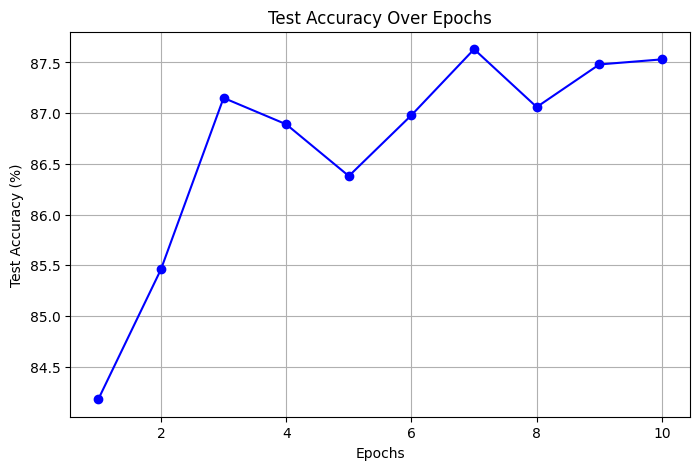

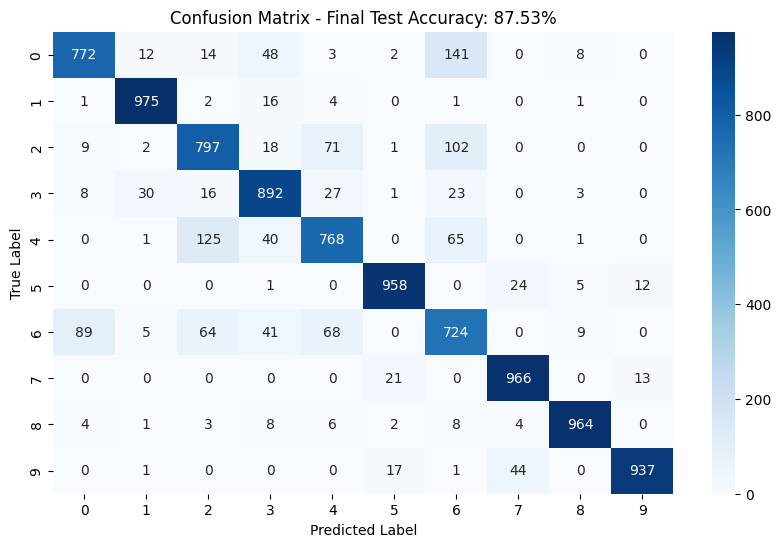

Epoch,▁▂▃▃▄▅▆▆▇█
Test Accuracy,▁▄▇▆▅▇█▇██
Train_accuracy,▁▃▅▅▅▆▇▆▇█
Train_loss,█▃▁▂▄▃▃▅▅▅
Val_accuracy,▁▅█▇▅▇▇▇██
Val_loss,▃▂▁▂▄▄▅▆▇█
epoch,▁▁▁▁▁▁▁▁▁▁
Epoch,10
Test Accuracy,87.53
Train_accuracy,91.4537
Train_loss,0.49259


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
# import Seaborn for enhanced visualization
import seaborn as sns
# import confusion_matrix to evaluate classification performance
from sklearn.metrics import confusion_matrix


def train_best_model_and_plot_confusion_matrix():
    # Initialize Weights & Biases for experiment tracking
    wandb.init(project="DA6401_Assignment1_ma23m011", name="Best Model - Conf Matrix")

    # Train Best Model
    best_model = NeuralNetwork(
        input_size=784,# Number of input features
        hidden_layers=best_config['hidden_layers'],# Best hidden layer
        output_size=10, # Number of output classes
        learning_rate=best_config['learning_rate'],# best learning rate
        optimizer=best_config['optimizer'], # Selected optimizer
        weight_init=best_config['weight_init'],# Weight initialization
        activation=best_config['activation'],# Chosen activation function
        weight_decay=best_config['weight_decay']# Regularization
    )

    num_epochs = best_config['epochs'] # Number of training epochs
    batch_size = best_config['batch_size'] # Mini-batch size

    # Store test accuracy for plotting
    test_accuracies = []

    for epoch in range(num_epochs):
        best_model.train(x_train, y_train, x_val, y_val, epochs=1, batch_size=batch_size) # Train the model for one epoch

        # Forward pass to get predictions on test set
        y_pred_probs = best_model.forward(x_test)[0][-1]  # Get softmax output
        y_pred = np.argmax(y_pred_probs, axis=1)# Get predicted class labels
        y_true = np.argmax(y_test, axis=1)# Get true class labels

        # Compute test accuracy
        accuracy = np.sum(y_pred == y_true) / y_true.shape[0]
        test_accuracies.append(accuracy * 100)  # Convert to percentage

        print(f"Epoch {epoch+1}: Test Accuracy = {accuracy*100:.2f}%")

        # Log accuracy per epoch to WandB
        wandb.log({"Test Accuracy": accuracy * 100, "Epoch": epoch + 1})

    # Plot Test Accuracy Over Epochs
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, num_epochs+1), test_accuracies, marker='o', linestyle='-', color='b')
    plt.xlabel("Epochs")
    plt.ylabel("Test Accuracy (%)")
    plt.title("Test Accuracy Over Epochs")
    plt.grid()

    # Log the accuracy plot
    wandb.log({"Test Accuracy Plot": wandb.Image(plt)})
    plt.show()

    # Compute Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - Final Test Accuracy: {accuracy*100:.2f}%")

    # Log confusion matrix to WandB
    wandb.log({"Confusion Matrix": wandb.Image(fig)})

    plt.show()

# Run the Sweep
wandb.agent(sweep_id_conf_matrix, function=train_best_model_and_plot_confusion_matrix)

In [17]:
# Define Modified Neural Network
class ModifiedNeuralNetwork(NeuralNetwork):
    def __init__(self, loss_function="cross_entropy", **kwargs):
        super().__init__(**kwargs)
        self.loss_function = loss_function

    def compute_loss(self, y_true, y_pred):
        # Compute loss based on loss function.
        if self.loss_function == "cross_entropy":
            return -np.sum(y_true * np.log(y_pred + self.epsilon)) / y_true.shape[0] # Adding epsilon for numerical stability
        elif self.loss_function == "squared_error":
            return np.mean((y_true - y_pred) ** 2) # Mean Squared Error loss

    def train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
        #Train the neural network using mini-batch gradient descent
        num_samples = X_train.shape[0]
        loss_history = []  # Store loss values per epoch

        for epoch in range(epochs):
            indices = np.arange(num_samples) # Shuffle training data at the start of each epoch
            np.random.shuffle(indices)
            X_train, y_train = X_train[indices], y_train[indices]

            for i in range(0, num_samples, batch_size):
                # Extract mini-batch data
                X_batch = X_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                #Use forward pass
                activations, z_values = self.forward(X_batch)

                # Compute gradients
                gradients_w, gradients_b = self.backward(X_batch, y_batch, activations, z_values)

                # Update weights
                self.update_weights(gradients_w, gradients_b)

            # Compute training loss
            train_activations, _ = self.forward(X_train)
            train_loss = self.compute_loss(y_train, train_activations[-1])
            loss_history.append(train_loss) # Store loss for visualization

            print(f"Epoch {epoch+1}: Loss = {train_loss:.4f}")

            # Log loss per epoch in WandB
            wandb.log({f"{self.loss_function} Loss": train_loss, "Epoch": epoch})

        return loss_history  # Return loss values for plotting


Epoch 1: Loss = 0.3843
Epoch 2: Loss = 0.3519
Epoch 3: Loss = 0.3262
Epoch 4: Loss = 0.2990
Epoch 5: Loss = 0.2923
Epoch 6: Loss = 0.2618
Epoch 7: Loss = 0.2715
Epoch 8: Loss = 0.2396
Epoch 9: Loss = 0.2333
Epoch 10: Loss = 0.2398
Epoch 1: Loss = 0.0189
Epoch 2: Loss = 0.0169
Epoch 3: Loss = 0.0162
Epoch 4: Loss = 0.0155
Epoch 5: Loss = 0.0151
Epoch 6: Loss = 0.0141
Epoch 7: Loss = 0.0134
Epoch 8: Loss = 0.0139
Epoch 9: Loss = 0.0136
Epoch 10: Loss = 0.0130


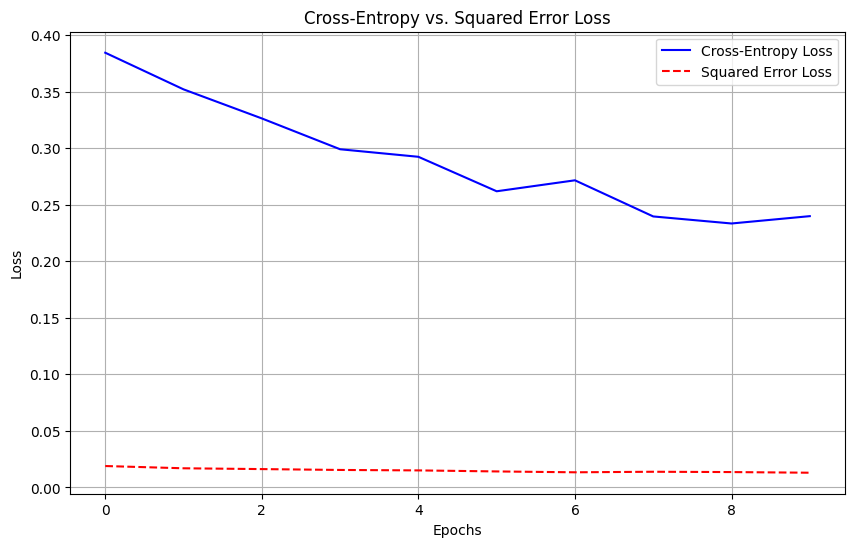

In [18]:
import numpy as np
import matplotlib.pyplot as plt


# Initialize WandB
wandb.init(project="DA6401_Assignment1_ma23m011", name="loss_comparison")


#Train with Cross-Entropy Loss
cross_entropy_model = ModifiedNeuralNetwork(
    input_size=784, hidden_layers=[64]*5, output_size=10,
    learning_rate=0.001, optimizer="nadam", weight_init="xavier",
    activation="tanh", weight_decay=0.0005, loss_function="cross_entropy"
)

# Train the model with cross entropy  loss
cross_entropy_losses = cross_entropy_model.train(x_train, y_train, x_val, y_val, epochs=10, batch_size=64)

# Train with Squared Error Loss
squared_error_model = ModifiedNeuralNetwork(
    input_size=784, hidden_layers=[64]*5, output_size=10,
    learning_rate=0.001, optimizer="nadam", weight_init="xavier",
    activation="tanh", weight_decay=0.0005, loss_function="squared_error"
)

squared_error_losses = squared_error_model.train(x_train, y_train, x_val, y_val, epochs=10, batch_size=64)

# Plot the Loss Curves
plt.figure(figsize=(10, 6)) # Set figure size for better visualization
plt.plot(cross_entropy_losses, label="Cross-Entropy Loss", color="blue")# Plot cross-entropy loss
plt.plot(squared_error_losses, label="Squared Error Loss", color="red", linestyle="dashed") # Plot squared error loss
plt.xlabel("Epochs")# Label for x-axis
plt.ylabel("Loss")# Label for y-axis
plt.title("Cross-Entropy vs. Squared Error Loss") # Set title for the plot
plt.legend()# Display legend to differentiate the lines
plt.grid()# Add grid

# Log the loss plot to WandB
wandb.log({"Loss Comparison Plot": wandb.Image(plt)})
plt.show()# Show the plot

In [22]:
import wandb
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Convert labels to one-hot encoding
def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

#Train and Evaluate Function
def train_and_evaluate(config, name):
    wandb.init(project="DA6401_Assignment1_ma23m011", name=name, reinit=True)

    # Train the model with given config
    model = ModifiedNeuralNetwork(
        input_size=784, hidden_layers=config['hidden_layers'],
        output_size=10, learning_rate=config['learning_rate'],
        optimizer=config['optimizer'], weight_init=config['weight_init'],
        activation=config['activation'], weight_decay=config['weight_decay']
    )

    num_epochs = 10
    loss_values = []  # store loss per epoch
    test_accuracies = []  # store test accuracy per epoch

    for epoch in range(num_epochs):
        train_loss = model.train(x_train, y_train, x_test, y_test, epochs=1, batch_size=config['batch_size'])
        loss_values.append(train_loss[-1])  # Store last loss of the epoch

        # Compute test accuracy
        y_pred_probs = model.forward(x_test)[0][-1]
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_true = np.argmax(y_test, axis=1)
        accuracy = np.sum(y_pred == y_true) / y_true.shape[0]
        test_accuracies.append(accuracy * 100)

        # Log to WandB
        wandb.log({"Epoch": epoch + 1, "Test Accuracy": accuracy * 100, f"{name} Loss": train_loss[-1]})

    # Plot Loss Curve
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='b')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{name} Loss Over Epochs")
    plt.grid()
    wandb.log({f"{name} Loss Plot": wandb.Image(plt)})
    plt.close()

    # Plot Test Accuracy Curve
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o', linestyle='-', color='g')
    plt.xlabel("Epochs")
    plt.ylabel("Test Accuracy (%)")
    plt.title(f"{name} Test Accuracy Over Epochs")
    plt.grid()
    wandb.log({f"{name} Accuracy Plot": wandb.Image(plt)})
    plt.close()

    print(f"{name} - Final Test Accuracy: {test_accuracies[-1]:.2f}%")
    return test_accuracies[-1]

# Run 3 Best Configurations based on fshoin mnist accuracy
configs = [
    {"hidden_layers": [64]*5, "activation": "tanh", "optimizer": "nadam", "learning_rate": 0.001, "batch_size": 64, "weight_decay": 0.0005, "weight_init": "xavier"},
    {"hidden_layers": [128]*3, "activation": "tanh", "optimizer": "adam", "learning_rate": 0.001, "batch_size": 32, "weight_decay": 0.0005, "weight_init": "random"},
    {"hidden_layers": [128]*3, "activation": "relu", "optimizer": "adam", "learning_rate": 0.001, "batch_size":16, "weight_decay": 0, "weight_init": "xavier"}
]

results = []
for i, config in enumerate(configs):
    accuracy = train_and_evaluate(config, f"Config {i+1} Final")
    results.append((f"Config {i+1}", accuracy))

# Print Final Results
print("\nFinal Results on MNIST:")
for config_name, acc in results:
    print(f"{config_name}: {acc:.2f}%")

Config 3 Final Loss,█▆▄▃▂▂▁▁▁▁
Epoch,▁▂▁▂▁▃▁▄▁▅▁▅▁▆▁▇▁▇▁█
Test Accuracy,▁▁▆▆▇▇████
cross_entropy Loss,█▆▄▃▂▂▁▁▁▁
Config 3 Final Loss,0.03601
Epoch,10
Test Accuracy,97.18
cross_entropy Loss,0.03601


Epoch 1: Loss = 0.1379
Epoch 1: Loss = 0.1039
Epoch 1: Loss = 0.0763
Epoch 1: Loss = 0.0635
Epoch 1: Loss = 0.0520
Epoch 1: Loss = 0.0423
Epoch 1: Loss = 0.0476
Epoch 1: Loss = 0.0310
Epoch 1: Loss = 0.0334
Epoch 1: Loss = 0.0252
Config 1 Final - Final Test Accuracy: 97.18%


Config 1 Final Loss,█▆▄▃▃▂▂▁▂▁
Epoch,▁▂▁▂▁▃▁▄▁▅▁▅▁▆▁▇▁▇▁█
Test Accuracy,▁▃▄▆▇▆▅█▆█
cross_entropy Loss,█▆▄▃▃▂▂▁▂▁
Config 1 Final Loss,0.02523
Epoch,10
Test Accuracy,97.18
cross_entropy Loss,0.02523


Epoch 1: Loss = 0.1538
Epoch 1: Loss = 0.0987
Epoch 1: Loss = 0.0679
Epoch 1: Loss = 0.0658
Epoch 1: Loss = 0.0417
Epoch 1: Loss = 0.0381
Epoch 1: Loss = 0.0285
Epoch 1: Loss = 0.0341
Epoch 1: Loss = 0.0274
Epoch 1: Loss = 0.0228
Config 2 Final - Final Test Accuracy: 97.64%


Config 2 Final Loss,█▅▃▃▂▂▁▂▁▁
Epoch,▁▂▁▂▁▃▁▄▁▅▁▅▁▆▁▇▁▇▁█
Test Accuracy,▁▄▆▆▇██▇██
cross_entropy Loss,█▅▃▃▂▂▁▂▁▁
Config 2 Final Loss,0.02283
Epoch,10
Test Accuracy,97.64
cross_entropy Loss,0.02283


Epoch 1: Loss = 0.0980
Epoch 1: Loss = 0.0608
Epoch 1: Loss = 0.0506
Epoch 1: Loss = 0.0453
Epoch 1: Loss = 0.0329
Epoch 1: Loss = 0.0346
Epoch 1: Loss = 0.0234
Epoch 1: Loss = 0.0233
Epoch 1: Loss = 0.0214
Epoch 1: Loss = 0.0176
Config 3 Final - Final Test Accuracy: 97.86%

Final Results on MNIST:
Config 1: 97.18%
Config 2: 97.64%
Config 3: 97.86%
